# PROBLEM STATEMENT

## • DOMAIN: Industrial safety. NLP based Chatbot

## • CONTEXT: 

The database comes from one of the biggest industry in Brazil and in the world. 

It is an urgent need for industries/companies around the globe to understand why employees still suffer some injuries/accidents in plants. 

Sometimes they also die in such environment

## • DATA DESCRIPTION:

This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.


### Columns description:

‣ Data: timestamp or time/date information

‣ Countries: which country the accident occurred (anonymised)

‣ Local: the city where the manufacturing plant is located (anonymised)

‣ Industry sector: which sector the plant belongs to

‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)

‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)

‣ Genre: if the person is male of female

‣ Employee or Third Party: if the injured person is an employee or a third party

‣ Critical Risk: some description of the risk involved in the accident

‣ Description: Detailed description of how the accident happened.

Link to download the dataset: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database [ for your reference only ]

## • PROJECT OBJECTIVE:

Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description.

### • PROJECT TASK: [ Duration: 6 weeks, Score: 60 points]

#### 1. Milestone 1: [ Duration: 2 weeks, Score: 20 points]

‣ Input: Interim report

‣ Process: [ 15 points ]

‣ Step 1: Import the data

‣ Step 2: Data cleansing

‣ Step 3: Data preprocessing

‣ Step 4: Data preparation to be used for AIML model learning

‣ Output: Clean data as .xlsx or .csv file to be used for AIML model learning [ 2.5 points ]

‣ Submission: Interim report 1 [ 2.5 points ]

#### 2. Milestone 2: [ Duration: 2 weeks, Score: 20 points]

‣ Input: Output of milestone 1

‣ Process: [ 15 points ]

‣ Step 1: NLP pre processing

‣ Step 2: Design, train and test machine learning classifiers 

‣ Step 3: Design, train and test Neural networks classifiers

‣ Step 4: Design, train and test RNN or LSTM classifiers

‣ Step 5: Choose the best performing model classifier and pickle it.

‣ Output: Pickled model to be used for future prediction [ 2.5 points ]

‣ Submission: Interim report 2 [ 2.5 points ]

#### 3. Milestone 3: [ Duration: 2 weeks, Score: 20 points]

‣ Input: Pickled model from milestone 2

‣ Process:

‣ Step 1: Design a clickable UI which can automate tasks performed under milestone 1 [ 5 points ]

‣ Step 2: Design a clickable UI which can automate tasks performed under milestone 2 [ 5 points ]

‣ Step 3: Design a clickable UI based chatbot interface [ 5 points ]

‣ Output: Clickable UI based chatbot interface which accepts text as input and replies back with relevant answers.

‣ Submission: Final report [ 5 points ]

#### ‣ Hints: 

‣ Please refer to the blog to understand the basic designing and functioning of chatbots: https://www.mygreatlearning.com/blog/basics-of-building-an-artificial-intelligence-chatbot/

‣ To make GUI as a desk app you can use TKINTER library. 

‣ To make web service GUI you can use FLASK or DJANGO library.

#### 1. Milestone 1: [ Duration: 2 weeks, Score: 20 points]

### Import the necessary libraries

In [353]:
import numpy as np
np.random.seed(7)

Firstly, let's select TensorFlow version 

In [354]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [355]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import random, re
import time

# used to supress display of warnings
import warnings

import missingno as mno

# nlp libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from tqdm import tqdm
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer

import holoviews as hv
from holoviews import opts

import os;
from os import makedirs

# sampling methods
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# import zscore for scaling the data
from scipy.stats import zscore

from scipy.stats import randint as sp_randint

# save models
import pickle

# pre-processing methods
from sklearn.model_selection import train_test_split

# the classification models 
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# methods and classes for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score

# cross-validation methods
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# feature selection methods
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# pre-processing methods
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder

# Deep learning libraries
# from keras.utils import np_utils
# from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Concatenate
# from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from keras.models import Model
from tensorflow.keras.layers import Flatten, Activation, Dense, LSTM, BatchNormalization, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D
from keras.models import model_from_json
from keras.regularizers import l1, l2, l1_l2
from keras.constraints import maxnorm, min_max_norm
from keras.constraints import unit_norm
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json

from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier

# Keras pre-processing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91749\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91749\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [356]:
# os.environ['HV_DOC_HTML'] = 'true'

# def _render(self, **kw):
#   hv.extension('bokeh')
#   return hv.Store.render(self)
# hv.core.Dimensioned._repr_mimebundle_ = _render

In [357]:
# os.environ['PYTHONHASHSEED']=str(7)

# # Reproduce the results
# def reset_random_seeds():
#    os.environ['PYTHONHASHSEED']=str(7)
#    #np.random.seed(7)
#    #random.seed(7)
#    tf.random.set_seed(7)

# #random_state = 42
# #np.random.seed(random_state)
# #tf.random.set_seed(random_state)

# !rm -R log/

Setting Options

In [358]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 1. Milestone 1: [ Duration: 2 weeks, Score: 20 points]

#### ‣ Step 1: Import the data

In [359]:
# Read IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv file
industry_safety_df = pd.read_csv(r"D:\AIML\16. Capstone Project\Week 1 Capstone project\Week 1\IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")

In [360]:
industry_safety_df.head()

Unnamed: 0                 Data   Countries     Local Industry Sector  \
0           0  2016-01-01 00:00:00  Country_01  Local_01          Mining   
1           1  2016-01-02 00:00:00  Country_02  Local_02          Mining   
2           2  2016-01-06 00:00:00  Country_01  Local_03          Mining   
3           3  2016-01-08 00:00:00  Country_01  Local_04          Mining   
4           4  2016-01-10 00:00:00  Country_01  Local_04          Mining   

  Accident Level Potential Accident Level Genre Employee or Third Party  \
0              I                       IV  Male             Third Party   
1              I                       IV  Male                Employee   
2              I                      III  Male    Third Party (Remote)   
3              I                        I  Male             Third Party   
4             IV                       IV  Male             Third Party   

         Critical Risk                                        Description  
0              Pressed  While removing the drill rod of the Jumbo 08 f...  
1  Pressurized Systems  During the activation of a sodium sulphide pum...  
2         Manual Tools  In the sub-station MILPO located at level +170...  
3               Others  Being 9:45 am. approximately in the Nv. 1880 C...  
4               Others  Approximately at 11:45 a.m. in circumstances t...

Shape of the data

In [361]:
print("Number of rows = {0} and Number of Columns = {1} in the Data frame".format(industry_safety_df.shape[0], industry_safety_df.shape[1]))

Number of rows = 425 and Number of Columns = 11 in the Data frame


Data type of each attribute

In [362]:
# Check datatypes
industry_safety_df.dtypes

Unnamed: 0                   int64
Data                        object
Countries                   object
Local                       object
Industry Sector             object
Accident Level              object
Potential Accident Level    object
Genre                       object
Employee or Third Party     object
Critical Risk               object
Description                 object
dtype: object

1. From the above output, we see that except first column all other columns datatype is object.

2. Categorical columns - 'Countries', 'Local', 'Industry Sector', 'Accident Level', 'Potential Accident Level', 'Genre', 'Employee or Third Party', 'Critical Risk', 'Description'

3. Date column - 'Data'

In [363]:
# Check Data frame info
industry_safety_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [364]:
# Column names of Data frame
industry_safety_df.columns

Index(['Unnamed: 0', 'Data', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description'],
      dtype='object')

#### Data Collection Summary:

1. There are about 425 rows and 11 columns in the dataset.

2. We noticed that except a 'date' column all other columns are categorical columns.

###  Step 2: Data cleansing

Remove 'Unnamed: 0' and Rename - 'Data', 'Countries', 'Genre', 'Employee or Third Party' columns

In [365]:
# Remove 'Unnamed: 0' column from Data frame
industry_safety_df.drop("Unnamed: 0", axis=1, inplace=True)

# Rename 'Data', 'Countries', 'Genre', 'Employee or Third Party' columns in Data frame
industry_safety_df.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)

# Get the top 2 rows
industry_safety_df.head(5)

Date     Country     Local Industry Sector Accident Level  \
0  2016-01-01 00:00:00  Country_01  Local_01          Mining              I   
1  2016-01-02 00:00:00  Country_02  Local_02          Mining              I   
2  2016-01-06 00:00:00  Country_01  Local_03          Mining              I   
3  2016-01-08 00:00:00  Country_01  Local_04          Mining              I   
4  2016-01-10 00:00:00  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

Check Duplicates

In [366]:
# Check duplicates in a data frame
industry_safety_df.duplicated().sum()

7

In [367]:
# View the duplicate records
duplicates = industry_safety_df.duplicated()

industry_safety_df[duplicates]

Date     Country     Local Industry Sector Accident Level  \
77   2016-04-01 00:00:00  Country_01  Local_01          Mining              I   
262  2016-12-01 00:00:00  Country_01  Local_03          Mining              I   
303  2017-01-21 00:00:00  Country_02  Local_02          Mining              I   
345  2017-03-02 00:00:00  Country_03  Local_10          Others              I   
346  2017-03-02 00:00:00  Country_03  Local_10          Others              I   
355  2017-03-15 00:00:00  Country_03  Local_10          Others              I   
397  2017-05-23 00:00:00  Country_01  Local_04          Mining              I   

    Potential Accident Level Gender         Employee type  \
77                         V   Male  Third Party (Remote)   
262                       IV   Male              Employee   
303                        I   Male  Third Party (Remote)   
345                        I   Male           Third Party   
346                        I   Male           Third Party   
355                        I   Male           Third Party   
397                       IV   Male           Third Party   

               Critical Risk  \
77                    Others   
262                   Others   
303                   Others   
345         Venomous Animals   
346         Venomous Animals   
355         Venomous Animals   
397  Projection of fragments   

                                           Description  
77   In circumstances that two workers of the Abrat...  
262  During the activity of chuteo of ore in hopper...  
303  Employees engaged in the removal of material f...  
345  On 02/03/17 during the soil sampling in the re...  
346  On 02/03/17 during the soil sampling in the re...  
355  Team of the VMS Project performed soil collect...  
397  In moments when the 02 collaborators carried o...

There is no need to worry about preserving the data; it is already a part of the industry dataset and we can merely remove or drop these rows from your cleaned data

Drop Duplicates

In [368]:
# Delete duplicate rows
industry_safety_df.drop_duplicates(inplace=True)

In [369]:
# Get the shape of Industry data
industry_safety_df.shape

(418, 10)

In [370]:
print("Number of rows = {0} and Number of Columns = {1} in the Data frame after removing the duplicates.".format(industry_safety_df.shape[0],industry_safety_df .shape[1]))

Number of rows = 418 and Number of Columns = 10 in the Data frame after removing the duplicates.


#### Check Outliers

As we know, there is no concept of outliers detection in categorical variables(nominal and ordinal), as each value is count as labels. Let's check the unique and frequency(mode) of each variable.

In [371]:
# Check unique values of all columns except 'Description' column
for x in industry_safety_df.columns:
    if x != 'Description':
      print('--'*30); print(f'Unique values of "{x}" column'); print('--'*30)
      print(industry_safety_df[x].unique())
      print('\n')

------------------------------------------------------------
Unique values of "Date" column
------------------------------------------------------------
['2016-01-01 00:00:00' '2016-01-02 00:00:00' '2016-01-06 00:00:00'
 '2016-01-08 00:00:00' '2016-01-10 00:00:00' '2016-01-12 00:00:00'
 '2016-01-16 00:00:00' '2016-01-17 00:00:00' '2016-01-19 00:00:00'
 '2016-01-26 00:00:00' '2016-01-28 00:00:00' '2016-01-30 00:00:00'
 '2016-02-01 00:00:00' '2016-02-02 00:00:00' '2016-02-04 00:00:00'
 '2016-02-06 00:00:00' '2016-02-07 00:00:00' '2016-02-08 00:00:00'
 '2016-02-21 00:00:00' '2016-02-25 00:00:00' '2016-02-09 00:00:00'
 '2016-02-10 00:00:00' '2016-02-15 00:00:00' '2016-02-14 00:00:00'
 '2016-02-13 00:00:00' '2016-02-16 00:00:00' '2016-02-17 00:00:00'
 '2016-02-19 00:00:00' '2016-02-20 00:00:00' '2016-02-18 00:00:00'
 '2016-02-22 00:00:00' '2016-02-24 00:00:00' '2016-02-29 00:00:00'
 '2016-02-26 00:00:00' '2016-02-27 00:00:00' '2016-03-02 00:00:00'
 '2016-03-03 00:00:00' '2016-03-04 00:00:00

1. We observed that there are records of accidents from 1st Jan 2016 to 9th July 2017 in every month. So there are no outliers in the 'Date' column.

2. There are only three country types so there are no outliers in 'Country' column.

3. There are 12 Local cities where manufacturing plant is located and it's types are in sequence so there are no outliers in 'Local' column.

4. There are only three Industry Sector types which are in sequence so there are no outliers in 'Industry Sector' column.

5. There are only five Accident Level types which are in sequence so there are no outliers in 'Accident Level' column.

6. There are only six Potential Accident Level types which are in sequence so there are no outliers in 'Potential Accident Level' column.

7. There are only two Gender types in the provided data so there are no outliers in 'Gender' column.

8. There are only three Employee types in the provided data so there are no outliers in 'Gender' column.

9. There are quite a lot of Critical risk descriptions and we don't see any outliers but with the help of SME we can decide whether this column has outliers or not.

Check Missing Values

In [372]:
# Check the presence of missing values
industry_safety_df.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee type               0
Critical Risk               0
Description                 0
dtype: int64

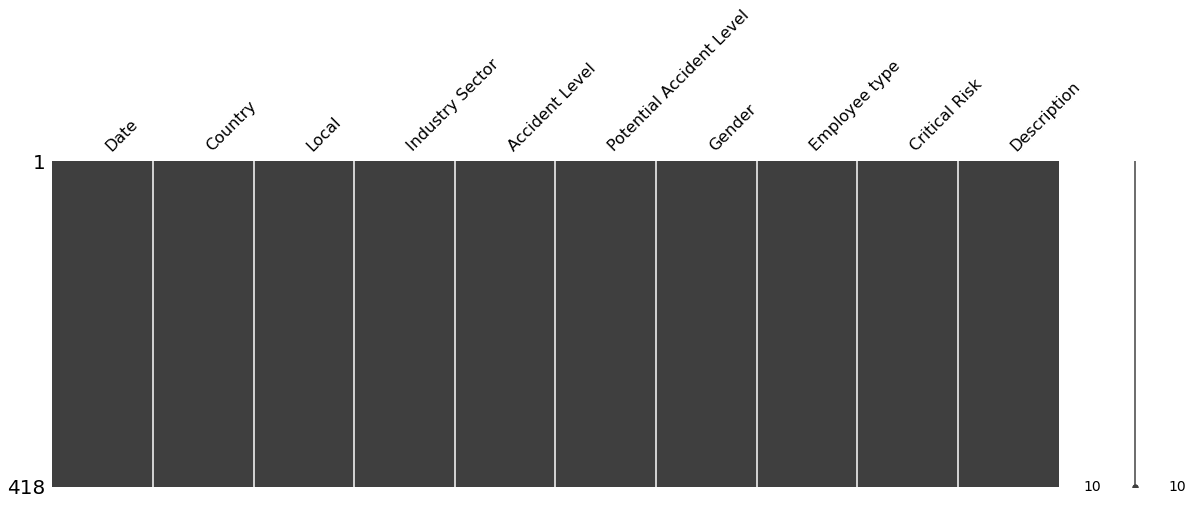

In [373]:
# Visualize missing values
mno.matrix(industry_safety_df, figsize = (20, 6));

#### Data Cleansing Summary:

1. Removed 'Unnamed: 0' column and renamed - 'Data', 'Countries', 'Genre', 'Employee or Third Party' columns in the dataset.

2. We had 7 duplicate instances in the dataset and dropped those duplicates.

3. There are no outliers in the dataset.

4. No missing values in dataset.

5. We are left with 418 rows and 10 columns after data cleansing.

 ### Step 3: Data preprocessing

To better understand the data, we are extracting the day, month and year from Date column and creating new features such as weekday, weekofyear.

In [374]:
industry_safety_df['Date'] = pd.to_datetime(industry_safety_df['Date'])

industry_safety_df['Year'] = industry_safety_df.Date.apply(lambda x : x.year)
industry_safety_df['Month'] = industry_safety_df.Date.apply(lambda x : x.month)
industry_safety_df['Day'] = industry_safety_df.Date.apply(lambda x : x.day)
industry_safety_df['Weekday'] = industry_safety_df.Date.apply(lambda x : x.day_name())
industry_safety_df['WeekofYear'] = industry_safety_df.Date.apply(lambda x : x.weekofyear)

industry_safety_df.head()

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     Weekday  WeekofYear  
0     Friday          53  
1   Saturday          53  
2  Wednesday           1  
3     Friday           1  
4     Sunday           1

As we know, this database comes from one of the biggest industry in Brazil which has four climatological seasos as below.

https://seasonsyear.com/Brazil

Spring : September to November

Summer : December to February

Autumn : March to May

Winter : June to August

We can create seasonal variable based on month variable.

In [375]:
# function to create month variable into seasons
def month2seasons(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

In [376]:
industry_safety_df['Season'] = industry_safety_df['Month'].apply(month2seasons)
industry_safety_df.head(3)

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   

     Weekday  WeekofYear  Season  
0     Friday          53  Summer  
1   Saturday          53  Summer  
2  Wednesday           1  Summer

We can create holidays variable based on Brazil holidays list from 2016 and 2017.

Another national holidays are election days. There are a plenty of unofficial ethnic and religious holidays in Brazil. Octoberfest, Brazilian Carnival, Kinderfest, Fenaostra, Fenachopp, Musikfest, Schutzenfest, Kegelfest, Cavalhadas, Oberlandfest, Tirolerfest, Marejada are among them.

Note: Considering official holidays only.

In [377]:
import holidays

brazil_holidays = []

print('--'*40); print('List of Brazil holidays in 2016'); print('--'*40)
for date in holidays.Brazil(years = 2016).items():
    brazil_holidays.append(str(date[0]))
    print(date)

print('--'*40); print('List of Brazil holidays in 2017'); print('--'*40)
for date in holidays.Brazil(years = 2017).items():
    brazil_holidays.append(str(date[0]))
    print(date)

--------------------------------------------------------------------------------
List of Brazil holidays in 2016
--------------------------------------------------------------------------------
(datetime.date(2016, 1, 1), 'Ano novo')
(datetime.date(2016, 4, 21), 'Tiradentes')
(datetime.date(2016, 5, 1), 'Dia Mundial do Trabalho')
(datetime.date(2016, 9, 7), 'Independência do Brasil')
(datetime.date(2016, 10, 12), 'Nossa Senhora Aparecida')
(datetime.date(2016, 11, 2), 'Finados')
(datetime.date(2016, 11, 15), 'Proclamação da República')
(datetime.date(2016, 12, 25), 'Natal')
(datetime.date(2016, 3, 25), 'Sexta-feira Santa')
(datetime.date(2016, 3, 27), 'Páscoa')
(datetime.date(2016, 5, 26), 'Corpus Christi')
(datetime.date(2016, 2, 10), 'Quarta-feira de cinzas (Início da Quaresma)')
(datetime.date(2016, 2, 9), 'Carnaval')
--------------------------------------------------------------------------------
List of Brazil holidays in 2017
------------------------------------------------------

In [378]:
industry_safety_df['Is_Holiday'] = [1 if str(val).split()[0] in brazil_holidays else 0 for val in industry_safety_df['Date']]
industry_safety_df.head(3)

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   

     Weekday  WeekofYear  Season  Is_Holiday  
0     Friday          53  Summer           1  
1   Saturday          53  Summer           0  
2  Wednesday           1  Summer           0

### Step 4: Data preparation to be used for AIML model learning

In [379]:
# Final Dataset for AIML Model learing
industry_safety_df.head(5)

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     Weekday  WeekofYear  Season  Is_Holiday  
0     Friday          53  Summer           1  
1   Saturday          53  Summer           0  
2  Wednesday           1  Summer           0  
3     Friday           1  Summer           0  
4     Sunday           1  Summer           0

### EDA (Data Analysis and Preparation)

##### Variable Identification

Target variable: 'Accident Level', 'Potential Accident Level'

Predictors (Input varibles): 'Date', 'Country', 'Local', 'Industry Sector', 'Gender', 'Employee type', 'Critical Risk', 'Description'

##### Univariate Analysis

Country

------------------------------------------------------------
Value Counts for `Country` label
------------------------------------------------------------
Country_01 count: 248 i.e. 59.0%
Country_02 count: 129 i.e. 31.0%
Country_03 count: 41 i.e. 10.0%
------------------------------------------------------------
Distributon of `Country` label
------------------------------------------------------------


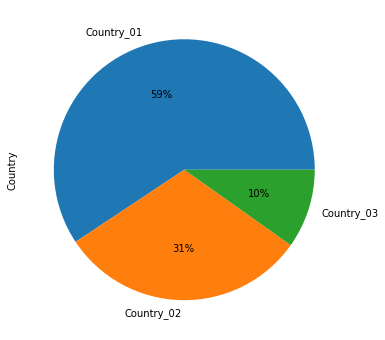

In [380]:
print('--'*30); print('Value Counts for `Country` label'); print('--'*30)

total_row_cnt = industry_safety_df.shape[0]
country_01_cnt = industry_safety_df[industry_safety_df.Country == 'Country_01'].shape[0]
country_02_cnt = industry_safety_df[industry_safety_df.Country == 'Country_02'].shape[0]
country_03_cnt = industry_safety_df[industry_safety_df.Country == 'Country_03'].shape[0]

print(f'Country_01 count: {country_01_cnt} i.e. {round(country_01_cnt/total_row_cnt*100, 0)}%')
print(f'Country_02 count: {country_02_cnt} i.e. {round(country_02_cnt/total_row_cnt*100, 0)}%')
print(f'Country_03 count: {country_03_cnt} i.e. {round(country_03_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Distributon of `Country` label'); print('--'*30)
_ = industry_safety_df['Country'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['Country_01', 'Country_02', 'Country_03'], figsize = (10, 6))

1. 59% accidents occurred in Country_01

2. 31% accidents occurred in Country_02

3. 10% accidents occurred in Country_03

Local

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
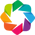

:Bars   [index]   (Local)

In [381]:
local_cnt = np.round(industry_safety_df['Local'].value_counts(normalize=True) * 100)

hv.extension('bokeh')
hv.Bars(local_cnt).opts(title="Local Count", color="#8888ff", xlabel="Locals", ylabel="Percentage", yformatter='%d%%')\
                .opts(opts.Bars(width=700, height=300,tools=['hover'],show_grid=True))

1. Highest manufacturing plants are located in Local_03 city.

2. Lowest manufacturing plants are located in Local_09 city.

Industry Sector

In [382]:
print('--'*30); print('Value Counts for `Industry Sector` label'); print('--'*30)

Mining_cnt = industry_safety_df[industry_safety_df['Industry Sector'] == 'Mining'].shape[0]
Metals_cnt = industry_safety_df[industry_safety_df['Industry Sector'] == 'Metals'].shape[0]
Others_cnt = industry_safety_df[industry_safety_df['Industry Sector'] == 'Others'].shape[0]

print(f'Mining count: {Mining_cnt} i.e. {round(Mining_cnt/total_row_cnt*100, 0)}%')
print(f'Metals count: {Metals_cnt} i.e. {round(Metals_cnt/total_row_cnt*100, 0)}%')
print(f'Others count: {Others_cnt} i.e. {round(Others_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Distributon of `Industry Sector` label'); print('--'*30)

sector_cnt = np.round(industry_safety_df['Industry Sector'].value_counts(normalize=True) * 100)

hv.Bars(sector_cnt).opts(title="Industry Sector Count", color="#8888ff", xlabel="Sectors", ylabel="Percentage", yformatter='%d%%')\
                .opts(opts.Bars(width=500, height=300,tools=['hover'],show_grid=True))\
                * hv.Text('Mining', 15, f"{int(sector_cnt.loc['Mining'])}%")\
                * hv.Text('Metals', 15, f"{int(sector_cnt.loc['Metals'])}%")\
                * hv.Text('Others', 15, f"{int(sector_cnt.loc['Others'])}%")

------------------------------------------------------------
Value Counts for `Industry Sector` label
------------------------------------------------------------
Mining count: 237 i.e. 57.0%
Metals count: 134 i.e. 32.0%
Others count: 47 i.e. 11.0%
------------------------------------------------------------
Distributon of `Industry Sector` label
------------------------------------------------------------


:Overlay
   .Bars.I   :Bars   [index]   (Industry Sector)
   .Text.I   :Text   [x,y]
   .Text.II  :Text   [x,y]
   .Text.III :Text   [x,y]

1. 57% manufacturing plants belongs to Mining sector.

2. 32% manufacturing plants belongs to Metals sector.

3. 11% manufacturing plants belongs to Others sector.

Accident Levels

In [383]:
print('--'*30); print('Value Counts for `Accident Level` label'); print('--'*40)

I_acc_cnt = industry_safety_df[industry_safety_df['Accident Level'] == 'I'].shape[0]
II_acc_cnt = industry_safety_df[industry_safety_df['Accident Level'] == 'II'].shape[0]
III_acc_cnt = industry_safety_df[industry_safety_df['Accident Level'] == 'III'].shape[0]
IV_acc_cnt = industry_safety_df[industry_safety_df['Accident Level'] == 'IV'].shape[0]
V_acc_cnt = industry_safety_df[industry_safety_df['Accident Level'] == 'V'].shape[0]
VI_acc_cnt = industry_safety_df[industry_safety_df['Accident Level'] == 'VI'].shape[0]

print(f'Accident Level - I count: {I_acc_cnt} i.e. {round(I_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - II count: {II_acc_cnt} i.e. {round(II_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - III count: {III_acc_cnt} i.e. {round(III_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - IV count: {IV_acc_cnt} i.e. {round(IV_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - V count: {V_acc_cnt} i.e. {round(V_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - VI count: {VI_acc_cnt} i.e. {round(VI_acc_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Value Counts for `Potential Accident Level'); print('--'*40)

I_pot_acc_cnt = industry_safety_df[industry_safety_df['Potential Accident Level'] == 'I'].shape[0]
II_pot_acc_cnt = industry_safety_df[industry_safety_df['Potential Accident Level'] == 'II'].shape[0]
III_pot_acc_cnt = industry_safety_df[industry_safety_df['Potential Accident Level'] == 'III'].shape[0]
IV_pot_acc_cnt = industry_safety_df[industry_safety_df['Potential Accident Level'] == 'IV'].shape[0]
V_pot_acc_cnt = industry_safety_df[industry_safety_df['Potential Accident Level'] == 'V'].shape[0]
VI_pot_acc_cnt = industry_safety_df[industry_safety_df['Potential Accident Level'] == 'VI'].shape[0]

print(f'Potential Accident Level - I count: {I_pot_acc_cnt} i.e. {round(I_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - II count: {II_pot_acc_cnt} i.e. {round(II_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - III count: {III_pot_acc_cnt} i.e. {round(III_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - IV count: {IV_pot_acc_cnt} i.e. {round(IV_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - V count: {V_pot_acc_cnt} i.e. {round(V_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - VI count: {VI_pot_acc_cnt} i.e. {round(VI_pot_acc_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Distributon of `Accident Level` & `Potential Accident Level` label'); print('--'*40)

ac_level_cnt = np.round(industry_safety_df['Accident Level'].value_counts(normalize=True) * 100)
pot_ac_level_cnt = np.round(industry_safety_df['Potential Accident Level'].value_counts(normalize=True) * 100, decimals=1)
ac_pot = pd.concat([ac_level_cnt, pot_ac_level_cnt], axis=1,sort=False).fillna(0).rename(columns={'Accident Level':'Accident', 'Potential Accident Level':'Potential'})
ac_pot = pd.melt(ac_pot.reset_index(), ['index']).rename(columns={'index':'Severity', 'variable':'Levels'})

hv.Bars(ac_pot, ['Severity', 'Levels'], 'value').opts(opts.Bars(title="Accident Levels Count", width=700, height=300,tools=['hover'],\
                                                                show_grid=True,xrotation=45, ylabel="Percentage", yformatter='%d%%'))

------------------------------------------------------------
Value Counts for `Accident Level` label
--------------------------------------------------------------------------------
Accident Level - I count: 309 i.e. 74.0%
Accident Level - II count: 40 i.e. 10.0%
Accident Level - III count: 31 i.e. 7.0%
Accident Level - IV count: 30 i.e. 7.0%
Accident Level - V count: 8 i.e. 2.0%
Accident Level - VI count: 0 i.e. 0.0%
------------------------------------------------------------
Value Counts for `Potential Accident Level
--------------------------------------------------------------------------------
Potential Accident Level - I count: 45 i.e. 11.0%
Potential Accident Level - II count: 95 i.e. 23.0%
Potential Accident Level - III count: 106 i.e. 25.0%
Potential Accident Level - IV count: 141 i.e. 34.0%
Potential Accident Level - V count: 30 i.e. 7.0%
Potential Accident Level - VI count: 1 i.e. 0.0%
------------------------------------------------------------
Distributon of `Accident Lev

:Bars   [Severity,Levels]   (value)

1. The number of accidents decreases as the Accident Level increases.

2. The number of accidents increases as the Potential Accident Level increases.

Gender

In [384]:
print('--'*30); print('Value Counts for `Gender` label'); print('--'*30)

Male_cnt = industry_safety_df[industry_safety_df['Gender'] == 'Male'].shape[0]
Female_cnt = industry_safety_df[industry_safety_df['Gender'] == 'Female'].shape[0]

print(f'Male count: {Male_cnt} i.e. {round(Male_cnt/total_row_cnt*100, 0)}%')
print(f'Female count: {Female_cnt} i.e. {round(Female_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Distributon of `Gender` label'); print('--'*30)

gender_cnt = np.round(industry_safety_df['Gender'].value_counts(normalize=True) * 100)

hv.Bars(gender_cnt).opts(title="Gender Count", color="#8888ff", xlabel="Gender", ylabel="Percentage", yformatter='%d%%')\
                .opts(opts.Bars(width=500, height=300,tools=['hover'],show_grid=True))

------------------------------------------------------------
Value Counts for `Gender` label
------------------------------------------------------------
Male count: 396 i.e. 95.0%
Female count: 22 i.e. 5.0%
------------------------------------------------------------
Distributon of `Gender` label
------------------------------------------------------------


:Bars   [index]   (Gender)

There are more men working in this industry as compared to women.

Employee type

In [385]:
print('--'*30); print('Value Counts for `Employee type` label'); print('--'*30)

third_party_cnt = industry_safety_df[industry_safety_df['Employee type'] == 'Third Party'].shape[0]
emp_cnt = industry_safety_df[industry_safety_df['Employee type'] == 'Employee'].shape[0]
third_rem_cnt = industry_safety_df[industry_safety_df['Employee type'] == 'Third Party (Remote)'].shape[0]

print(f'Third Party count: {third_party_cnt} i.e. {round(third_party_cnt/total_row_cnt*100, 0)}%')
print(f'Employee count: {emp_cnt} i.e. {round(emp_cnt/total_row_cnt*100, 0)}%')
print(f'Third Party (Remote) count: {third_rem_cnt} i.e. {round(third_rem_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Distributon of `Employee type` label'); print('--'*30)

emp_type_cnt = np.round(industry_safety_df['Employee type'].value_counts(normalize=True) * 100)

hv.Bars(emp_type_cnt).opts(title="Employee type Count", color="#8888ff", xlabel="Employee Type", ylabel="Percentage", yformatter='%d%%')\
                .opts(opts.Bars(width=500, height=300,tools=['hover'],show_grid=True))

------------------------------------------------------------
Value Counts for `Employee type` label
------------------------------------------------------------
Third Party count: 185 i.e. 44.0%
Employee count: 178 i.e. 43.0%
Third Party (Remote) count: 55 i.e. 13.0%
------------------------------------------------------------
Distributon of `Employee type` label
------------------------------------------------------------


:Bars   [index]   (Employee type)

1. 44% Third party empoyees working in this industry.

2. 43% own empoyees working in this industry.

3. 13% Third party(Remote) empoyees working in this industry.

Critical Risk

In [386]:
cr_risk_cnt = np.round(industry_safety_df['Critical Risk'].value_counts(normalize=True) * 100)

hv.Bars(cr_risk_cnt[::-1]).opts(title="Critical Risk Count", color="#8888ff", xlabel="Critical Risks", ylabel="Percentage", xformatter='%d%%')\
                .opts(opts.Bars(width=600, height=600,tools=['hover'],show_grid=True,invert_axes=True))

:Bars   [index]   (Critical Risk)

1. Because most part of the Critical Risks are classified as 'Others', it is thought that there are too many risks to classify precisely.

2. And it is also thought that it takes so much time to analyze risks and reasons why the accidents occur.

Calendar

In [387]:
year_cnt = np.round(industry_safety_df['Year'].value_counts(normalize=True,sort=False) * 100)
year = hv.Bars(year_cnt).opts(title="Year Count", color="yellow", xlabel="Years")

month_cnt = np.round(industry_safety_df['Month'].value_counts(normalize=True,sort=False) * 100)
month = hv.Bars(month_cnt).opts(title="Month Count", color="#8888ff", xlabel="Months") * hv.Curve(month_cnt).opts(color='red', line_width=3)

(year + month).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True, ylabel="Percentage", yformatter='%d%%')).cols(2)

:Layout
   .Bars.I    :Bars   [index]   (Year)
   .Overlay.I :Overlay
      .Bars.I  :Bars   [index]   (Month)
      .Curve.I :Curve   [index]   (Month)

1. Accidents are recorded from 1st Jan 2016 to 9th July 2017 in every month, there are high number of accidents in 2016 and less in 2017.

2. Number of accidents are high in beginning of the year and it keeps decreasing later.

In [388]:
day_cnt = np.round(industry_safety_df['Day'].value_counts(normalize=True,sort=False) * 100)
hv.Bars(day_cnt).opts(title="Day Count", color="#8888ff", xlabel="Days") * hv.Curve(day_cnt).opts(width=1080, height=500, color='red', line_width=3)

:Overlay
   .Bars.I  :Bars   [index]   (Day)
   .Curve.I :Curve   [index]   (Day)

 Number of accidents are very high in particular days like 4, 8 and 16 in every month.

In [389]:
weekday_cnt = pd.DataFrame(np.round(industry_safety_df['Weekday'].value_counts(normalize=True,sort=False) * 100))
weekday_cnt['week_num'] = [["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"].index(i) for i in weekday_cnt.index]
weekday_cnt.sort_values('week_num', inplace=True)

hv.Bars((weekday_cnt.index, weekday_cnt.Weekday)).opts(title="Weekday Count", color="#8888ff", xlabel="Weekdays") * hv.Curve(weekday_cnt['Weekday']).opts(width=500, height=300, color='red', line_width=3)
# (day + weekday).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True, ylabel="Percentage", yformatter='%d%%')).cols(2)

:Overlay
   .Bars.I  :Bars   [x]   (y)
   .Curve.I :Curve   [index]   (Weekday)

Number of accidents increased during the middle of the week and declined since the middle of th week.

### Bivariate Analysis and Hypothesis testing

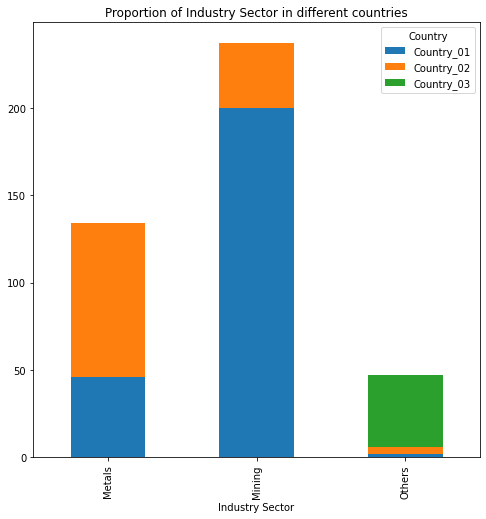

In [390]:
# Check the proportion of Industry sector in different countries
indsec_cntry_table = pd.crosstab(index = industry_safety_df['Industry Sector'], columns = industry_safety_df['Country'])
indsec_cntry_table.plot(kind = 'bar', figsize=(8,8), stacked = True)
plt.title("Proportion of Industry Sector in different countries")
plt.show()

Observations

1. Metals and Mining industry sector plants are not available in Country_03.

2. Distribution of industry sector differ significantly in each country. But let's check the proportion of metals, mining and others sector in Country_01 and is that difference is statistically significant?

1. State the H0 and Ha

Ho = The proportions of industry sector is not differ in different countries

Ha = The proportions of industry sector is differ in different countries

2. Decide the significance level: alpha = 0.05

3. Identify the test-statistic: Z-test of proportions

4. Calculate the p_value using test-statistic


In [391]:
mining_country1 = industry_safety_df[industry_safety_df['Industry Sector'] == 'Mining']['Country'].value_counts()[0]
mining_country2 = industry_safety_df[industry_safety_df['Industry Sector'] == 'Mining']['Country'].value_counts()[1]

metals_country1 = industry_safety_df[industry_safety_df['Industry Sector'] == 'Metals']['Country'].value_counts()[1]
metals_country2 = industry_safety_df[industry_safety_df['Industry Sector'] == 'Metals']['Country'].value_counts()[0]

others_country1 = industry_safety_df[industry_safety_df['Industry Sector'] == 'Others']['Country'].value_counts()[2]
others_country2 = industry_safety_df[industry_safety_df['Industry Sector'] == 'Others']['Country'].value_counts()[1]
others_country3 = industry_safety_df[industry_safety_df['Industry Sector'] == 'Others']['Country'].value_counts()[0]

print([mining_country1, metals_country1, others_country1], [country_01_cnt])
print(f'Proportions of mining, metals, others in country_01 = {round(200/248,2)}%, {round(46/248,2)}%, {round(2/248,2)}% respectively')

[200, 46, 2] [248]
Proportions of mining, metals, others in country_01 = 0.81%, 0.19%, 0.01% respectively


In [392]:
from statsmodels.stats.proportion import proportions_ztest

# Z-test proportions: More than 2 samples not implemented yet, hence I am passing two elements
t_statistic, p_value = proportions_ztest([mining_country1, metals_country1], [country_01_cnt])

print("Mining and Metals t_statistic", t_statistic)
print("Mining and Metals p_value", p_value)

t_statistic, p_value = proportions_ztest([mining_country1, others_country1], [country_01_cnt])

print("Mining and Others t_statistic", t_statistic)
print("Mining and Others p_value", p_value)

Mining and Metals t_statistic 13.830057992106923
Mining and Metals p_value 1.6788511371823555e-43
Mining and Others t_statistic 18.094920466702863
Mining and Others p_value 3.494480338628687e-73


5. Decide to Reject or Accept Null Hypothesis

In [393]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))


reject null? : True


1. Hence we reject Null Hypothesis, we have enough (95%) evidence to prove that, the mining sector in country 1 is differ from metals sector)

2. Hence we reject Null Hypothesis, we have enough (95%) evidence to prove that, the mining sector in country 1 is differ from others sector)

b. Employee type by Gender - Is the distribution of employee type differ significantly in different genders?

In [394]:
f = lambda x : np.round(x/x.sum() * 100)
em_gen = industry_safety_df.groupby(['Gender','Employee type'])['Employee type'].count().unstack().apply(f, axis=1)

hv.Bars(pd.melt(em_gen.reset_index(), ['Gender']), ['Gender','Employee type'], 'value').opts(opts.Bars(title="Employee type by Gender Count", width=800, height=300,tools=['hover'],\
                                                                show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%'))

:Bars   [Gender,Employee type]   (value)

Observations

1. Proportion of third party employees in each gender is equal.

2. Proportion of third party(remote) employees in each gender is not equal.

3. Proportion of own employees in each gender is not equal. But let's check is that difference is statistically significant?

1. State the H0 and Ha

Ho = The proportions of own employees in each gender is equal.

Ha = The proportions of own employees in each gender is not equal.

2. Decide the significance level: alpha = 0.05

3. Identify the test-statistic: Z-test of proportions

4. Calculate the p_value using test-statistic

In [395]:
male_emp = industry_safety_df[industry_safety_df['Employee type'] == 'Employee'].Gender.value_counts()[0]
female_emp = industry_safety_df[industry_safety_df['Employee type'] == 'Employee'].Gender.value_counts()[1]

print([male_emp, female_emp], [Male_cnt, Female_cnt])
print(f'Proportion of own employee types in male, female = {round(170/396,2)}%, {round(8/22,2)}% respectively')

[170, 8] [396, 22]
Proportion of own employee types in male, female = 0.43%, 0.36% respectively


In [396]:
t_statistic, p_value = proportions_ztest([male_emp, female_emp], [Male_cnt, Female_cnt])

print("t_statistic", t_statistic)
print("p_value", p_value)

t_statistic 0.6061911815982839
p_value 0.5443878078917722


5. Decide to Reject or Accept Null Hypothesis

In [397]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

reject null? : False


Hence we fail to reject Null Hypothesis, we have enough (95%) evidence to prove that, the proportion of own employees in each gender is equal.

c. Industry Sector by Gender - Is the distribution of industry sector differ significantly in different genders?

In [398]:
f = lambda x : np.round(x/x.sum() * 100)
em_gen = industry_safety_df.groupby(['Gender','Industry Sector'])['Industry Sector'].count().unstack().apply(f, axis=1)

hv.Bars(pd.melt(em_gen.reset_index(), ['Gender']), ['Gender','Industry Sector'], 'value').opts(opts.Bars(title="Industry Sector by Gender Count", width=800, height=300,tools=['hover'],\
                                                                show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%'))

:Bars   [Gender,Industry Sector]   (value)

Observations

1. Proportion of Metals sector employees in each gender is not equal.

2. Proportion of Mining sector employees in each gender is not equal.

3. Proportion of Others sector employees in each gender is not equal.

d. Accident Levels by Gender - Is the distribution of accident levels and potential accident levels differ significantly in different genders?

In [399]:
f = lambda x : np.round(x/x.sum() * 100)

ac_gen = industry_safety_df.groupby(['Gender','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1)
ac = hv.Bars(pd.melt(ac_gen.reset_index(), ['Gender']), ['Gender','Accident Level'], 'value').opts(opts.Bars(title="Accident Level by Gender Count"))

pot_ac_gen = industry_safety_df.groupby(['Gender','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=1)
pot_ac = hv.Bars(pd.melt(pot_ac_gen.reset_index(), ['Gender']), ['Gender','Potential Accident Level'], 'value').opts(opts.Bars(title="Potential Accident Level by Gender Count"))

(ac + pot_ac).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%'))

:Layout
   .Bars.I  :Bars   [Gender,Accident Level]   (value)
   .Bars.II :Bars   [Gender,Potential Accident Level]   (value)

Observations

1. Proportion of accident levels in each gender is not equal and males have a higher accident levels than females.

2. There are many low risks at general accident level, but many high risks at potential accident level.

e. Accident Levels by Employee type - Is the distribution of accident levels and potential accident levels differ significantly in different employee types?

In [400]:
f = lambda x : np.round(x/x.sum() * 100)

ac_em = industry_safety_df.groupby(['Employee type','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1)
ac = hv.Bars(pd.melt(ac_em.reset_index(), ['Employee type']), ['Employee type','Accident Level'], 'value').opts(opts.Bars(title="Accident Level by Employee type Count"))

pot_ac_em = industry_safety_df.groupby(['Employee type','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=1)
pot_ac = hv.Bars(pd.melt(pot_ac_em.reset_index(), ['Employee type']), ['Employee type','Potential Accident Level'], 'value').opts(opts.Bars(title="Potential Accident Level by Employee type Count"))

(ac + pot_ac).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%',fontsize={'title':9}))

:Layout
   .Bars.I  :Bars   [Employee type,Accident Level]   (value)
   .Bars.II :Bars   [Employee type,Potential Accident Level]   (value)

Observations

For both accident levels, the incidence of Employee is higher at low accident levels, but the incidence of Third parties seems to be slightly higher at high accident levels.

f. Accident Levels by Month - Is the distribution of accident levels and potential accident levels differ significantly in different months?

In [401]:
f = lambda x : np.round(x/x.sum() * 100)

ac_mo = industry_safety_df.groupby(['Month','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1).fillna(0)
ac = hv.Curve(ac_mo['I'], label='I') * hv.Curve(ac_mo['II'], label='II') * hv.Curve(ac_mo['III'], label='III') * hv.Curve(ac_mo['IV'], label='IV') * hv.Curve(ac_mo['V'], label='V')\
        .opts(opts.Curve(title="Accident Level by Month Count"))

pot_ac_mo = industry_safety_df.groupby(['Month','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=1).fillna(0)
pot_ac = hv.Curve(pot_ac_mo['I'], label='I') * hv.Curve(pot_ac_mo['II'], label='II') * hv.Curve(pot_ac_mo['III'], label='III') * hv.Curve(pot_ac_mo['IV'], label='IV')\
        * hv.Curve(pot_ac_mo['V'], label='V') * hv.Curve(pot_ac_mo['VI'], label='VI').opts(opts.Curve(title="Potential Accident Level by Month Count"))
        
(ac+pot_ac).opts(opts.Curve(width=800, height=300,tools=['hover'],show_grid=True, ylabel="Percentage", yformatter='%d%%')).cols(1)

:Layout
   .Overlay.I  :Overlay
      .Curve.I   :Curve   [Month]   (I)
      .Curve.II  :Curve   [Month]   (II)
      .Curve.III :Curve   [Month]   (III)
      .Curve.IV  :Curve   [Month]   (IV)
      .Curve.V   :Curve   [Month]   (V)
   .Overlay.II :Overlay
      .Curve.I   :Curve   [Month]   (I)
      .Curve.II  :Curve   [Month]   (II)
      .Curve.III :Curve   [Month]   (III)
      .Curve.IV  :Curve   [Month]   (IV)
      .Curve.V   :Curve   [Month]   (V)
      .Curve.VI  :Curve   [Month]   (VI)

Observations

Both of the two accident level have the tendency that non-severe levels decreased throughout the year, but severe levels did not changed much, and some of these levels increased slightly in the second half of the year.

g. Accident Levels by Weekday - Is the distribution of accident levels and potential accident levels differ significantly in different weekday?

In [402]:
f = lambda x : np.round(x/x.sum() * 100)

ac_weekday = industry_safety_df.groupby(['Weekday','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1).fillna(0)
ac_weekday['week_num'] = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'].index(i) for i in ac_weekday.index]
ac_weekday.sort_values('week_num', inplace=True)
ac_weekday.drop('week_num', axis=1, inplace=True)
ac = hv.Curve(ac_weekday['I'], label='I') * hv.Curve(ac_weekday['II'], label='II') * hv.Curve(ac_weekday['III'], label='III') * hv.Curve(ac_weekday['IV'], label='IV') * hv.Curve(ac_weekday['V'], label='V')\
        .opts(opts.Curve(title="Accident Level by Weekday Count"))

pot_ac_weekday = industry_safety_df.groupby(['Weekday','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=0).fillna(0)
pot_ac_weekday['week_num'] = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'].index(i) for i in pot_ac_weekday.index]
pot_ac_weekday.sort_values('week_num', inplace=True)
pot_ac_weekday.drop('week_num', axis=1, inplace=True)
pot_ac = hv.Curve(pot_ac_weekday['I'], label='I') * hv.Curve(pot_ac_weekday['II'], label='II') * hv.Curve(pot_ac_weekday['III'], label='III') * hv.Curve(pot_ac_weekday['IV'], label='IV')\
        * hv.Curve(pot_ac_weekday['V'], label='V') * hv.Curve(pot_ac_weekday['VI'], label='VI').opts(opts.Curve(title="Potential Accident Level by Weekday Count"))

(ac+pot_ac).opts(opts.Curve(width=800, height=300,tools=['hover'],show_grid=True, ylabel="Percentage", yformatter='%d%%')).cols(1)

:Layout
   .Overlay.I  :Overlay
      .Curve.I   :Curve   [Weekday]   (I)
      .Curve.II  :Curve   [Weekday]   (II)
      .Curve.III :Curve   [Weekday]   (III)
      .Curve.IV  :Curve   [Weekday]   (IV)
      .Curve.V   :Curve   [Weekday]   (V)
   .Overlay.II :Overlay
      .Curve.I   :Curve   [Weekday]   (I)
      .Curve.II  :Curve   [Weekday]   (II)
      .Curve.III :Curve   [Weekday]   (III)
      .Curve.IV  :Curve   [Weekday]   (IV)
      .Curve.V   :Curve   [Weekday]   (V)
      .Curve.VI  :Curve   [Weekday]   (VI)

Observations

Both of the two accident level is thought that non-severe levels decreased in the first and the last of the week, but severe levels did not changed much.

h. Accident Levels by Seasons - Is the distribution of accident levels and potential accident levels differ significantly in different seasons?

In [403]:
f = lambda x : np.round(x/x.sum() * 100)
ac_season = industry_safety_df.groupby(['Season','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1).fillna(0)
ac_season['season_num'] = [['Spring', 'Summer', 'Autumn', 'Winter'].index(i) for i in ac_season.index]
ac_season.sort_values('season_num', inplace=True)
ac_season.drop('season_num', axis=1, inplace=True)
ac = hv.Curve(ac_season['I'], label='I') * hv.Curve(ac_season['II'], label='II') * hv.Curve(ac_season['III'], label='III') * hv.Curve(ac_season['IV'], label='IV') * hv.Curve(ac_season['V'], label='V')\
        .opts(opts.Curve(title="Accident Level by Season Count"))

pot_ac_season = industry_safety_df.groupby(['Season','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=0).fillna(0)
pot_ac_season['season_num'] = [['Spring', 'Summer', 'Autumn', 'Winter'].index(i) for i in pot_ac_season.index]
pot_ac_season.sort_values('season_num', inplace=True)
pot_ac_season.drop('season_num', axis=1, inplace=True)
pot_ac = hv.Curve(pot_ac_season['I'], label='I') * hv.Curve(pot_ac_season['II'], label='II') * hv.Curve(pot_ac_season['III'], label='III') * hv.Curve(pot_ac_season['IV'], label='IV')\
        * hv.Curve(pot_ac_season['V'], label='V') * hv.Curve(pot_ac_season['VI'], label='VI').opts(opts.Curve(title="Potential Accident Level by Season Count"))

(ac+pot_ac).opts(opts.Curve(width=800, height=300,tools=['hover'],show_grid=True, ylabel="Percentage", yformatter='%d%%')).cols(1)


:Layout
   .Overlay.I  :Overlay
      .Curve.I   :Curve   [Season]   (I)
      .Curve.II  :Curve   [Season]   (II)
      .Curve.III :Curve   [Season]   (III)
      .Curve.IV  :Curve   [Season]   (IV)
      .Curve.V   :Curve   [Season]   (V)
   .Overlay.II :Overlay
      .Curve.I   :Curve   [Season]   (I)
      .Curve.II  :Curve   [Season]   (II)
      .Curve.III :Curve   [Season]   (III)
      .Curve.IV  :Curve   [Season]   (IV)
      .Curve.V   :Curve   [Season]   (V)
      .Curve.VI  :Curve   [Season]   (VI)

Observations

Both of the two accident level have the tendency that non-severe levels decreased throughout the year, but severe levels did not changed much, and some of these levels increased slightly in the second half of the year.

Study Summary Statistics

In [404]:
# Summary statistics
industry_safety_df.drop(columns='Description').describe(exclude=[np.number]).T

count unique                  top freq      first  \
Date                       418    287  2017-02-08 00:00:00    6 2016-01-01   
Country                    418      3           Country_01  248        NaT   
Local                      418     12             Local_03   89        NaT   
Industry Sector            418      3               Mining  237        NaT   
Accident Level             418      5                    I  309        NaT   
Potential Accident Level   418      6                   IV  141        NaT   
Gender                     418      2                 Male  396        NaT   
Employee type              418      3          Third Party  185        NaT   
Critical Risk              418     33               Others  229        NaT   
Weekday                    418      7             Thursday   76        NaT   
Season                     418      4               Autumn  141        NaT   

                               last  
Date                     2017-07-09  
Country                         NaT  
Local                           NaT  
Industry Sector                 NaT  
Accident Level                  NaT  
Potential Accident Level        NaT  
Gender                          NaT  
Employee type                   NaT  
Critical Risk                   NaT  
Weekday                         NaT  
Season                          NaT

Study Correlation

In [405]:
# Check the Correlation
industry_safety_df.corr()

Year      Month        Day  WeekofYear  Is_Holiday
Year        1.0000000 -0.4166214 -0.0019821  -0.4187984  -0.0411692
Month      -0.4166214  1.0000000  0.0021329   0.9642945  -0.0820473
Day        -0.0019821  0.0021329  1.0000000   0.0609821  -0.0286729
WeekofYear -0.4187984  0.9642945  0.0609821   1.0000000  -0.0283681
Is_Holiday -0.0411692 -0.0820473 -0.0286729  -0.0283681   1.0000000

Observations

WeekofYear featuer is having very high positive correlation with Month feature.

### EDA Summary:

Local

Highest manufacturing plants are located in Local_03 city and lowest in Local_09 city.

Country

Percentage(%) of accidents occurred in respective countries: 59% in Country_01, 31% in Country_02 and 10% in Country_03.

Industry Sector

Percentage(%) of manufacturing plants belongs to respective sectors: 57% to Mining sector, 32% to Metals sector and 11% to Others sector.

Country + Industry Sector

Metals and Mining industry sector plants are not available in Country_03.

Distribution of industry sector differ significantly in each country.

Accident Levels

The number of accidents decreases as the Accident Level increases and increases as the Potential Accident Level increases.

Gender

There are more men working in this industry as compared to women.

Employee type

44% Third party empoyees, 43% own empoyees and 13% Third party(Remote) empoyees working in this industry.

Gender + Employee type

Proportion of third party employees in each gender is equal, third party(remote) employees in each gender is not equal and own employees in each gender is not equal.

Gender + Industry Sector

Proportion of Metals, Mining and Others sector employees in each gender is not equal

Gender + Accident Levels

Males have a higher accident levels than females.

There are many low risks at general accident level, but many high risks at potential accident level.

Accident Levels + Employee type

For both accident levels, the incidence of Employee is higher at low accident levels, but the incidence of Third parties seems to be slightly higher at high accident levels.

Accident Levels + Calendar

1. Accidents are recorded from 1st Jan 2016 to 9th July 2017 in every month, there are high number of accidents in 2016 and less in 2017.

2. Number of accidents are high in beginning of the year and it keeps decreasing later.

3. Number of accidents are very high in particular days like 4, 8 and 16 in every month.

4. Number of accidents increased during the middle of the week and declined since the middle of th week.

5. Both of the two accident level have the tendency that non-severe levels decreased throughout the year, but severe levels did not changed much, and some of these levels increased slightly in the second half of the year.

6. Both of the two accident level is thought that non-severe levels decreased in the first and the last of the week, but severe levels did not changed much.

Critical Risk

Most of the critical risks are classified as Others.

### Output: Clean data as .xlsx or .csv file to be used for AIML model learning [ 2.5 points ]

In [406]:
industry_safety_df.to_excel('industry_safety_df_clean.xlsx')

## 2. Milestone 2: [ Duration: 2 weeks, Score: 20 points]

### NLP Analysis



In [407]:
# Checking 5 random Description and accident_levels from the data
print('--'*35); print('Checking 5 random Descriptions and accident_levels from the data'); print('--'*35)
rands = random.sample(range(1, industry_safety_df.shape[0]), 5)
descriptions, accident_levels = list(industry_safety_df.loc[rands, 'Description']), list(industry_safety_df.loc[rands, 'Accident Level'])

_ = [print(f'Description: {description}\naccident_level: {acclevel}\n') for description, acclevel in zip(descriptions, accident_levels)]

----------------------------------------------------------------------
Checking 5 random Descriptions and accident_levels from the data
----------------------------------------------------------------------
Description: During the maintenance work of the vertical pump (8 ") of zinc concentrate, the three mechanics were performing lifting maneuvers to be able to position the pump to the drawer, instants in which the pump becomes clogged by the reduced space of the work area and in order to release the pump they place a young lady in the lower part, at which time she is released and turns untimely, hitting the middle finger of the injured person's right hand against a 12 "trellex hose.
accident_level: III

Description: During the discharge of waste, the operator proceeds to remove a bag that was under the hose rolled, in this circumstance one of the ends of the hose moves in the direction of the face of the driver, projecting the liquid contained in it and impacting it on the ear and par

--------------------------------------------------------------------------------------------------------------
Checking 5 random Descriptions and accident_levels from the data where the length of Description is > 100
--------------------------------------------------------------------------------------------------------------
Description: At 04:00 h on 05/19/17, the mechanic on duty of section 40 Antonio is observed in the activity of withdrawal check out of POM D071, at this moment he is impacted by a pulp of the line of discharge stuck, causing irritation in the right part of the neck and ear. The mechanic is referred to the medical center for evaluation.
accident_level: I

Description: While maintaining the ramp 604, when placing the first cloth for the overlap with the previous mesh; the operator will check the work front, then return to the back of the team to coordinate with his assistant, at which time a fragment of rock (Weight: 0.42 kg) of the non-sustained area will be detach

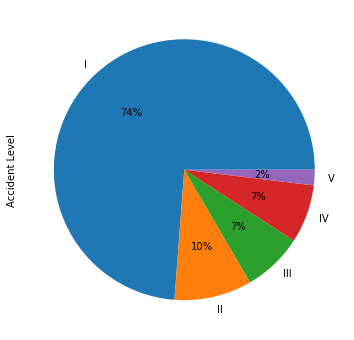

In [408]:
# Checking 5 random Descriptions and accident_levels from the data where the length of headline is > 100
print('--'*55); print('Checking 5 random Descriptions and accident_levels from the data where the length of Description is > 100'); print('--'*55)
indexes = list(industry_safety_df.loc[industry_safety_df['Description'].str.len() > 100, 'Description'].index)
rands = random.sample(indexes, 5)
descriptions, accident_levels = list(industry_safety_df.loc[rands, 'Description']), list(industry_safety_df.loc[rands, 'Accident Level'])

_ = [print(f'Description: {description}\naccident_level: {acclevel}\n') for description, acclevel in zip(descriptions, accident_levels)]

print('--'*40); print('Distributon of accident_level where the length of Description is > 100'); print('--'*40)
_ = industry_safety_df.loc[indexes, 'Accident Level'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['I', 'II', 'III', 'IV', 'V'], figsize = (10, 6))

Observations

1. 74% of data where accident description > 100 is captured in low accident level.

2. Based on some random headlines seen above, it appears that the data is mostly lower-cased. Pre-processing such as removing punctuations and lemmatization can be used.

3. There are few alphanumeric characters like 042-TC-06, Nv. 3370, CX 212 captured in description where removing these characters might help.

4. There are digits in the description for e.g. level 326, Dumper 01 where removing the digits wouldn't help.

------------------------------------------------------------------------------------------------------------------------
Checking 5 random Descriptions and pot_accident_levels from the data where the length of Description is > 100
------------------------------------------------------------------------------------------------------------------------
Description: During the maintenance of the locomotive N ° 16 in the workshop of level -1170, the assistant when pulling the locomotive chair backwards stumbles against the ventilation grille, falling on the platform of the locomotive and then to the floor of the workshop from a height 1.17m generating the injury. At the time of the accident the assistant used his safety helmet and chin strap.
pot_accident_level: IV

Description: On 02/15/2017 at 3:27 pm, when performing the Magnetometric using GPS, the collaborator Antônio bumped the top of the field hat on a branch and was attacked by maribondos. He was bitten behind the ear and another on

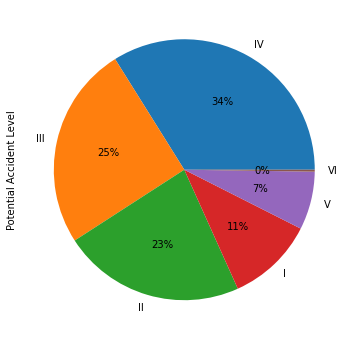

In [409]:
# Checking 5 random Descriptions and pot_accident_levels from the data where the length of headline is > 100
print('--'*60); print('Checking 5 random Descriptions and pot_accident_levels from the data where the length of Description is > 100'); print('--'*60)
indexes = list(industry_safety_df.loc[industry_safety_df['Description'].str.len() > 100, 'Description'].index)
rands = random.sample(indexes, 5)
descriptions, pot_accident_levels = list(industry_safety_df.loc[rands, 'Description']), list(industry_safety_df.loc[rands, 'Potential Accident Level'])

_ = [print(f'Description: {descriptin}\npot_accident_level: {pot_acclevel}\n') for descriptin, pot_acclevel in zip(descriptions, pot_accident_levels)]

print('--'*40); print('Distributon of pot_accident_level where the length of Description is > 100'); print('--'*40)
_ = industry_safety_df.loc[indexes, 'Potential Accident Level'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['IV', 'III', 'II', 'I', 'V', 'VI'], figsize = (10, 6))

Observations

1. 34% of data where accident description > 100 is captured in high medium potential accident level.

2. 25% of data where accident description > 100 is captured in medium potential accident level.

3. 23% of data where accident description > 100 is captured in low potential accident level.

4. Based on some random headlines seen above, it appears that the data is mostly lower-cased. Pre-processing such as removing punctuations and lemmatization can be used.

5. There are few alphanumeric characters like AFO-755 captured in description where removing these characters might help.

6. There are digits in the description for e.g. ditch 3570, 0.50 cm deep, 30 kg where removing the digits wouldn't help.

### Step 1: NLP pre processing

Few of the NLP pre-processing steps taken before applying model on the data

1. Converting to lower case, avoid any capital cases

2. Converting apostrophe to the standard lexicons

3. Removing punctuations

4. Lemmatization

5. Removing stop words

In [410]:
# Text preprocessing and stopwords
# from text_preprocess_py import * #(custom module)
# from text_preprocessing import PreProcessing
from text_preprocessing import preprocess_text

from nltk.corpus import stopwords



In [411]:
stop = stopwords.words('english')


lemmatizer = nltk.WordNetLemmatizer()

In [412]:
# print('--'*30); print('Converting description to lower case')
# industry_safety_df['Cleaned_Description'] = industry_safety_df['Description'].apply(lambda x : x.lower())

# print('Replacing apostrophes to the standard lexicons')
# industry_safety_df['Cleaned_Description'] = industry_safety_df['Cleaned_Description'].apply(lambda x : replace_words(x))

# print('Removing punctuations')
# industry_safety_df['Cleaned_Description'] = industry_safety_df['Cleaned_Description'].apply(lambda x: remove_punctuation(x))

# print('Applying Lemmatizer')
# industry_safety_df['Cleaned_Description'] = industry_safety_df['Cleaned_Description'].apply(lambda x: lemmatize(x))

# print('Removing multiple spaces between words')
# industry_safety_df['Cleaned_Description'] = industry_safety_df['Cleaned_Description'].apply(lambda x: re.sub(' +', ' ', x))

# print('Removing stop words')
# industry_safety_df['Cleaned_Description'] = industry_safety_df['Cleaned_Description'].apply(lambda x: remove_stopwords(x))

# print('--'*30)

print('--'*30); print('Converting description to lower case')
#Converting headlines to lower case
industry_safety_df['Cleaned_Description'] = industry_safety_df['Description'].apply(lambda x : x.lower())

#Removing multiple spaces between words
industry_safety_df['Cleaned_Description'] = industry_safety_df['Cleaned_Description'].apply(lambda x: re.sub(' +', ' ', x))

#Removing punctiation marks
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)
print('Removing punctuations')

#Removing special characters
def remove_specialchars(text):
    return re.sub("[^a-zA-Z]"," ",text)
print('Removing multiple spaces between words')

#Removal of stopwords and lemmatization
def remove_stopwords_and_lemmatization(text):
    final_text = []
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    for word in text:
        if word not in set(stopwords.words('english')):
            lemma = nltk.WordNetLemmatizer()
            word = lemma.lemmatize(word) 
            final_text.append(word)
    return " ".join(final_text)
print('Applying Lemmatizer')
print('Removing stop words')


#Total function
def cleaning(text):
    text = remove_punctuations(text)
    text = remove_specialchars(text)
    text = remove_stopwords_and_lemmatization(text)
    return text
print('Removing punctuations')

industry_safety_df['Cleaned_Description'] = industry_safety_df['Cleaned_Description'].apply(cleaning)

print('--'*30)

------------------------------------------------------------
Converting description to lower case
Removing punctuations
Removing multiple spaces between words
Applying Lemmatizer
Removing stop words
Removing punctuations
------------------------------------------------------------


Get the Length of each line and find the maximum length

As different lines are of different length. We need to pad the our sequences using the max length.

In [413]:
print('--'*45); print('Get the length of each line, find the maximum length and print the maximum length line'); 
print('Length of line ranges from 61 to 657.'); print('--'*45)

# Get length of each line
industry_safety_df['line_length'] = industry_safety_df['Cleaned_Description'].str.len()

print('Minimum line length: {}'.format(industry_safety_df['line_length'].min()))
print('Maximum line length: {}'.format(industry_safety_df['line_length'].max()))
print('Line with maximum length: {}'.format(industry_safety_df[industry_safety_df['line_length'] == industry_safety_df['line_length'].max()]['Cleaned_Description'].values[0]))

------------------------------------------------------------------------------------------
Get the length of each line, find the maximum length and print the maximum length line
Length of line ranges from 61 to 657.
------------------------------------------------------------------------------------------
Minimum line length: 61
Maximum line length: 657
Line with maximum length: level gallery holding activity bolter equipment operator performs drilling first hole support right gable foot deep drill end drill rod break leaving thread inside drilling machine shank operator assistant decide make two empty percussion attempt free thread shank without success third attempt assistant enters corrugated iron central hole rest bar embedded shank generate pressure moment operator activates percussion generates movement shank hit palm victim left hand generating described injury worker wearing safety glove time accident end corrugated iron contact left hand shaped like cane worker time accident p

In [414]:
print('--'*45); print('Get the number of words, find the maximum number of words and print the maximum number of words'); 
print('Number of words ranges from 9 to 95.'); print('--'*45)

# Get length of each line
industry_safety_df['nb_words'] = industry_safety_df['Cleaned_Description'].apply(lambda x: len(x.split(' ')))

print('Minimum number of words: {}'.format(industry_safety_df['nb_words'].min()))
print('Maximum number of words: {}'.format(industry_safety_df['nb_words'].max()))
print('Line with maximum number of words: {}'.format(industry_safety_df[industry_safety_df['nb_words'] == industry_safety_df['nb_words'].max()]['Cleaned_Description'].values[0]))

------------------------------------------------------------------------------------------
Get the number of words, find the maximum number of words and print the maximum number of words
Number of words ranges from 9 to 95.
------------------------------------------------------------------------------------------
Minimum number of words: 9
Maximum number of words: 95
Line with maximum number of words: performing sleeve removal maneuver hole meter deep general da silva pressed one side locking nut rod together jack hold entire weight rod maneuver locking procedure effective weight rod secured steel wire rope probe winch moment driller pedro released brake winch inefficacy locking done one side chestnut without aid monkey caused sliding rod auxiliary prepared manual unlocking rod holding faucet key firmly probe tower composition shifted stem slid hand shifted downward causing left hand strike base probe tower structure causing cut th th quirodactyl employee taken hospital went medical ca

WordCloud

In [415]:
from wordcloud import WordCloud 

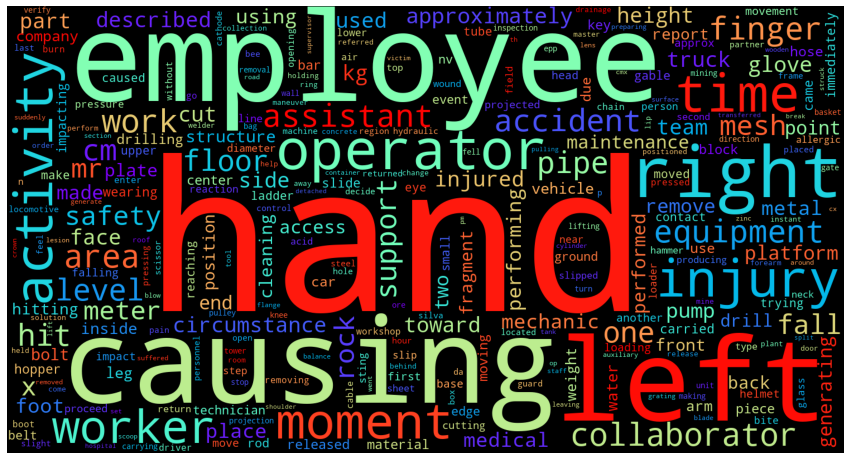

In [416]:
wordcloud = WordCloud(width = 1500, height = 800, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=300, collocations=False).generate(" ".join(industry_safety_df['Cleaned_Description'].values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Observations

There are many body-related, employee related, movement-related, equipment-related and accident-related words.

1. Body-related: left, right, hand, finger, face, foot and glove

2. Employee-related: employee, operator, collaborator, assistant, worker and mechanic

3. Movement-related: fall, hit, lift and slip

4. Equipment-related: equipment, pump, meter, drill, truck and tube

5. Accident-related: accident, activity, safety, injury, causing

NLP text summary statistics

In [417]:
print('--'*30); print('Five point summary for number of words')
display(industry_safety_df['nb_words'].describe().round(0).astype(int)); 

print('99% quantilie: {}'.format(industry_safety_df['nb_words'].quantile(0.99)));print('--'*30)

------------------------------------------------------------
Five point summary for number of words


count    418
mean      33
std       16
min        9
25%       21
50%       30
75%       41
max       95
Name: nb_words, dtype: int32

99% quantilie: 77.82999999999998
------------------------------------------------------------


NLP Pre-processing Summary:

1. 74% of data where accident description > 100 is captured in low accident level.

2. 34% of data where accident description > 100 is captured in high medium potential accident level.

3. 25% of data where accident description > 100 is captured in medium potential accident level.

4. 23% of data where accident description > 100 is captured in low potential accident level.

5. Few of the NLP pre-processing steps taken before applying model on the data

6. Converting to lower case, avoid any capital cases

7. Converting apostrophe to the standard lexicons

8. Removing punctuations

9. Lemmatization

10. Removing stop words

11. After pre-processing steps:

a. Minimum line length: 61

b. Maximum line length: 657

c. Minimum number of words: 10

d. Maximum number of words: 98

#### Feature Engineering

1. Variable Creation - Word2Vec Embeddings

In [418]:
from gensim.models import Word2Vec
# define training data
sentences = industry_safety_df['Cleaned_Description']

# train model
model = Word2Vec(sentences, min_count=1)

# summarize the loaded model
print(model)

# summarize vocabulary
words = list(model.wv.index_to_key)
print(words)

# save model
model.save('model.bin')

# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec<vocab=27, vector_size=100, alpha=0.025>
[' ', 'e', 'i', 'r', 't', 'a', 'n', 'o', 'l', 'c', 's', 'd', 'p', 'm', 'g', 'u', 'h', 'f', 'y', 'b', 'v', 'k', 'w', 'x', 'j', 'q', 'z']
Word2Vec<vocab=27, vector_size=100, alpha=0.025>


2. Variable Creation - Glove Word Embeddings

In [419]:
embeddings_index = {}
EMBEDDING_FILE =(r'D:\AIML\16. Capstone Project\Week 1 Capstone project\Week 1\glove.6B.200d.txt\glove.6B.200d.txt')
f = open(EMBEDDING_FILE, encoding="utf8")
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

400000it [00:43, 9152.37it/s]

Found 400000 word vectors.


In [420]:
# this function creates a normalized vector for the whole sentence
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [421]:
# create sentence GLOVE embeddings vectors using the above function for training and validation set
ind_glove_df = [sent2vec(x) for x in tqdm(industry_safety_df['Cleaned_Description'])]

100%|██████████| 418/418 [00:00<00:00, 1375.03it/s]


In [422]:
ind_glove_df[0]

array([ 6.88742427e-03,  9.37025622e-02, -1.94101059e-03, -3.68952788e-02,
        1.87674479e-03,  5.80397286e-02, -9.77040306e-02, -3.01619451e-02,
       -5.44568747e-02,  4.47395965e-02, -1.93282645e-02,  1.72927100e-02,
        1.09758303e-01,  4.92296007e-04,  9.85444486e-02, -3.41430418e-02,
       -3.06001008e-02, -3.02565880e-02,  6.65390864e-02,  3.37000558e-04,
       -3.52136679e-02,  6.13468766e-01,  8.42402205e-02,  3.74566112e-03,
        3.91036198e-02,  4.56816405e-02, -3.31150033e-02,  2.65705027e-02,
       -3.16604786e-02, -6.58030361e-02,  4.28359956e-02, -4.57121730e-02,
        7.70204002e-03, -1.87199451e-02,  1.59773994e-02, -1.01225702e-02,
       -8.96854103e-02, -6.72542006e-02, -7.10552037e-02,  3.91892195e-02,
        7.57630765e-02,  2.06887424e-02, -3.31655866e-03,  7.40978047e-02,
        3.79050113e-02,  6.66690990e-02,  4.97302152e-02,  1.17138214e-02,
        4.71384190e-02,  6.58412501e-02,  3.89744490e-02,  1.33003611e-02,
       -6.27259910e-02, -

3. Variable Creation - TFIDF Features

In [423]:
ind_tfidf_df = pd.DataFrame()
for i in [1,2,3]:
    vec_tfidf = TfidfVectorizer(max_features=10, norm='l2', stop_words='english', lowercase=True, use_idf=True, ngram_range=(i,i))
    X = vec_tfidf.fit_transform(industry_safety_df['Cleaned_Description']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names()])
    ind_tfidf_df = pd.concat([ind_tfidf_df.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)

ind_tfidf_df.head(3)

TFIDF_activity  TFIDF_causing  TFIDF_employee  TFIDF_hand  TFIDF_injury  \
0       0.0000000      0.0000000       0.0000000   0.6442786     0.0000000   
1       0.0000000      0.0000000       0.0000000   0.0000000     0.0000000   
2       0.0000000      0.4668385       0.0000000   0.4888423     0.5485190   

   TFIDF_left  TFIDF_moment  TFIDF_operator  TFIDF_right  TFIDF_time  \
0   0.0000000     0.7647909       0.0000000    0.0000000   0.0000000   
1   0.0000000     0.0000000       0.0000000    0.0000000   0.0000000   
2   0.4921604     0.0000000       0.0000000    0.0000000   0.0000000   

   TFIDF_causing injury  TFIDF_cm cm  TFIDF_described injury  \
0             0.0000000    0.0000000               0.0000000   
1             0.0000000    0.0000000               0.0000000   
2             1.0000000    0.0000000               0.0000000   

   TFIDF_employee report  TFIDF_finger left  TFIDF_injury described  \
0              0.0000000          0.0000000               0.0000000   
1              0.0000000          0.0000000               0.0000000   
2              0.0000000          0.0000000               0.0000000   

   TFIDF_left hand  TFIDF_medical center  TFIDF_right hand  \
0        0.0000000             0.0000000         0.0000000   
1        0.0000000             0.0000000         0.0000000   
2        0.0000000             0.0000000         0.0000000   

   TFIDF_time accident  TFIDF_causing injury described  TFIDF_cm cm cm  \
0            0.0000000                       0.0000000       0.0000000   
1            0.0000000                       0.0000000       0.0000000   
2            0.0000000                       0.0000000       0.0000000   

   TFIDF_described time accident  TFIDF_finger left hand  \
0                      0.0000000               0.0000000   
1                      0.0000000               0.0000000   
2                      0.0000000               0.0000000   

   TFIDF_finger right hand  TFIDF_generating described injury  \
0                0.0000000                          0.0000000   
1                0.0000000                          0.0000000   
2                0.0000000                          0.0000000   

   TFIDF_hand causing injury  TFIDF_injury time accident  \
0                  0.0000000                   0.0000000   
1                  0.0000000                   0.0000000   
2                  0.0000000                   0.0000000   

   TFIDF_right hand causing  TFIDF_time accident employee  
0                 0.0000000                     0.0000000  
1                 0.0000000                     0.0000000  
2                 0.0000000                     0.0000000

4. Variable Creation - Label Encoding

In [424]:
# To replace white space everywhere in Employee type
industry_safety_df['Employee type'] = industry_safety_df['Employee type'].str.replace(' ', '_')
industry_safety_df['Employee type'].value_counts()

Third_Party             185
Employee                178
Third_Party_(Remote)     55
Name: Employee type, dtype: int64

In [425]:
# To replace white space everywhere in Critical Risk
industry_safety_df['Critical Risk'] = industry_safety_df['Critical Risk'].str.replace('\n', '').str.replace(' ', '_')
industry_safety_df['Critical Risk'].value_counts().head()

Others                 229
Pressed                 24
Manual_Tools            20
Chemical_substances     17
Cut                     14
Name: Critical Risk, dtype: int64

In [426]:
# Create Industry DataFrame
ind_featenc_df = pd.DataFrame()

# Label encoding
industry_safety_df['Season'] = industry_safety_df['Season'].replace('Summer', 'aSummer').replace('Autumn', 'bAutumn').replace('Winter', 'cWinter').replace('Spring', 'dSpring')
ind_featenc_df['Season'] = LabelEncoder().fit_transform(industry_safety_df['Season']).astype(np.int8)

industry_safety_df['Weekday'] = industry_safety_df['Weekday'].replace('Monday', 'aMonday').replace('Tuesday', 'bTuesday').replace('Wednesday', 'cWednesday').replace('Thursday', 'dThursday').replace('Friday', 'eFriday').replace('Saturday', 'fSaturday').replace('Sunday', 'gSunday')
ind_featenc_df['Weekday'] = LabelEncoder().fit_transform(industry_safety_df['Weekday']).astype(np.int8)

ind_featenc_df['Accident Level'] = LabelEncoder().fit_transform(industry_safety_df['Accident Level']).astype(np.int8)
ind_featenc_df['Potential Accident Level'] = LabelEncoder().fit_transform(industry_safety_df['Potential Accident Level']).astype(np.int8)

In [427]:
from tensorflow.keras.utils import to_categorical
tf.keras.utils


<module 'tensorflow.keras.utils' from 'c:\\ProgramData\\Anaconda3\\envs\\tf_gpu\\lib\\site-packages\\keras\\api\\_v2\\keras\\utils\\__init__.py'>

In [428]:
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = to_categorical(ind_featenc_df['Accident Level'])
dummy_y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [429]:
# Dummy variables encoding
Country_dummies = pd.get_dummies(industry_safety_df['Country'], columns=["Country"], drop_first=True)
Local_dummies = pd.get_dummies(industry_safety_df['Local'], columns=["Local"], drop_first=True)
Gender_dummies = pd.get_dummies(industry_safety_df['Gender'], columns=["Gender"], drop_first=True)
IS_dummies = pd.get_dummies(industry_safety_df['Industry Sector'], columns=['Industry Sector'], prefix='IS', drop_first=True)
EmpType_dummies = pd.get_dummies(industry_safety_df['Employee type'], columns=['Employee type'], prefix='EmpType', drop_first=True)
CR_dummies = pd.get_dummies(industry_safety_df['Critical Risk'], columns=['Critical Risk'], prefix='CR', drop_first=True)

# Merge the above dataframe with the original dataframe ind_feat_df
ind_featenc_df = ind_featenc_df.join(Country_dummies.reset_index(drop=True)).join(Local_dummies.reset_index(drop=True)).join(Gender_dummies.reset_index(drop=True)).join(IS_dummies.reset_index(drop=True)).join(EmpType_dummies.reset_index(drop=True)).join(CR_dummies.reset_index(drop=True))

ind_featenc_df = industry_safety_df[['Year','Month','Day','WeekofYear']].reset_index(drop=True).join(ind_featenc_df.reset_index(drop=True))

ind_featenc_df.head(3)

Year  Month  Day  WeekofYear  Season  Weekday  Accident Level  \
0  2016      1    1          53       0        4               0   
1  2016      1    2          53       0        5               0   
2  2016      1    6           1       0        2               0   

   Potential Accident Level  Country_02  Country_03  Local_02  Local_03  \
0                         3           0           0         0         0   
1                         3           1           0         1         0   
2                         2           0           0         0         1   

   Local_04  Local_05  Local_06  Local_07  Local_08  Local_09  Local_10  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   

   Local_11  Local_12  Male  IS_Mining  IS_Others  EmpType_Third_Party  \
0         0         0     1          1          0                    1   
1         0         0     1          1          0                    0   
2         0         0     1          1          0                    0   

   EmpType_Third_Party_(Remote)  CR_Blocking_and_isolation_of_energies  \
0                             0                                      0   
1                             0                                      0   
2                             1                                      0   

   CR_Burn  CR_Chemical_substances  CR_Confined_space  CR_Cut  \
0        0                       0                  0       0   
1        0                       0                  0       0   
2        0                       0                  0       0   

   CR_Electrical_Shock  CR_Electrical_installation  CR_Fall  \
0                    0                           0        0   
1                    0                           0        0   
2                    0                           0        0   

   CR_Fall_prevention  CR_Fall_prevention_(same_level)  \
0                   0                                0   
1                   0                                0   
2                   0                                0   

   CR_Individual_protection_equipment  CR_Liquid_Metal  CR_Machine_Protection  \
0                                   0                0                      0   
1                                   0                0                      0   
2                                   0                0                      0   

   CR_Manual_Tools  CR_Not_applicable  CR_Others  CR_Plates  CR_Poll  \
0                0                  0          0          0        0   
1                0                  0          0          0        0   
2                1                  0          0          0        0   

   CR_Power_lock  CR_Pressed  CR_Pressurized_Systems  \
0              0           1                       0   
1              0           0                       1   
2              0           0                       0   

   CR_Pressurized_Systems_/_Chemical_Substances  CR_Projection  \
0                                             0              0   
1                                             0              0   
2                                             0              0   

   CR_Projection/Burning  CR_Projection/Choco  CR_Projection/Manual_Tools  \
0                      0                    0                           0   
1                      0                    0                           0   
2                      0                    0                           0   

   CR_Projection_of_fragments  CR_Suspended_Loads  CR_Traffic  \
0                           0                   0           0   
1                           0                   0           0   
2                           0                   0           0   

   CR_Vehicles_and_Mobile_Equipment  CR_Venomous_Animals  CR_remains_of_choco  
0                                

In [430]:
# Check NaN values
np.any(np.isnan(ind_featenc_df))

False

Combine Glove and Encoded Features

In [431]:
# Consider only top 30 GLOVE features
ind_feat_df = ind_featenc_df.join(pd.DataFrame(ind_glove_df).iloc[:,0:30].reset_index(drop=True))

In [432]:
ind_feat_df.head(3)

Year  Month  Day  WeekofYear  Season  Weekday  Accident Level  \
0  2016      1    1          53       0        4               0   
1  2016      1    2          53       0        5               0   
2  2016      1    6           1       0        2               0   

   Potential Accident Level  Country_02  Country_03  Local_02  Local_03  \
0                         3           0           0         0         0   
1                         3           1           0         1         0   
2                         2           0           0         0         1   

   Local_04  Local_05  Local_06  Local_07  Local_08  Local_09  Local_10  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   

   Local_11  Local_12  Male  IS_Mining  IS_Others  EmpType_Third_Party  \
0         0         0     1          1          0                    1   
1         0         0     1          1          0                    0   
2         0         0     1          1          0                    0   

   EmpType_Third_Party_(Remote)  CR_Blocking_and_isolation_of_energies  \
0                             0                                      0   
1                             0                                      0   
2                             1                                      0   

   CR_Burn  CR_Chemical_substances  CR_Confined_space  CR_Cut  \
0        0                       0                  0       0   
1        0                       0                  0       0   
2        0                       0                  0       0   

   CR_Electrical_Shock  CR_Electrical_installation  CR_Fall  \
0                    0                           0        0   
1                    0                           0        0   
2                    0                           0        0   

   CR_Fall_prevention  CR_Fall_prevention_(same_level)  \
0                   0                                0   
1                   0                                0   
2                   0                                0   

   CR_Individual_protection_equipment  CR_Liquid_Metal  CR_Machine_Protection  \
0                                   0                0                      0   
1                                   0                0                      0   
2                                   0                0                      0   

   CR_Manual_Tools  CR_Not_applicable  CR_Others  CR_Plates  CR_Poll  \
0                0                  0          0          0        0   
1                0                  0          0          0        0   
2                1                  0          0          0        0   

   CR_Power_lock  CR_Pressed  CR_Pressurized_Systems  \
0              0           1                       0   
1              0           0                       1   
2              0           0                       0   

   CR_Pressurized_Systems_/_Chemical_Substances  CR_Projection  \
0                                             0              0   
1                                             0              0   
2                                             0              0   

   CR_Projection/Burning  CR_Projection/Choco  CR_Projection/Manual_Tools  \
0                      0                    0                           0   
1                      0                    0                           0   
2                      0                    0                           0   

   CR_Projection_of_fragments  CR_Suspended_Loads  CR_Traffic  \
0                           0                   0           0   
1                           0                   0           0   
2                           0                   0           0   

   CR_Vehicles_and_Mobile_Equipment  CR_Venomous_Animals  CR_remains_of_choco  \
0                               

Combine TFIDF and Encoded Features

In [433]:
# Consider only top 30 GLOVE features
ind_feat_df = ind_featenc_df.join(ind_tfidf_df.reset_index(drop=True))

In [434]:
ind_feat_df.head(3)

Year  Month  Day  WeekofYear  Season  Weekday  Accident Level  \
0  2016      1    1          53       0        4               0   
1  2016      1    2          53       0        5               0   
2  2016      1    6           1       0        2               0   

   Potential Accident Level  Country_02  Country_03  Local_02  Local_03  \
0                         3           0           0         0         0   
1                         3           1           0         1         0   
2                         2           0           0         0         1   

   Local_04  Local_05  Local_06  Local_07  Local_08  Local_09  Local_10  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   

   Local_11  Local_12  Male  IS_Mining  IS_Others  EmpType_Third_Party  \
0         0         0     1          1          0                    1   
1         0         0     1          1          0                    0   
2         0         0     1          1          0                    0   

   EmpType_Third_Party_(Remote)  CR_Blocking_and_isolation_of_energies  \
0                             0                                      0   
1                             0                                      0   
2                             1                                      0   

   CR_Burn  CR_Chemical_substances  CR_Confined_space  CR_Cut  \
0        0                       0                  0       0   
1        0                       0                  0       0   
2        0                       0                  0       0   

   CR_Electrical_Shock  CR_Electrical_installation  CR_Fall  \
0                    0                           0        0   
1                    0                           0        0   
2                    0                           0        0   

   CR_Fall_prevention  CR_Fall_prevention_(same_level)  \
0                   0                                0   
1                   0                                0   
2                   0                                0   

   CR_Individual_protection_equipment  CR_Liquid_Metal  CR_Machine_Protection  \
0                                   0                0                      0   
1                                   0                0                      0   
2                                   0                0                      0   

   CR_Manual_Tools  CR_Not_applicable  CR_Others  CR_Plates  CR_Poll  \
0                0                  0          0          0        0   
1                0                  0          0          0        0   
2                1                  0          0          0        0   

   CR_Power_lock  CR_Pressed  CR_Pressurized_Systems  \
0              0           1                       0   
1              0           0                       1   
2              0           0                       0   

   CR_Pressurized_Systems_/_Chemical_Substances  CR_Projection  \
0                                             0              0   
1                                             0              0   
2                                             0              0   

   CR_Projection/Burning  CR_Projection/Choco  CR_Projection/Manual_Tools  \
0                      0                    0                           0   
1                      0                    0                           0   
2                      0                    0                           0   

   CR_Projection_of_fragments  CR_Suspended_Loads  CR_Traffic  \
0                           0                   0           0   
1                           0                   0           0   
2                           0                   0           0   

   CR_Vehicles_and_Mobile_Equipment  CR_Venomous_Animals  CR_remains_of_choco  \
0                               

In [435]:
ind_feat_df.shape

(418, 88)

Sampling Techniques - Create Training and Test Set

In [436]:
X = ind_feat_df.drop(['Accident Level','Potential Accident Level'], axis = 1) # Considering all Predictors
y = ind_feat_df['Accident Level']

In [437]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1, stratify = y)

In [438]:
X_train, X_test, y_train_dummy, y_test_dummy = train_test_split(X, dummy_y, test_size = 0.20, random_state = 1, stratify = y)

In [439]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (334,86)
y_train shape : (334,)
X_test shape : (84,86)
y_test shape : (84,)


Resampling Techniques — Oversample minority class

In [440]:
# Display old accident level counts
ind_feat_df['Accident Level'].value_counts()

0    309
1     40
2     31
3     30
4      8
Name: Accident Level, dtype: int64

In [441]:
# Concatenate our training data back together
X_up = pd.concat([X_train, y_train], axis=1)

# Get the majority and minority class
acclevel_0_majority = X_up[X_up['Accident Level'] == 0]
acclevel_1_minority = X_up[X_up['Accident Level'] == 1]
acclevel_2_minority = X_up[X_up['Accident Level'] == 2]
acclevel_3_minority = X_up[X_up['Accident Level'] == 3]
acclevel_4_minority = X_up[X_up['Accident Level'] == 4]

# Upsample Level1 minority class
acclevel_1_minority_upsampled = resample(acclevel_1_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

# Upsample Level2 minority class
acclevel_2_minority_upsampled = resample(acclevel_2_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

# Upsample Level3 minority class
acclevel_3_minority_upsampled = resample(acclevel_3_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

# Upsample Level4 minority class
acclevel_4_minority_upsampled = resample(acclevel_4_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

In [442]:
# Combine majority class with upsampled minority classes
df_upsampled = pd.concat([acclevel_0_majority, acclevel_1_minority_upsampled, acclevel_2_minority_upsampled, acclevel_3_minority_upsampled, 
                          acclevel_4_minority_upsampled])

In [443]:
# Display new accident level counts
df_upsampled['Accident Level'].value_counts()

0    247
1    247
2    247
3    247
4    247
Name: Accident Level, dtype: int64

In [444]:
# Separate input features and target
X_train_up = df_upsampled.drop(['Accident Level'], axis = 1) # Considering all Predictors
y_train_up = df_upsampled['Accident Level']

SMOTE - Generate synthetic samples - upsample smaller class

In [445]:
X_train.columns.value_counts().sum()

86

In [446]:
sm = SMOTE(random_state=1)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
df_smote = pd.concat([pd.DataFrame(X_train_smote), pd.DataFrame(y_train_smote)], axis=1)
df_smote.columns = ['Year', 'Month', 'Day',
        'WeekofYear', 'Season', 'Weekday',
       'Country_02', 'Country_03', 'Local_02', 'Local_03', 'Local_04',
       'Local_05', 'Local_06', 'Local_07', 'Local_08', 'Local_09', 'Local_10',
       'Local_11', 'Local_12', 'Male', 'IS_Mining', 'IS_Others',
       'EmpType_Third_Party', 'EmpType_Third_Party_(Remote)',
       'CR_Blocking_and_isolation_of_energies', 'CR_Burn',
       'CR_Chemical_substances', 'CR_Confined_space', 'CR_Cut',
       'CR_Electrical_Shock', 'CR_Electrical_installation', 'CR_Fall',
       'CR_Fall_prevention', 'CR_Fall_prevention_(same_level)',
       'CR_Individual_protection_equipment', 'CR_Liquid_Metal',
       'CR_Machine_Protection', 'CR_Manual_Tools', 'CR_Not_applicable',
       'CR_Others', 'CR_Plates', 'CR_Poll', 'CR_Power_lock', 'CR_Pressed',
       'CR_Pressurized_Systems',
       'CR_Pressurized_Systems_/_Chemical_Substances', 'CR_Projection',
       'CR_Projection/Burning', 'CR_Projection/Choco',
       'CR_Projection/Manual_Tools', 'CR_Projection_of_fragments',
       'CR_Suspended_Loads', 'CR_Traffic', 'CR_Vehicles_and_Mobile_Equipment',
       'CR_Venomous_Animals', 'CR_remains_of_choco','TFIDF_area', 
       'TFIDF_activity','TFIDF_causing', 'TFIDF_employee',
       'TFIDF_hand', 'TFIDF_injury',
       'TFIDF_left', 'TFIDF_operator', 'TFIDF_right', 'TFIDF_time',
       'TFIDF_causing injury', 'TFIDF_described injury',
       'TFIDF_employee reports', 'TFIDF_finger left', 'TFIDF_injury described',
       'TFIDF_left foot', 'TFIDF_left hand', 'TFIDF_medical center',
       'TFIDF_right hand', 'TFIDF_time accident',
       'TFIDF_causing injury described', 'TFIDF_described time accident',
       'TFIDF_finger left hand', 'TFIDF_finger right hand',
       'TFIDF_generating described injury', 'TFIDF_hand causing injury',
       'TFIDF_injury time accident', 'TFIDF_left hand causing',
       'TFIDF_right hand causing', 'TFIDF_time accident employee', 'Accident Level']

In [447]:
# Separate input features and target
X_train_smote = df_smote.iloc[:,:-1] # Considering all Predictors
y_train_smote = df_smote.iloc[:,-1:]

In [448]:
X_train_smote.head(1)

Year  Month  Day  WeekofYear  Season  Weekday  Country_02  Country_03  \
0  2016      9    1          35       3        3           1           0   

   Local_02  Local_03  Local_04  Local_05  Local_06  Local_07  Local_08  \
0         0         0         0         1         0         0         0   

   Local_09  Local_10  Local_11  Local_12  Male  IS_Mining  IS_Others  \
0         0         0         0         0     1          0          0   

   EmpType_Third_Party  EmpType_Third_Party_(Remote)  \
0                    0                             1   

   CR_Blocking_and_isolation_of_energies  CR_Burn  CR_Chemical_substances  \
0                                      0        0                       0   

   CR_Confined_space  CR_Cut  CR_Electrical_Shock  CR_Electrical_installation  \
0                  0       0                    0                           0   

   CR_Fall  CR_Fall_prevention  CR_Fall_prevention_(same_level)  \
0        0                   0                                0   

   CR_Individual_protection_equipment  CR_Liquid_Metal  CR_Machine_Protection  \
0                                   0                0                      0   

   CR_Manual_Tools  CR_Not_applicable  CR_Others  CR_Plates  CR_Poll  \
0                1                  0          0          0        0   

   CR_Power_lock  CR_Pressed  CR_Pressurized_Systems  \
0              0           0                       0   

   CR_Pressurized_Systems_/_Chemical_Substances  CR_Projection  \
0                                             0              0   

   CR_Projection/Burning  CR_Projection/Choco  CR_Projection/Manual_Tools  \
0                      0                    0                           0   

   CR_Projection_of_fragments  CR_Suspended_Loads  CR_Traffic  \
0                           0                   0           0   

   CR_Vehicles_and_Mobile_Equipment  CR_Venomous_Animals  CR_remains_of_choco  \
0                                 0                    0                    0   

   TFIDF_area  TFIDF_activity  TFIDF_causing  TFIDF_employee  TFIDF_hand  \
0   0.0000000       0.0000000      0.0000000       0.7035035   0.0000000   

   TFIDF_injury  TFIDF_left  TFIDF_operator  TFIDF_right  TFIDF_time  \
0     0.0000000   0.0000000       0.0000000    0.7106918   0.0000000   

   TFIDF_causing injury  TFIDF_described injury  TFIDF_employee reports  \
0             0.0000000               0.0000000               0.0000000   

   TFIDF_finger left  TFIDF_injury described  TFIDF_left foot  \
0          0.0000000               0.0000000        0.0000000   

   TFIDF_left hand  TFIDF_medical center  TFIDF_right hand  \
0        0.0000000             0.0000000         1.0000000   

   TFIDF_time accident  TFIDF_causing injury described  \
0            0.0000000                       0.0000000   

   TFIDF_described time accident  TFIDF_finger left hand  \
0                      0.0000000               0.0000000   

   TFIDF_finger right hand  TFIDF_generating described injury  \
0                0.0000000                          0.0000000   

   TFIDF_hand causing injury  TFIDF_injury time accident  \
0                  0.0000000                   0.0000000   

   TFIDF_left hand causing  TFIDF_right hand causing  \
0                0.0000000                 0.0000000   

   TFIDF_time accident employee  
0                     0.0000000

In [449]:
X_train_smote.columns

Index(['Year', 'Month', 'Day', 'WeekofYear', 'Season', 'Weekday', 'Country_02',
       'Country_03', 'Local_02', 'Local_03', 'Local_04', 'Local_05',
       'Local_06', 'Local_07', 'Local_08', 'Local_09', 'Local_10', 'Local_11',
       'Local_12', 'Male', 'IS_Mining', 'IS_Others', 'EmpType_Third_Party',
       'EmpType_Third_Party_(Remote)', 'CR_Blocking_and_isolation_of_energies',
       'CR_Burn', 'CR_Chemical_substances', 'CR_Confined_space', 'CR_Cut',
       'CR_Electrical_Shock', 'CR_Electrical_installation', 'CR_Fall',
       'CR_Fall_prevention', 'CR_Fall_prevention_(same_level)',
       'CR_Individual_protection_equipment', 'CR_Liquid_Metal',
       'CR_Machine_Protection', 'CR_Manual_Tools', 'CR_Not_applicable',
       'CR_Others', 'CR_Plates', 'CR_Poll', 'CR_Power_lock', 'CR_Pressed',
       'CR_Pressurized_Systems',
       'CR_Pressurized_Systems_/_Chemical_Substances', 'CR_Projection',
       'CR_Projection/Burning', 'CR_Projection/Choco',
       'CR_Projection/Manual_Tools'

In [450]:
# Display new accident level counts
y_train_smote['Accident Level'].value_counts()

1    247
0    247
3    247
2    247
4    247
Name: Accident Level, dtype: int64

In [451]:
# convert integers to dummy variables (i.e. one hot encoded)
y_train_smote_dummy = to_categorical(y_train_smote['Accident Level'])
y_train_smote_dummy

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

Varible Tansformation (Normalization and Scaling)

In [452]:
# Transform independent features
scaler_X = StandardScaler()#StandardScaler()
pipeline = Pipeline(steps=[('s', scaler_X)])
X_train.iloc[:,:6] = pipeline.fit_transform(X_train.iloc[:,:6]) # Scaling only first 6 feautres

X_test.iloc[:,:6] = pipeline.fit_transform(X_test.iloc[:,:6]) # Scaling only first 6 feautres

In [453]:
X_train.head(3)

Year      Month        Day  WeekofYear     Season    Weekday  \
202 -0.7007649  1.1689262 -1.6738532   0.9969145  1.7283480  0.0754959   
258 -0.7007649  1.8022131  1.5590826   1.9342472  1.7283480 -0.9975096   
6   -0.7007649 -1.3642213  0.0580767  -1.3824686 -1.2219155  1.1485014   

     Country_02  Country_03  Local_02  Local_03  Local_04  Local_05  Local_06  \
202           1           0         0         0         0         1         0   
258           1           0         0         0         0         0         0   
6             1           0         0         0         0         1         0   

     Local_07  Local_08  Local_09  Local_10  Local_11  Local_12  Male  \
202         0         0         0         0         0         0     1   
258         0         1         0         0         0         0     1   
6           0         0         0         0         0         0     1   

     IS_Mining  IS_Others  EmpType_Third_Party  EmpType_Third_Party_(Remote)  \
202          0          0                    0                             1   
258          0          0                    0                             0   
6            0          0                    0                             0   

     CR_Blocking_and_isolation_of_energies  CR_Burn  CR_Chemical_substances  \
202                                      0        0                       0   
258                                      0        0                       0   
6                                        0        0                       0   

     CR_Confined_space  CR_Cut  CR_Electrical_Shock  \
202                  0       0                    0   
258                  0       0                    0   
6                    0       0                    0   

     CR_Electrical_installation  CR_Fall  CR_Fall_prevention  \
202                           0        0                   0   
258                           0        0                   0   
6                             0        0                   0   

     CR_Fall_prevention_(same_level)  CR_Individual_protection_equipment  \
202                                0                                   0   
258                                0                                   0   
6                                  1                                   0   

     CR_Liquid_Metal  CR_Machine_Protection  CR_Manual_Tools  \
202                0                      0                1   
258                0                      0                0   
6                  0                      0                0   

     CR_Not_applicable  CR_Others  CR_Plates  CR_Poll  CR_Power_lock  \
202                  0          0          0        0              0   
258                  0          1          0        0              0   
6                    0          0          0        0              0   

     CR_Pressed  CR_Pressurized_Systems  \
202           0                       0   
258           0                       0   
6             0                       0   

     CR_Pressurized_Systems_/_Chemical_Substances  CR_Projection  \
202                                             0              0   
258                                             0              0   
6                                               0              0   

     CR_Projection/Burning  CR_Projection/Choco  CR_Projection/Manual_Tools  \
202                      0                    0                           0   
258                      0                    0                           0   
6                        0                    0                           0   

     CR_Projection_of_fragments  CR_Suspended_Loads  CR_Traffic  \
202                           0                   0           0   
258                           0                   0           0   
6                             0                   0           0   

     CR_Vehicles_and_Mobile_Equipment  CR_Venomous_Animals  \
202                               

Use PCA - Extract Principal Components that capture about 95% of the variance in the data

In [454]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00300300e+00 -4.24727770e-01  2.53271550e-02 ... -8.09653113e-03
  -4.92231700e-03 -6.77441561e-03]
 [-4.24727770e-01  1.00300300e+00  2.68776694e-02 ...  5.79704448e-03
   4.65263089e-03  7.75024088e-03]
 [ 2.53271550e-02  2.68776694e-02  1.00300300e+00 ...  1.21973440e-02
  -5.10013545e-03 -1.70859863e-03]
 ...
 [-8.09653113e-03  5.79704448e-03  1.21973440e-02 ...  1.81839035e-02
   8.34178118e-04  1.11026224e-03]
 [-4.92231700e-03  4.65263089e-03 -5.10013545e-03 ...  8.34178118e-04
   5.66445285e-03 -1.31557331e-04]
 [-6.77441561e-03  7.75024088e-03 -1.70859863e-03 ...  1.11026224e-03
  -1.31557331e-04  1.70961693e-02]]
Eigenvectors 
[[-3.52869434e-01+0.00000000e+00j -8.91057803e-03+0.00000000e+00j
  -2.44850635e-01+0.00000000e+00j ... -3.95262899e-17+3.38934206e-17j
   1.11298653e-16+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 5.64503796e-01+0.00000000e+00j  1.97512510e-02+0.00000000e+00j
  -1.68562943e-02+0.00000000e+00j ... -2.36416150e-15-9.630

In [455]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 28.99041702+0.00000000e+00j  40.29441858+0.00000000e+00j
  50.27600295+0.00000000e+00j  58.25473386+0.00000000e+00j
  64.0627661 +0.00000000e+00j  68.99003325+0.00000000e+00j
  73.09372784+0.00000000e+00j  75.49281079+0.00000000e+00j
  77.3770338 +0.00000000e+00j  79.1866865 +0.00000000e+00j
  80.69094932+0.00000000e+00j  82.06346362+0.00000000e+00j
  83.29735679+0.00000000e+00j  84.48186272+0.00000000e+00j
  85.48956319+0.00000000e+00j  86.42007846+0.00000000e+00j
  87.29369362+0.00000000e+00j  88.10079947+0.00000000e+00j
  88.82920648+0.00000000e+00j  89.5047576 +0.00000000e+00j
  90.09251492+0.00000000e+00j  90.67813514+0.00000000e+00j
  91.24829067+0.00000000e+00j  91.79092678+0.00000000e+00j
  92.28070335+0.00000000e+00j  92.71426758+0.00000000e+00j
  93.10286844+0.00000000e+00j  93.47831159+0.00000000e+00j
  93.84107762+0.00000000e+00j  94.18757155+0.00000000e+00j
  94.51332226+0.00000000e+00j  94.82125271+0.00000000e+00j
  95.11752297+0.00000000e+

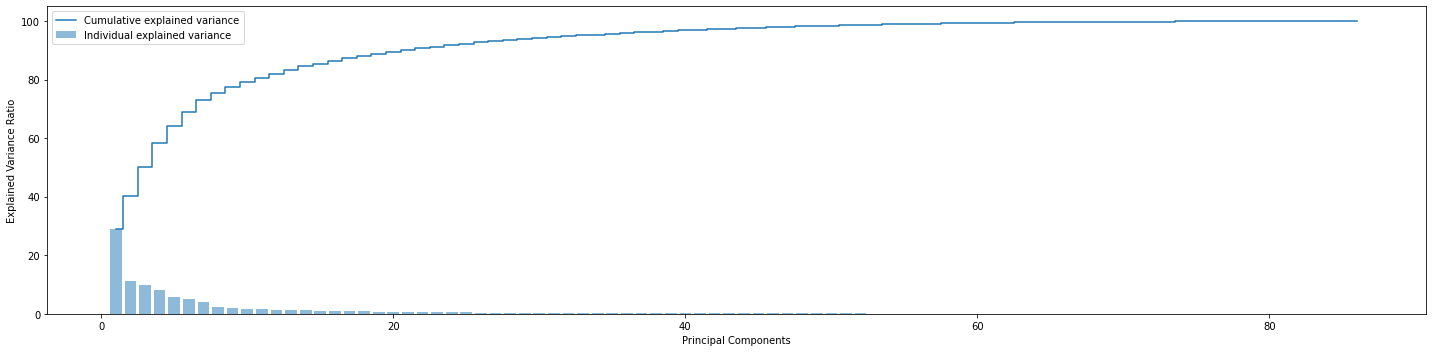

In [456]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(20 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [457]:
# Capturing 90% variance of the data
pca = PCA(n_components = 0.90)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [458]:
print(X_train_reduced.shape)
print(X_test_reduced.shape)

(334, 21)
(84, 21)


## Step 2: Design, train and test machine learning classifiers 

Here we can use the DummyClassifier to predict all accident levels just to show how misleading accuracy can be.

In [459]:
# DummyClassifier to predict all Accident levels
dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

Unique predicted labels:  [0 1 2 3 4]
Test score:  0.5714285714285714


In [460]:
# Checking unique values
predictions = pd.DataFrame(dummy_pred)
predictions[0].value_counts()

0    65
1     8
2     5
3     5
4     1
Name: 0, dtype: int64

Define MultiClass-Logloss

In [461]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

Train and test model

In [462]:
def train_test_model(model, method, X_train, X_test, y_train, y_test, of_type, index, scale, report, save_model):
    
    if report == "yes":
        print (model)
        print ("***************************************************************************")

    if method == 'CatBoostClassifier' or method == 'LGBMClassifier':

      model.fit(X_train, y_train) # Fit the model on Training set
    else:
      model.fit(X_train, y_train) # Fit the model on Training set

    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
    
    if of_type == "coef":
        # Intercept and Coefficients
        print("The intercept for our model is {}".format(model.intercept_), "\n")
        
        for idx, col_name in enumerate(X_train.columns):
            print("The coefficient for {} is {}".format(col_name, model.coef_.ravel()[idx]))

    y_pred = model.predict(X_test) # Predict on Test set

    # Initialise mc_logloss
    mc_logloss = 1.00
    if method != 'RidgeClassifier':
      y_predictions = model.predict_proba(X_test)

    train_accuracy_score = model.score(X_train, y_train)
    test_accuracy_score = model.score(X_test, y_test)

    precision_score = precision_score(y_test, y_pred, average='weighted')
    recall_score = recall_score(y_test, y_pred, average='weighted')
    f1_score = f1_score(y_test, y_pred, average='weighted')

    if method != 'RidgeClassifier':
      mc_logloss = multiclass_logloss(y_test, y_predictions, eps=1e-15)

    if report == "yes":
      # Model - Confusion matrix
      model_cm = confusion_matrix(y_test, y_pred)

      sns.heatmap(model_cm, annot=True,  fmt='.2f', xticklabels = ["I", "II", "III", "IV", "V"] , yticklabels = ["I", "II", "III", "IV", "V"] )
      plt.ylabel('Actual')
      plt.xlabel('Predicted')
      plt.show()

      # Model - Classification report
      model_cr = classification_report(y_test, y_pred)
      print(model_cr)

    # Store the accuracy results for each model in a dataframe for final comparison
    resultsDf = pd.DataFrame({'Method': method, 'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score, 
                              'Precision': precision_score, 'Recall': recall_score, 'F1-Score': f1_score
                              }, index=[index])
    
    # Save the model
    if save_model == "yes":
      filename = 'finalised_model.sav'
      pickle.dump(model, open(filename, 'wb'))
      
    return resultsDf  # return all the metrics along with predictions

Train and test all models

In [463]:
import lightgbm as lgb

def train_test_allmodels(X_train_common, X_test_common, y_train, y_test, scale):

    # define classification models
    models=[['LogisticRegression',LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)],
        ['RidgeClassifier',RidgeClassifier(random_state = 1)],
        # ['Lasso',Lasso(random_state = 1)],
        ['KNeighborsClassifier',KNeighborsClassifier(n_neighbors = 3)],
        ['SVC',SVC(kernel = 'rbf', probability=True)],
        # ['DecisionTreeClassifier',DecisionTreeClassifier(criterion = 'gini', random_state=1)],
        ['RandomForestClassifier',RandomForestClassifier(n_estimators=10, random_state=1)],
        ['BaggingClassifier',BaggingClassifier(n_estimators=30, max_samples=0.75, random_state=1, oob_score=True)],
        # ['ExtraTreesClassifier',ExtraTreesClassifier(n_estimators = 50, criterion='entropy', max_features='auto', min_samples_split=2, 
                                #  bootstrap=True, oob_score=True)],
        ['AdaBoostClassifier',AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1)],
        ['GradientBoostingClassifier',GradientBoostingClassifier(loss='deviance', n_estimators=50, learning_rate=0.1, validation_fraction=0.2, 
                                       random_state=1)],
        
    ]

    resultsDf_common = pd.DataFrame()
    i = 1
    for name, classifier in models:
        # Train and Test the model
        reg_resultsDf = train_test_model(classifier, name, X_train_common, X_test_common, y_train, y_test, 'none', i, scale, 'no', 'no')

        # Store the accuracy results for each model in a dataframe for final comparison
        resultsDf_common = pd.concat([resultsDf_common, reg_resultsDf])
        i = i+1

    return resultsDf_common

Model with Hyperparameter Tuning

In [464]:
def hyperparameterstune_model(name, model, X_train, y_train, param_grid):
    
    start = time.time()  # note the start time 
    
    # Before starting with grid search we need to create a scoring function. This is accomplished using the make_scorer function of scikit-learn.
    mll_scorer = metrics.make_scorer(multiclass_logloss, greater_is_better=False, needs_proba=True)

    # define grid search
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    if name == 'LGBMClassifier':
      grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, n_jobs=-1, cv=cv, 
                                       scoring = mll_scorer, error_score=0)
    else:
      grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, 
                                 scoring = mll_scorer, error_score=0)
      
    model_grid_result = grid_search.fit(X_train, y_train)

    # summarize results
    print("Best F1_Score: %f using %s" % (model_grid_result.best_score_, model_grid_result.best_params_))
    means = model_grid_result.cv_results_['mean_test_score']
    stds = model_grid_result.cv_results_['std_test_score']
    params = model_grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
      if param == model_grid_result.best_params_:
        print("%f (%f) with: %r" % (mean, stdev, param))
        print("95% Confidence interval range: ({0:.4f} %, {1:.4f} %)".format(mean-(2*stdev), mean+(2*stdev)))

    end = time.time()  # note the end time
    duration = end - start  # calculate the total duration
    print("Total duration" , duration, "\n")
    
    return model_grid_result.best_estimator_

1. Modelling - Logistic Regression

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


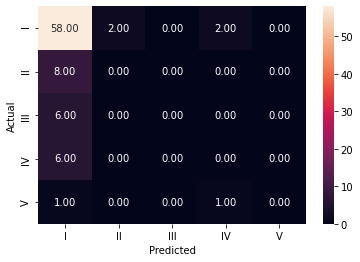

              precision    recall  f1-score   support

           0       0.73      0.94      0.82        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.69        84
   macro avg       0.15      0.19      0.16        84
weighted avg       0.54      0.69      0.61        84



Method  Train Accuracy  Test Accuracy  \
1  Logistic Regression without Sampling       0.7544910      0.6904762   

   Precision    Recall  F1-Score  
1  0.5418927 0.6904762 0.6072273

In [465]:
# For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs' handle multinomial loss; 'liblinear' is limited to one-versus-rest schemes.

resultsDf = pd.DataFrame()

# Building a Linear Regression model
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
                                                     
# Train and Test the model
resultsDf = train_test_model(lr, 'Logistic Regression without Sampling', X_train, X_test, y_train, y_test, 'none', 1, 'no', 'yes', 'no')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf

2. Decision Tree - Random Forest Classifier

While in every machine learning problem, it’s a good rule of thumb to try a variety of algorithms, it can be especially beneficial with imbalanced datasets. Decision trees frequently perform well on imbalanced data. They work by learning a hierarchy of if/else questions and this can force both classes to be addressed.

RandomForestClassifier(n_estimators=10, random_state=1)
***************************************************************************


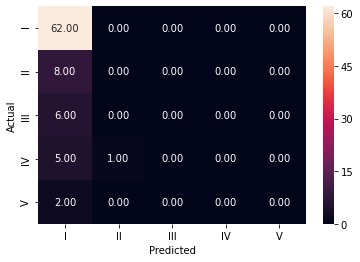

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.55      0.74      0.63        84



Method  Train Accuracy  Test Accuracy  \
1  Logistic Regression without Sampling       0.7544910      0.6904762   
2      Random Forest with original data       0.9670659      0.7380952   

   Precision    Recall  F1-Score  
1  0.5418927 0.6904762 0.6072273  
2  0.5513483 0.7380952 0.6311987

In [467]:
# Building a Random Forest Classifier on Training set
rfc_model = RandomForestClassifier(n_estimators=10, random_state=1)

# Train and Test the model
rf_df = train_test_model(rfc_model, 'Random Forest with original data', X_train, X_test, y_train, y_test, 'none', 2, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,rf_df])
resultsDf

3. Modelling - Logistic Regression - Oversampling

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


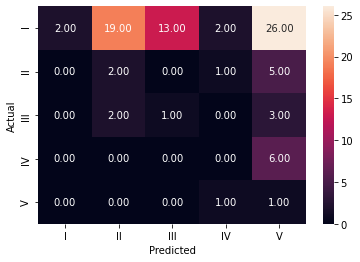

              precision    recall  f1-score   support

           0       1.00      0.03      0.06        62
           1       0.09      0.25      0.13         8
           2       0.07      0.17      0.10         6
           3       0.00      0.00      0.00         6
           4       0.02      0.50      0.05         2

    accuracy                           0.07        84
   macro avg       0.24      0.19      0.07        84
weighted avg       0.75      0.07      0.07        84



Method  Train Accuracy  Test Accuracy  \
1  Logistic Regression without Sampling       0.7544910      0.6904762   
2      Random Forest with original data       0.9670659      0.7380952   
3     Logistic Regression with Sampling       0.3611336      0.0714286   

   Precision    Recall  F1-Score  
1  0.5418927 0.6904762 0.6072273  
2  0.5513483 0.7380952 0.6311987  
3  0.7520596 0.0714286 0.0666700

In [468]:
# Building a Linear Regression model
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
                                                     
# Train and Test the model
lr_df = train_test_model(lr, 'Logistic Regression with Sampling', X_train_up, X_test, y_train_up, y_test, 'none', 3, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,lr_df])
resultsDf

4. Modelling - Logistic Regression - SMOTE

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


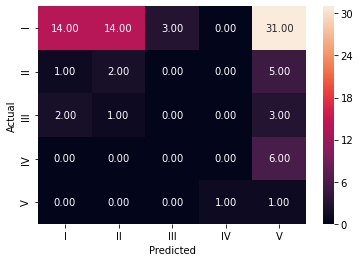

              precision    recall  f1-score   support

           0       0.82      0.23      0.35        62
           1       0.12      0.25      0.16         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.02      0.50      0.04         2

    accuracy                           0.20        84
   macro avg       0.19      0.20      0.11        84
weighted avg       0.62      0.20      0.28        84



Method  Train Accuracy  Test Accuracy  \
1  Logistic Regression without Sampling       0.7544910      0.6904762   
2      Random Forest with original data       0.9670659      0.7380952   
3     Logistic Regression with Sampling       0.3611336      0.0714286   
4        Logistic Regression with SMOTE       0.4121457      0.2023810   

   Precision    Recall  F1-Score  
1  0.5418927 0.6904762 0.6072273  
2  0.5513483 0.7380952 0.6311987  
3  0.7520596 0.0714286 0.0666700  
4  0.6195652 0.2023810 0.2778335

In [469]:
# Building a Linear Regression model
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
                                                     
# Train and Test the model
lr_smote_df = train_test_model(lr, 'Logistic Regression with SMOTE', X_train_smote, X_test, y_train_smote, y_test, 'none', 4, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,lr_smote_df])
resultsDf

All models - Original data

In [470]:
# Train and Test all models with Lasso interaction terms
train_test_allmodels(X_train, X_test, y_train, y_test, 'no')

Method  Train Accuracy  Test Accuracy  Precision  \
1          LogisticRegression       0.7544910      0.6904762  0.5418927   
2             RidgeClassifier       0.7604790      0.7261905  0.5490708   
3        KNeighborsClassifier       0.7455090      0.7261905  0.6217949   
4                         SVC       0.7395210      0.7380952  0.5447846   
5      RandomForestClassifier       0.9670659      0.7380952  0.5513483   
6           BaggingClassifier       0.9550898      0.7142857  0.5400697   
7          AdaBoostClassifier       0.6017964      0.5714286  0.5936508   
8  GradientBoostingClassifier       0.9461078      0.7261905  0.6429344   

     Recall  F1-Score  
1 0.6904762 0.6072273  
2 0.7261905 0.6253307  
3 0.7261905 0.6567409  
4 0.7380952 0.6268754  
5 0.7380952 0.6311987  
6 0.7142857 0.6150794  
7 0.5714286 0.5779221  
8 0.7261905 0.6549291

In [471]:
# Train and Test all models with Lasso interaction terms
ml_model_original=train_test_allmodels(X_train, X_test, y_train, y_test, 'no')

In [472]:
df_ml_model_original=pd.DataFrame(ml_model_original)

In [473]:
df_ml_model_original.index=df_ml_model_original["Method"]

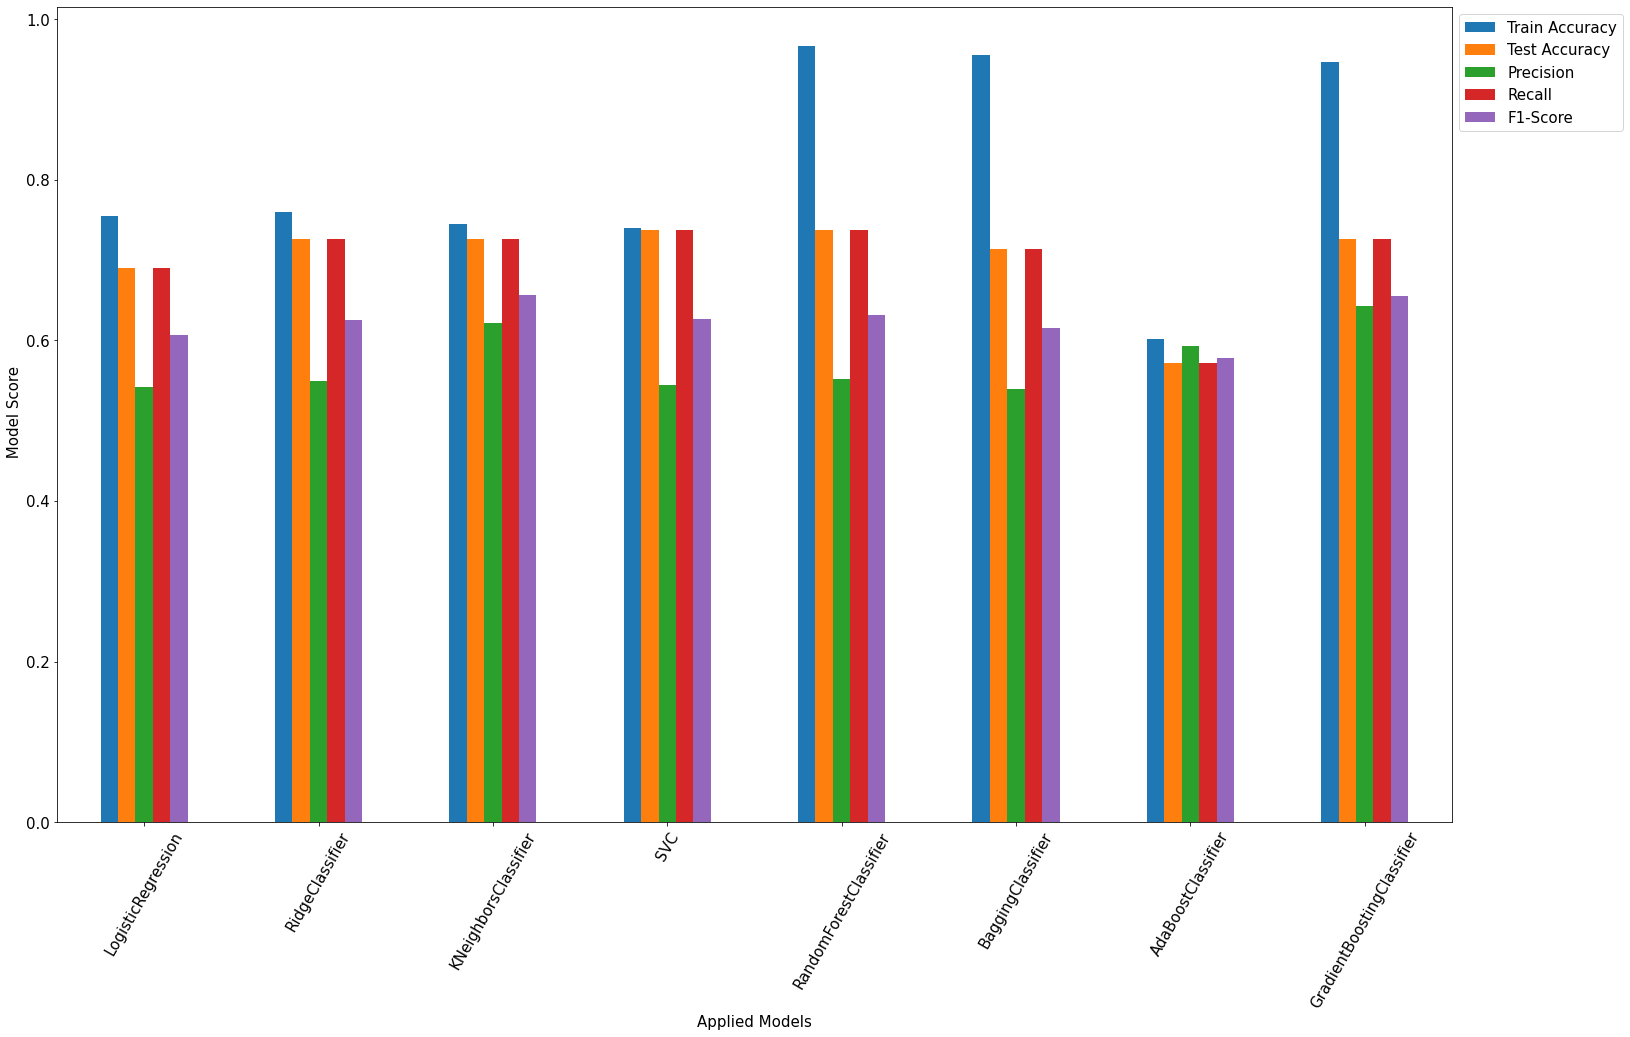

In [474]:
ax = df_ml_model_original.plot(kind='bar', rot=0, figsize = (25,15), fontsize = 15) #, colormap='Paired')
ax.legend(bbox_to_anchor=(1, 1), prop={'size': 15})
ax.set_ylabel(" Model Score", fontsize=15)
ax.set_xlabel("Applied Models", fontsize=15)
plt.xticks(rotation=60)
plt.show()

### Comments:

By comparing the results from all above methods, we can select the best method as KNeighborsClassifier with f1-score 65.67%

All models - Oversampling data

In [475]:
# Train and Test all models with Lasso interaction terms
train_test_allmodels(X_train_up, X_test, y_train_up, y_test, 'no')

Method  Train Accuracy  Test Accuracy  Precision  \
1          LogisticRegression       0.3611336      0.0714286  0.7520596   
2             RidgeClassifier       0.8048583      0.7380952  0.5447846   
3        KNeighborsClassifier       0.9514170      0.2500000  0.5680272   
4                         SVC       0.2890688      0.0714286  0.0051020   
5      RandomForestClassifier       0.9983806      0.7142857  0.5988547   
6           BaggingClassifier       0.9967611      0.6666667  0.6057344   
7          AdaBoostClassifier       0.4485830      0.7023810  0.5678726   
8  GradientBoostingClassifier       0.9651822      0.5357143  0.6128088   

     Recall  F1-Score  
1 0.0714286 0.0666700  
2 0.7380952 0.6268754  
3 0.2500000 0.2949188  
4 0.0714286 0.0095238  
5 0.7142857 0.6367443  
6 0.6666667 0.6272775  
7 0.7023810 0.6278691  
8 0.5357143 0.5645253

In [477]:
# Train and Test all models with Lasso interaction terms
ml_model_Oversampling=train_test_allmodels(X_train_up, X_test, y_train_up, y_test, 'no')

In [478]:
df_ml_model_Oversampling=pd.DataFrame(ml_model_Oversampling)

In [479]:
df_ml_model_Oversampling.index=ml_model_Oversampling["Method"]


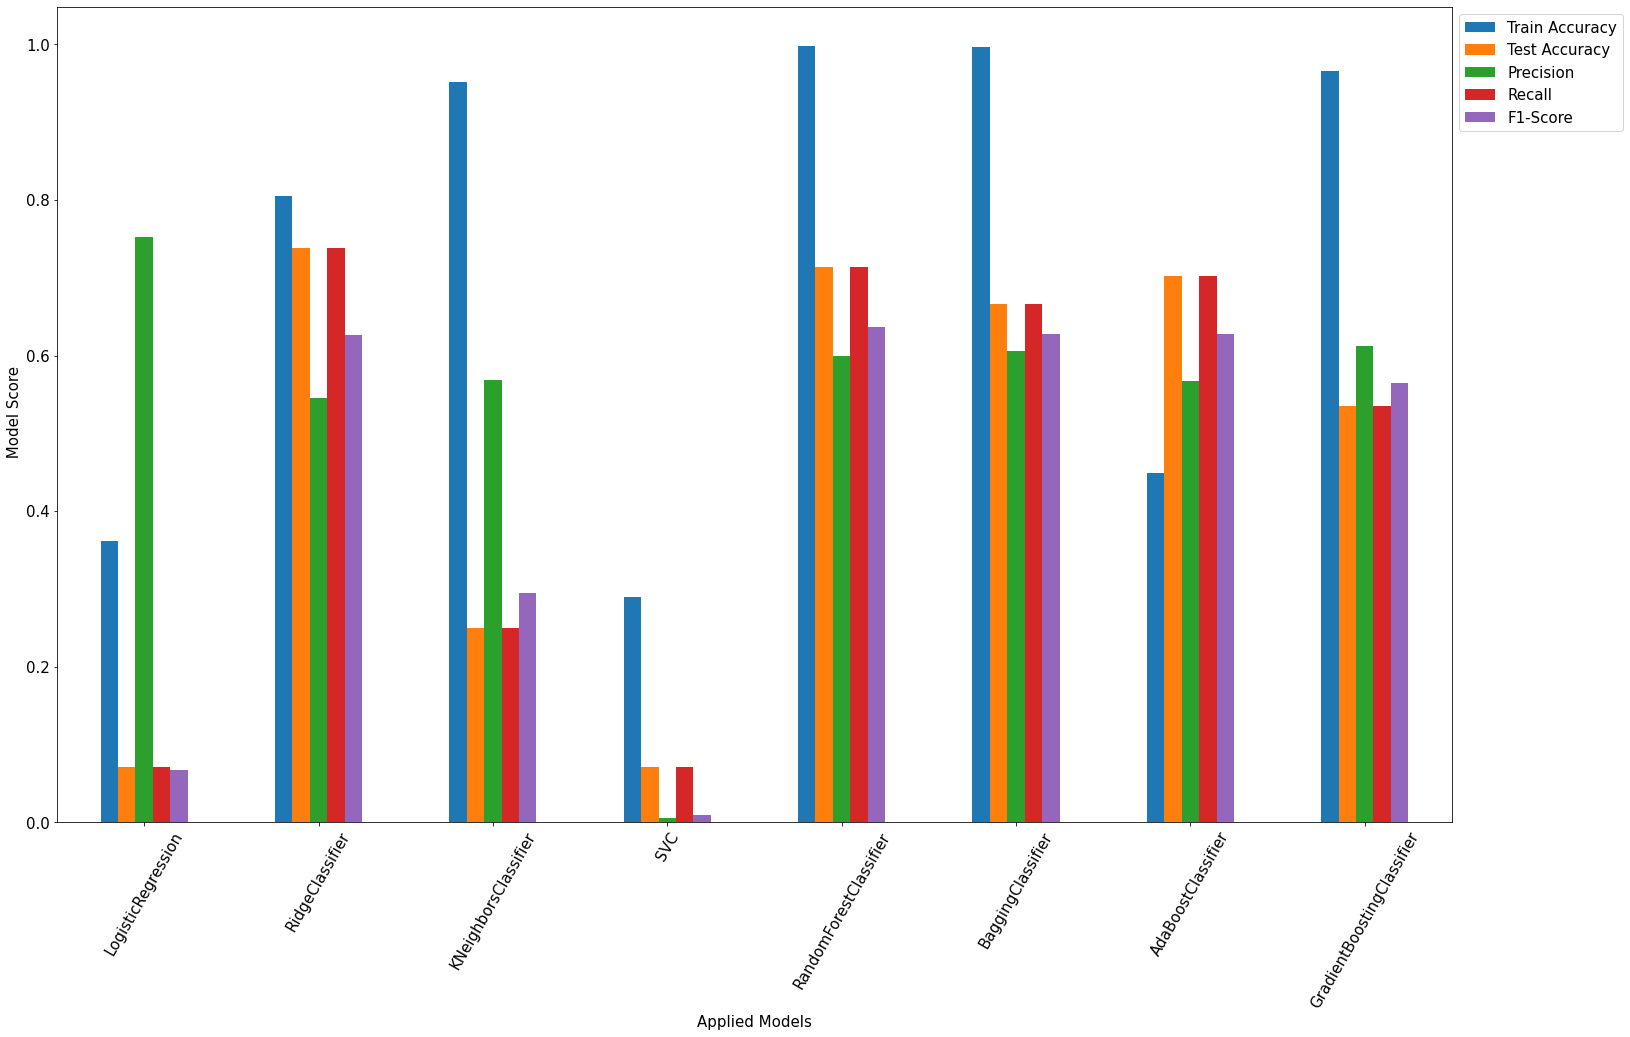

In [480]:
ax = df_ml_model_Oversampling.plot(kind='bar', rot=0, figsize = (25,15), fontsize = 15) #, colormap='Paired')
ax.legend(bbox_to_anchor=(1, 1), prop={'size': 15})
ax.set_ylabel(" Model Score", fontsize=15)
ax.set_xlabel("Applied Models", fontsize=15)
plt.xticks(rotation=60)
plt.show()

### Comments:

By comparing the results from all above methods, we can select best method as Ridge classifier with f1-score 62.68% and all other methods are over fitting the training data.

### All models - SMOTE data

In [481]:
# # Train and Test all models with Lasso interaction terms
train_test_allmodels(X_train_smote, X_test, y_train_smote, y_test, 'no')

Method  Train Accuracy  Test Accuracy  Precision  \
1          LogisticRegression       0.4121457      0.2023810  0.6195652   
2             RidgeClassifier       0.8048583      0.0714286  0.0051020   
3        KNeighborsClassifier       0.9109312      0.1666667  0.5160192   
4                         SVC       0.2955466      0.0714286  0.0051020   
5      RandomForestClassifier       0.9943320      0.6190476  0.5978423   
6           BaggingClassifier       0.9943320      0.5476190  0.5954036   
7          AdaBoostClassifier       0.5287449      0.7500000  0.6461310   
8  GradientBoostingClassifier       0.9757085      0.5952381  0.6156135   

     Recall  F1-Score  
1 0.2023810 0.2778335  
2 0.0714286 0.0095238  
3 0.1666667 0.1864193  
4 0.0714286 0.0095238  
5 0.6190476 0.6080877  
6 0.5476190 0.5666982  
7 0.7500000 0.6664511  
8 0.5952381 0.6008296

In [482]:
# # Train and Test all models with Lasso interaction terms
ml_models_smote=train_test_allmodels(X_train_smote, X_test, y_train_smote, y_test, 'no')

In [483]:
df_ml_models_smote=pd.DataFrame(ml_models_smote)

In [484]:
df_ml_models_smote.index=ml_models_smote["Method"]

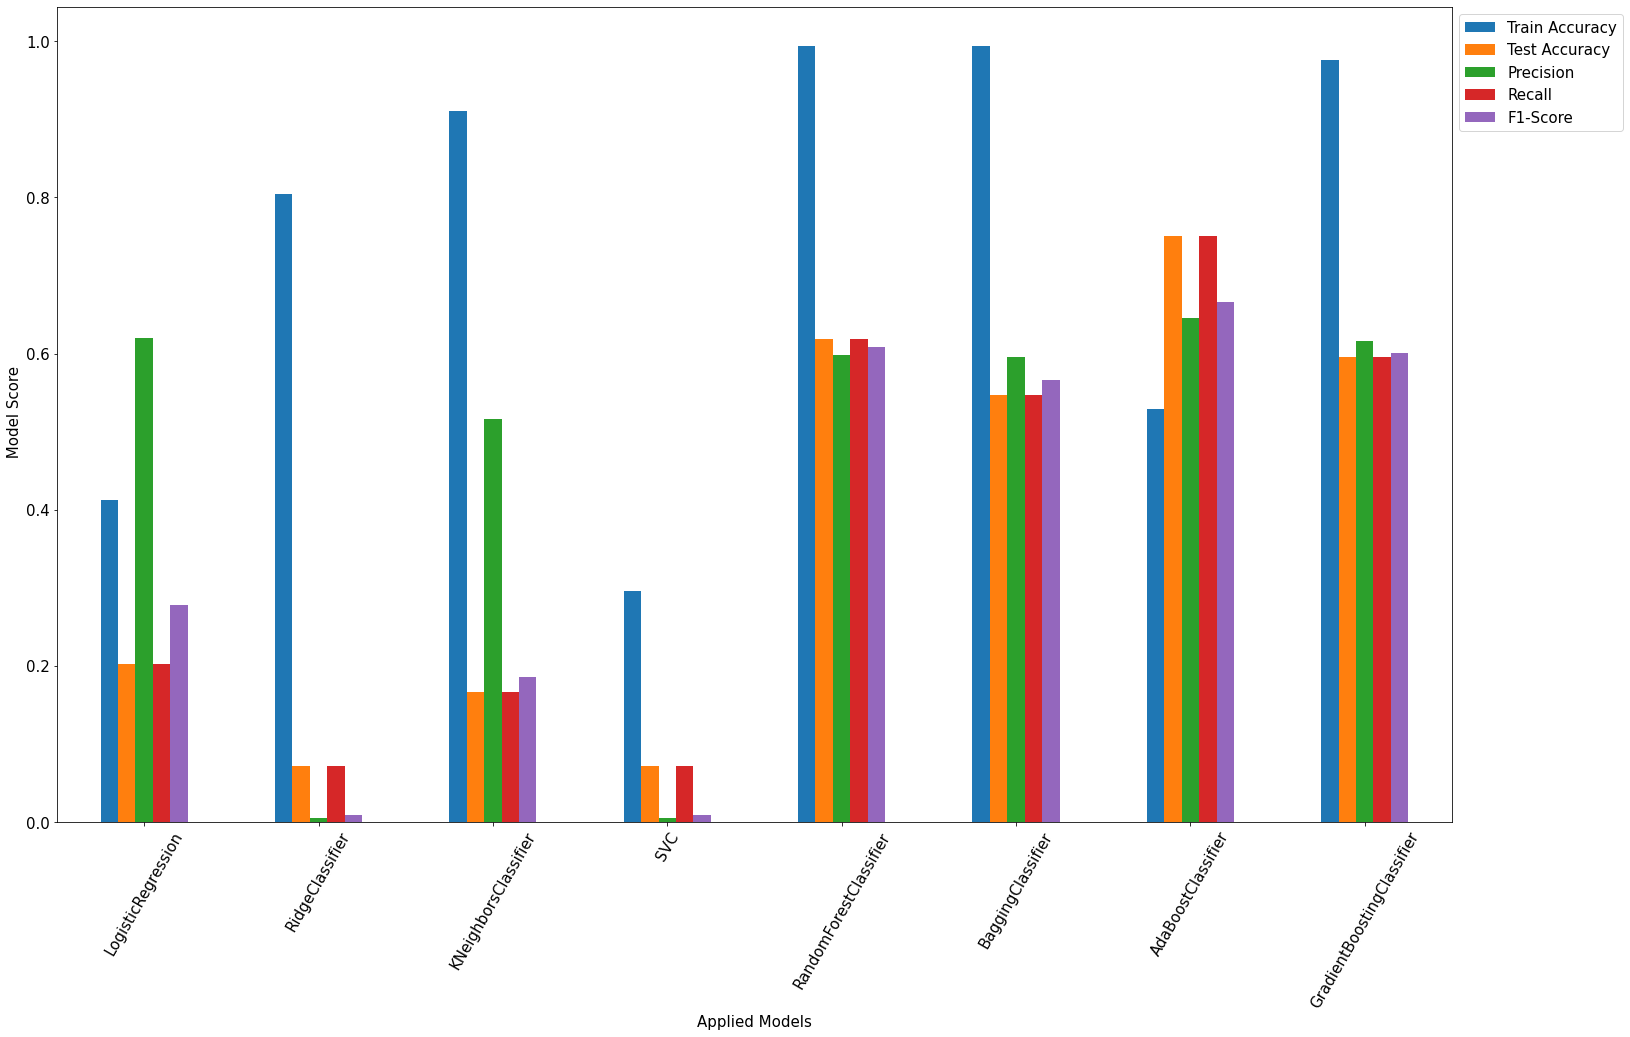

In [485]:
ax = df_ml_models_smote.plot(kind='bar', rot=0, figsize = (25,15), fontsize = 15) #, colormap='Paired')
ax.legend(bbox_to_anchor=(1, 1), prop={'size': 15})
ax.set_ylabel(" Model Score", fontsize=15)
ax.set_xlabel("Applied Models", fontsize=15)
plt.xticks(rotation=60)
plt.show()

### Comments

After apply smote all model getting overfitted in training hence we are not recomended for deployment

### Step 3: Design, train and test Neural networks classifiers

In [ ]:
# disable keras warnings
tf.get_logger().setLevel('ERROR')

Get ANN Multiclass Classification Metrics

In [ ]:
# get the accuracy, precision, recall, f1 score from model
def get_classification_metrics(model, X_test, y_test, target_type):
  
  # predict probabilities for test set
  yhat_probs = model.predict(X_test, verbose=0) # Multiclass

  # predict crisp classes for test set
  if target_type == 'multi_class':
    yhat_classes = model.predict_classes(X_test, verbose=0) # Multiclass
  else:
    yhat_classes = (np.asarray(model.predict(X_test))).round() # Multilabel

  # reduce to 1d array
  yhat_probs = yhat_probs[:, 0]

  # accuracy: (tp + tn) / (p + n)
  accuracy = accuracy_score(y_test, yhat_classes)

  # precision tp / (tp + fp)
  precision = precision_score(y_test, yhat_classes, average='micro')

  # recall: tp / (tp + fn)
  recall = recall_score(y_test, yhat_classes, average='micro')

  # f1: 2 tp / (2 tp + fp + fn)
  f1 = f1_score(y_test, yhat_classes, average='micro')

  return accuracy, precision, recall, f1

In [ ]:
class Metrics(tf.keras.callbacks.Callback):
    
    def __init__(self, validation_data=()):
        super().__init__()
        self.validation_data = validation_data

    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        xVal, yVal, target_type = self.validation_data
        if target_type == 'multi_class':
          val_predict_classes = model.predict_classes(xVal, verbose=0) # Multiclass
        else:
          val_predict_classes = (np.asarray(self.model.predict(xVal))).round() # Multilabel
        
        
        val_targ = yVal

        _val_f1 = f1_score(val_targ, val_predict_classes, average='micro')
        _val_recall = recall_score(val_targ, val_predict_classes, average='micro')
        _val_precision = precision_score(val_targ, val_predict_classes, average='micro')
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        print("— train_f1: %f — train_precision: %f — train_recall %f" % (_val_f1, _val_precision, _val_recall))
        return

### Convert Classification to Numeric problem

In this section, we will create a classification model that uses categorical columns and tf-idf features from accident description and label encoded target variable. We can use simple densely connected neural networks to make predictions.

Since we have ordinal relationship between each category in target variable, I have considered this one as numerical/regression problem and try to observe the ANN behaviour.

In [ ]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

# define the model
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(150, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(40, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

# compile the keras model
#opt = optimizers.Adam(lr=1e-3)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

# fit the keras model on the dataset
# training_history = model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, validation_data=(X_test, y_test), callbacks=[rlrp])

In [ ]:
model_ann_numval=model

In [ ]:
# fit the keras model on the dataset
training_history__ann_numval = model_ann_numval.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, validation_data=(X_test, y_test), callbacks=[rlrp])

Epoch 1/50
42/42 [==============================] - 5s 22ms/step - loss: 1.1187 - accuracy: 0.4521 - val_loss: 1.1398 - val_accuracy: 0.4048 - lr: 0.0010
Epoch 2/50
42/42 [==============================] - 0s 11ms/step - loss: 1.0162 - accuracy: 0.4251 - val_loss: 1.0887 - val_accuracy: 0.3452 - lr: 0.0010
Epoch 3/50
42/42 [==============================] - 0s 10ms/step - loss: 0.9447 - accuracy: 0.4970 - val_loss: 1.1063 - val_accuracy: 0.5952 - lr: 0.0010
Epoch 4/50
42/42 [==============================] - 0s 10ms/step - loss: 0.8877 - accuracy: 0.4970 - val_loss: 1.0450 - val_accuracy: 0.5238 - lr: 0.0010
Epoch 5/50
42/42 [==============================] - 0s 11ms/step - loss: 0.8212 - accuracy: 0.4970 - val_loss: 1.0923 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 6/50
42/42 [==============================] - 0s 10ms/step - loss: 0.7744 - accuracy: 0.5539 - val_loss: 1.0580 - val_accuracy: 0.5119 - lr: 0.0010
Epoch 7/50
42/42 [==============================] - 0s 11ms/step - loss: 0.7

In [ ]:
model_ann_numval.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                4350      
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 150)               15150     
                                                                 
 dense_3 (Dense)             (None, 40)                6040      
                                                                 
 dense_4 (Dense)             (None, 1)                 41        
                                                                 
Total params: 30,681
Trainable params: 30,681
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# evaluate the keras model
_, train_accuracy_ann_numval = model_ann_numval.evaluate(X_train, y_train, batch_size=8, verbose=0)
_, test_accuracy_ann_numval = model_ann_numval.evaluate(X_test, y_test, batch_size=8, verbose=0)
print('Train accuracy: %.2f' % (train_accuracy_ann_numval*100))
print('Test accuracy: %.2f' % (test_accuracy_ann_numval*100))

Train accuracy: 72.46
Test accuracy: 67.86


Text(0.5, 1.0, 'Training and validation loss')

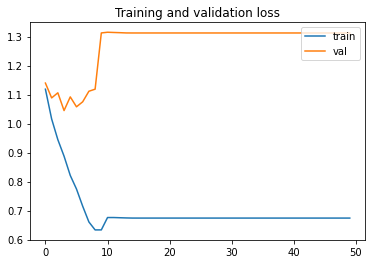

In [ ]:
epochs = range(len(training_history__ann_numval.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot  (epochs, training_history__ann_numval.history['loss'], label = 'train')
plt.plot  (epochs, training_history__ann_numval.history['val_loss'], label = 'val')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Above one is underfit model, it can be identified from the learning curve of the training loss only. It is showing noisy values of relatively high loss, indicating that the model was unable to learn the training dataset at all and model does not have a suitable capacity for the complexity of the dataset.

Text(0.5, 1.0, 'Training and validation accuracy')

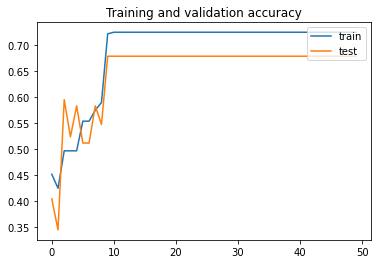

In [ ]:
# plot accuracy learning curves
plt.plot(epochs, training_history__ann_numval.history['accuracy'], label = 'train')
plt.plot(epochs, training_history__ann_numval.history['val_accuracy'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

### 2. Creating a Model with Categorical features Only

In this section, we will create a classification model that uses categorical columns alone. Since the data for these columns is well structured and doesn't contain any sequential or spatial pattern, we can use simple densely connected neural networks to make predictions.

In [ ]:
# Select input and output features
X_cat = ind_featenc_df.drop(['Accident Level','Potential Accident Level'], axis = 1)
y_cat = industry_safety_df['Accident Level']

In [ ]:
# Encode labels in column 'Accident Level'.
y_cat = LabelEncoder().fit_transform(y_cat)

In [ ]:
# Divide our data into testing and training sets:
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat, y_cat, test_size = 0.20, random_state = 1, stratify = y_cat)

print('X_cat_train shape : ({0})'.format(X_cat_train.shape[0]))
print('y_cat_train shape : ({0},)'.format(y_cat_train.shape[0]))
print('X_cat_test shape : ({0})'.format(X_cat_test.shape[0]))
print('y_cat_test shape : ({0},)'.format(y_cat_test.shape[0]))

X_cat_train shape : (334)
y_cat_train shape : (334,)
X_cat_test shape : (84)
y_cat_test shape : (84,)


In [ ]:
# Convert both the training and test labels into one-hot encoded vectors:
y_cat_train = to_categorical(y_cat_train)
y_cat_test = to_categorical(y_cat_test)

In [ ]:
# Variable transformation using StandardScaler
scaler_X = StandardScaler()#StandardScaler()
X_cat_train.iloc[:,:6] = scaler_X.fit_transform(X_cat_train.iloc[:,:6]) # Scaling only first 6 feautres

X_cat_test.iloc[:,:6] = scaler_X.fit_transform(X_cat_test.iloc[:,:6]) # Scaling only first 6 feautres

In [ ]:
# fix random seed for reproducibility
# reset_random_seeds()

#param = 1e-9
model = Sequential()
param = 1e-4

input2 = Input(shape=(X_cat_train.shape[1],))
dense_layer_1 = Dense(10, input_dim=X_cat_train.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                kernel_constraint=unit_norm())(input2)
drop_out_layer_1 = Dropout(0.2)(dense_layer_1)
batch_norm_layer_1 = BatchNormalization()(drop_out_layer_1)
dense_layer_2 = Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm())(batch_norm_layer_1)
drop_out_layer_2 = Dropout(0.5)(dense_layer_2)
batch_norm_layer_2 = BatchNormalization()(drop_out_layer_2)
dense_layer_3 = Dense(5, activation='softmax', kernel_regularizer=l2(param), kernel_constraint=unit_norm())(batch_norm_layer_2)

model = Model(inputs=input2, outputs=dense_layer_3)

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 56)]              0         
                                                                 
 dense_5 (Dense)             (None, 10)                570       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                             

In [ ]:
# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_cat_train, y_cat_train, target_type))

# fit the keras model on the dataset
# training_history_ann_cat = model_ann_cat.fit(X_cat_train, y_cat_train, epochs=50, batch_size=8, verbose=1, validation_data=(X_cat_test, y_cat_test), callbacks=[rlrp, metrics])

In [ ]:
model_ann_cat=model

In [ ]:
# fit the keras model on the dataset
training_history_ann_cat = model_ann_cat.fit(X_cat_train, y_cat_train, epochs=50, batch_size=8, verbose=1, validation_data=(X_cat_test, y_cat_test), callbacks=[rlrp, metrics])

Epoch 1/50
42/42 [==============================] - 4s 39ms/step - loss: 1.8074 - acc: 0.3234 - val_loss: 1.3710 - val_acc: 0.6310 - lr: 0.0010
Epoch 2/50
42/42 [==============================] - 1s 23ms/step - loss: 1.5355 - acc: 0.4671 - val_loss: 1.1763 - val_acc: 0.7381 - lr: 0.0010
Epoch 3/50
42/42 [==============================] - 1s 23ms/step - loss: 1.4200 - acc: 0.5389 - val_loss: 1.0752 - val_acc: 0.7381 - lr: 0.0010
Epoch 4/50
42/42 [==============================] - 1s 23ms/step - loss: 1.2510 - acc: 0.6138 - val_loss: 1.0053 - val_acc: 0.7381 - lr: 0.0010
Epoch 5/50
42/42 [==============================] - 1s 22ms/step - loss: 1.1848 - acc: 0.6287 - val_loss: 0.9794 - val_acc: 0.7381 - lr: 0.0010
Epoch 6/50
42/42 [==============================] - 1s 23ms/step - loss: 1.1234 - acc: 0.6677 - val_loss: 0.9464 - val_acc: 0.7381 - lr: 0.0010
Epoch 7/50
42/42 [==============================] - 1s 23ms/step - loss: 1.1331 - acc: 0.6946 - val_loss: 0.9372 - val_acc: 0.7381 - lr:

In [ ]:
# evaluate the keras model
train_loss_ann_cat,train_accuracy_ann_cat = model_ann_cat.evaluate(X_cat_train, y_cat_train, batch_size=8, verbose=1)
val_loss_ann_cat,test_accuracy_ann_cat = model_ann_cat.evaluate(X_cat_test, y_cat_test, batch_size=8, verbose=1)


print('Train accuracy: %.2f' % (train_accuracy_ann_cat*100))
print('Test accuracy: %.2f' % (test_accuracy_ann_cat*100))

print('Train loss: %.2f' % (train_loss_ann_cat*100))
print('Val loss: %.2f' % (val_loss_ann_cat*100))

11/11 [==============================] - 0s 7ms/step - loss: 0.8737 - acc: 0.7381
Train accuracy: 73.95
Test accuracy: 73.81
Train loss: 91.63
Val loss: 87.37


In [ ]:
# accuracy, precision, recall, f1 = get_classification_metrics(model_ann_cat, X_cat_test, y_cat_test, target_type)
# print('Accuracy: %f' % accuracy)
# print('Precision: %f' % precision)
# print('Recall: %f' % recall)
# print('F1 score: %f' % f1)


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, classification_report, make_scorer,recall_score
#y_pred_s = (model.predict(X_text_test) > 0.5).astype('int32')
y_pred_LSTM_Cat = (model_ann_cat.predict(X_cat_test))
x=(y_pred_LSTM_Cat  >= 0.5).astype('int32')
#print(f'Classification Report:\n{classification_report(y_pred_s, y_text_test)}')

In [ ]:
f1_score_ann_cat=f1_score(x, y_cat_test, average='micro')

print('f1_score: %.2f' % (f1_score_ann_cat*100))

f1_score: 74.25


In [ ]:
print(f'Classification Report:\n{classification_report(x, y_cat_test)}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        83
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.74      0.75      0.74        83
   macro avg       0.20      0.15      0.17        83
weighted avg       1.00      0.75      0.86        83
 samples avg       0.74      0.74      0.74        83



<AxesSubplot:>

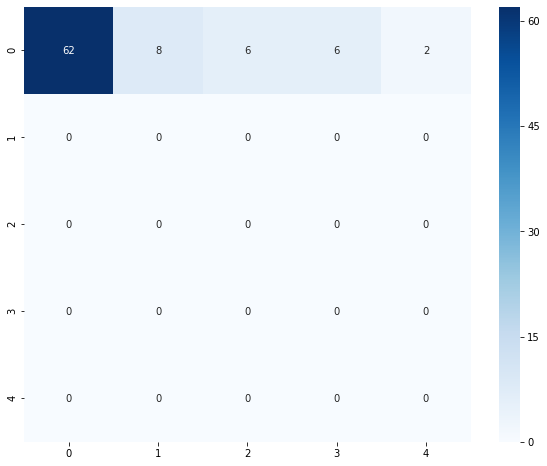

In [ ]:
# Displing Confusion matrix to show mis-classifications

conf_mat_ann_cat = confusion_matrix(x.argmax(axis=1), y_cat_test.argmax(axis=1))
df_conf_mat1 = pd.DataFrame(conf_mat_ann_cat)
plt.figure(figsize = (10,8))
sns.heatmap(df_conf_mat1, annot=True,cmap='Blues', fmt='g')

Text(0.5, 1.0, 'Training and validation loss')

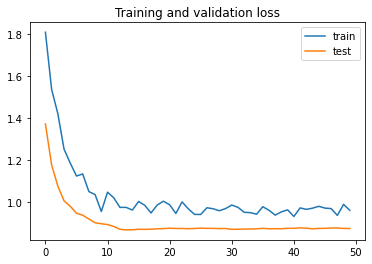

In [ ]:
epochs = range(len(training_history_ann_cat.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history_ann_cat.history['loss'], label = 'train')
plt.plot(epochs, training_history_ann_cat.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Above one is good fit, it is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values. The loss of the model will almost always be lower on the training dataset than the validation dataset.

Text(0.5, 1.0, 'Training and validation accuracy')

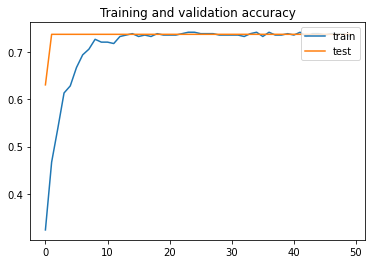

In [ ]:
# plot accuracy learning curves
plt.plot(epochs, training_history_ann_cat.history['acc'], label = 'train')
plt.plot(epochs, training_history_ann_cat.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

We could see it accuracy continually rise during training. 

As expected, we see the learning curves for accuracy on the test dataset plateau, indicating that the model has no longer overfit the training dataset and it is generalized model.

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
model.save("finalized_keras_model.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


### Multiclass classification-ANN Model- Target variable - One hot encoded with Original Data

In this section, we will create a classification model that uses categorical columns and tf-idf features from accident description and one-hot encoded target variable. We can use simple densely connected neural networks to make predictions.

In [ ]:
# fix random seed for reproducibility
# reset_random_seeds()

#param = 1e-9
param = 1e-4

# define the model
model = Sequential()

model.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                kernel_constraint=unit_norm()))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm()))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm())) # Multilabel

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_test, y_test_dummy, target_type))

# fit the keras model on the dataset
# training_history = model.fit(X_train, y_train_dummy, epochs=50, batch_size=8, verbose=1, validation_data=(X_test, y_test_dummy), callbacks=[rlrp, metrics])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                870       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 batch_normalization_2 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 batch_normalization_3 (Batc  (None, 10)               40        
 hNormalization)                                      

In [ ]:
model_ann_o_data=model

In [ ]:
# fit the keras model on the dataset
training_history_ann_o_data = model_ann_o_data.fit(X_train, y_train_dummy, epochs=50, batch_size=8, verbose=1, validation_data=(X_test, y_test_dummy), callbacks=[rlrp, metrics])

Epoch 1/50
42/42 [==============================] - 3s 36ms/step - loss: 1.8182 - categorical_accuracy: 0.2754 - val_loss: 1.4301 - val_categorical_accuracy: 0.6667 - lr: 0.0010
Epoch 2/50
42/42 [==============================] - 1s 21ms/step - loss: 1.5573 - categorical_accuracy: 0.3862 - val_loss: 1.2306 - val_categorical_accuracy: 0.7500 - lr: 0.0010
Epoch 3/50
42/42 [==============================] - 1s 21ms/step - loss: 1.3147 - categorical_accuracy: 0.5449 - val_loss: 1.0720 - val_categorical_accuracy: 0.7381 - lr: 0.0010
Epoch 4/50
42/42 [==============================] - 1s 21ms/step - loss: 1.2290 - categorical_accuracy: 0.5719 - val_loss: 0.9963 - val_categorical_accuracy: 0.7381 - lr: 0.0010
Epoch 5/50
42/42 [==============================] - 1s 21ms/step - loss: 1.1226 - categorical_accuracy: 0.6497 - val_loss: 0.9439 - val_categorical_accuracy: 0.7381 - lr: 0.0010
Epoch 6/50
42/42 [==============================] - 1s 21ms/step - loss: 1.0861 - categorical_accuracy: 0.6856

In [ ]:
# # evaluate the keras model
# _, train_accuracy_ann_o_data = model_ann_o_data.evaluate(X_train, y_train_dummy, batch_size=8, verbose=0)
# _, test_accuracy_ann_o_data = model_ann_o_data.evaluate(X_test, y_test_dummy, batch_size=8, verbose=0)

# print('Train accuracy: %.2f' % (train_accuracy_ann_o_data*100))
# print('Test accuracy: %.2f' % (test_accuracy_ann_o_data*100))

In [ ]:
# evaluate the keras model
train_loss_ann_o_data,train_accuracy_ann_o_data = model_ann_o_data.evaluate(X_train, y_train_dummy, batch_size=8, verbose=1)
val_loss_ann_o_data,test_accuracy_ann_o_data = model_ann_o_data.evaluate(X_test, y_test_dummy, batch_size=8, verbose=1)


print('Train accuracy: %.2f' % (train_accuracy_ann_o_data*100))
print('Test accuracy: %.2f' % (test_accuracy_ann_o_data*100))

print('Train loss: %.2f' % (train_loss_ann_o_data*100))
print('Val loss: %.2f' % (val_loss_ann_o_data*100))

11/11 [==============================] - 0s 7ms/step - loss: 0.9158 - categorical_accuracy: 0.7381
Train accuracy: 73.95
Test accuracy: 73.81
Train loss: 89.48
Val loss: 91.58


In [ ]:
# accuracy, precision, recall, f1 = get_classification_metrics(model_ann_o_data, X_test, y_test_dummy, target_type)
# print('Accuracy: %f' % accuracy)
# print('Precision: %f' % precision)
# print('Recall: %f' % recall)
# print('F1 score: %f' % f1)


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, classification_report, make_scorer,recall_score
#y_pred_s = (model.predict(X_text_test) > 0.5).astype('int32')
y_pred_ANN = (model_ann_o_data.predict(X_test))
x=(y_pred_ANN >= 0.5).astype('int32')
#print(f'Classification Report:\n{classification_report(y_pred_s, y_text_test)}')

In [ ]:
f1_score_ann_o_data=f1_score(x, y_test_dummy, average='micro')

print('f1_score: %.2f' % (f1_score_ann_o_data*100))

f1_score: 73.81


In [ ]:
print(f'Classification Report:\n{classification_report(x, y_test_dummy)}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        84
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.74      0.74      0.74        84
   macro avg       0.20      0.15      0.17        84
weighted avg       1.00      0.74      0.85        84
 samples avg       0.74      0.74      0.74        84



<AxesSubplot:>

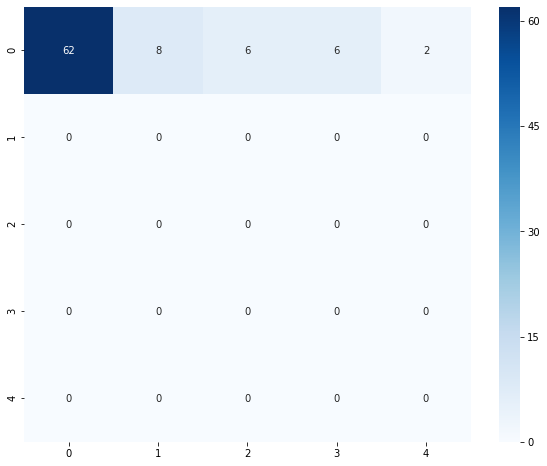

In [ ]:
# Displing Confusion matrix to show mis-classifications

conf_mat_ann_o_data = confusion_matrix(x.argmax(axis=1), y_test_dummy.argmax(axis=1))
df_conf_mat2 = pd.DataFrame(conf_mat_ann_o_data )
plt.figure(figsize = (10,8))
sns.heatmap(df_conf_mat2, annot=True,cmap='Blues', fmt='g')

Text(0.5, 1.0, 'Training and validation loss')

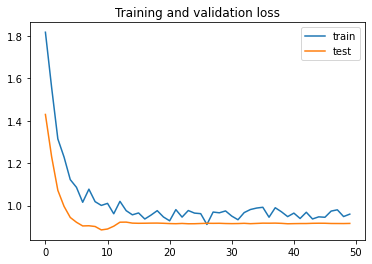

In [ ]:
epochs = range(len(training_history_ann_o_data.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history_ann_o_data.history['loss'], label = 'train')
plt.plot(epochs, training_history_ann_o_data.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Above one is good fit, it is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values. The loss of the model will almost always be lower on the training dataset than the validation dataset.

Text(0.5, 1.0, 'Training and validation accuracy')

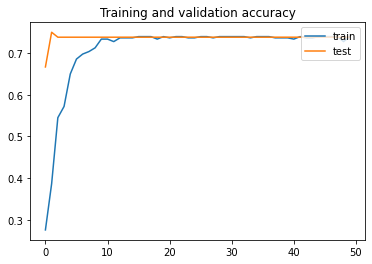

In [ ]:
# plot accuracy learning curves
plt.plot(epochs, training_history_ann_o_data.history['categorical_accuracy'], label = 'train')
plt.plot(epochs, training_history_ann_o_data.history['val_categorical_accuracy'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

We could see it accuracy continually rise during training. As expected, we see the learning curves for accuracy on the test dataset plateau, indicating that the model has no longer overfit the training dataset and it is generalized model.

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
model.save("finalized_keras_model.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


### Multiclass classification - Target variable - One hot encoded with SMOTE data

In this section, we will create a classification model that uses categorical columns and tf-idf features from accident description and one-hot encoded target variable. We can use simple densely connected neural networks to make predictions.

In [ ]:
# fix random seed for reproducibility
# reset_random_seeds()
#param = 1e-9
param = 1e-4

# define the model
model = Sequential()

model.add(Dense(10, input_dim=X_train_smote.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                kernel_constraint=unit_norm()))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm()))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm())) # Multilabel

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_train_smote, y_train_smote_dummy, target_type))

# fit the keras model on the dataset
# training_history = model.fit(X_train_smote, y_train_smote_dummy, epochs=50, batch_size=8, verbose=1, validation_data=(X_test, y_test_dummy), callbacks=[rlrp, metrics])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                870       
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 batch_normalization_4 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dropout_5 (Dropout)         (None, 10)                0         
                                                                 
 batch_normalization_5 (Batc  (None, 10)               40        
 hNormalization)                                      

In [ ]:
model_ann_smote=model

In [ ]:
# fit the keras model on the dataset
training_history_ann_smote = model_ann_smote.fit(X_train_smote, y_train_smote_dummy, epochs=50, batch_size=8, verbose=1, validation_data=(X_test, y_test_dummy), callbacks=[rlrp, metrics])

Epoch 1/50
155/155 [==============================] - 6s 25ms/step - loss: 1.9256 - categorical_accuracy: 0.2202 - val_loss: 1.4123 - val_categorical_accuracy: 0.5238 - lr: 0.0010
Epoch 2/50
155/155 [==============================] - 3s 20ms/step - loss: 1.7854 - categorical_accuracy: 0.2073 - val_loss: 2.0211 - val_categorical_accuracy: 0.2738 - lr: 0.0010
Epoch 3/50
155/155 [==============================] - 3s 21ms/step - loss: 1.7978 - categorical_accuracy: 0.1660 - val_loss: 4.0976 - val_categorical_accuracy: 0.1310 - lr: 0.0010
Epoch 4/50
155/155 [==============================] - 3s 20ms/step - loss: 1.7395 - categorical_accuracy: 0.2016 - val_loss: 9.2242 - val_categorical_accuracy: 0.0833 - lr: 0.0010
Epoch 5/50
155/155 [==============================] - 3s 21ms/step - loss: 1.7010 - categorical_accuracy: 0.2057 - val_loss: 15.8016 - val_categorical_accuracy: 0.0714 - lr: 0.0010
Epoch 6/50
155/155 [==============================] - 3s 20ms/step - loss: 1.6910 - categorical_acc

In [ ]:
# # evaluate the keras model
# _, train_accuracy_ann_smote = model_ann_smote.evaluate(X_train_smote, y_train_smote_dummy, batch_size=8, verbose=0)
# _, test_accuracy_ann_smote = model_ann_smote.evaluate(X_test, y_test_dummy, batch_size=8, verbose=0)

# print('Train accuracy: %.2f' % (train_accuracy_ann_smote*100))
# print('Test accuracy: %.2f' % (test_accuracy_ann_smote*100))

In [ ]:
# evaluate the keras model
train_loss_ann_smote,train_accuracy_ann_smote = model_ann_smote.evaluate(X_train_smote, y_train_smote_dummy, batch_size=8, verbose=1)
val_loss_ann_smote,test_accuracy_ann_smote = model_ann_smote.evaluate(X_test, y_test_dummy, batch_size=8, verbose=1)


print('Train accuracy: %.2f' % (train_accuracy_ann_smote*100))
print('Test accuracy: %.2f' % (test_accuracy_ann_smote*100))

print('Train loss: %.2f' % (train_loss_ann_smote*100))
print('Val loss: %.2f' % (val_loss_ann_smote*100))

11/11 [==============================] - 0s 7ms/step - loss: 28.1837 - categorical_accuracy: 0.0476
Train accuracy: 20.00
Test accuracy: 4.76
Train loss: 161.84
Val loss: 2818.37


In [ ]:
# accuracy, precision, recall, f1 = get_classification_metrics(model_ann_smote, X_test, y_test_dummy, target_type)
# print('Accuracy: %f' % accuracy)
# print('Precision: %f' % precision)
# print('Recall: %f' % recall)
# print('F1 score: %f' % f1)

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, classification_report, make_scorer,recall_score
#y_pred_s = (model.predict(X_text_test) > 0.5).astype('int32')
y_pred_ANN_S = (model_ann_smote.predict(X_test))
x=(y_pred_ANN_S >= 0.5).astype('int32')
#print(f'Classification Report:\n{classification_report(y_pred_s, y_text_test)}')

In [ ]:
f1_score_ann_smote=f1_score(x, y_test_dummy, average='micro')

print('f1_score: %.2f' % (f1_score_ann_smote*100))

f1_score: 5.03


In [ ]:
print(f'Classification Report:\n{classification_report(x, y_test_dummy)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         0
           3       0.67      0.05      0.10        73
           4       0.00      0.00      0.00         0

   micro avg       0.05      0.05      0.05        75
   macro avg       0.13      0.01      0.02        75
weighted avg       0.65      0.05      0.10        75
 samples avg       0.05      0.05      0.05        75



<AxesSubplot:>

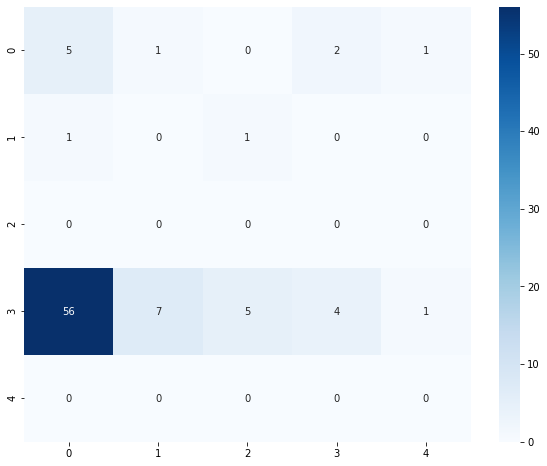

In [ ]:
# Displing Confusion matrix to show mis-classifications

conf_mat_ann_smote = confusion_matrix(x.argmax(axis=1), y_test_dummy.argmax(axis=1))
df_conf_mat3 = pd.DataFrame(conf_mat_ann_smote )
plt.figure(figsize = (10,8))
sns.heatmap(df_conf_mat3, annot=True,cmap='Blues', fmt='g')

Text(0.5, 1.0, 'Training and validation loss')

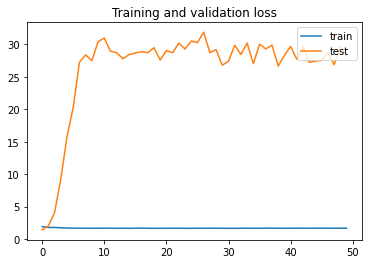

In [ ]:
epochs = range(len(training_history_ann_smote.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history_ann_smote.history['loss'], label = 'train')
plt.plot(epochs, training_history_ann_smote.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Above one is overfit model, it can be identified from the learning curve of the training and validation loss only.

Text(0.5, 1.0, 'Training and validation accuracy')

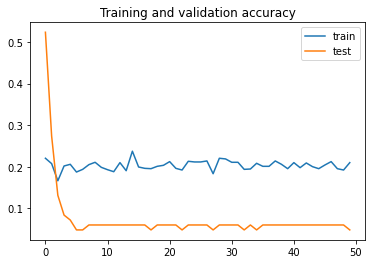

In [ ]:
# plot accuracy learning curves
plt.plot(epochs, training_history_ann_smote.history['categorical_accuracy'], label = 'train')
plt.plot(epochs, training_history_ann_smote.history['val_categorical_accuracy'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
model.save("finalized_keras_model.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


### Step 4: Design, train and test RNN or LSTM classifiers

Architecture

Create a model with Text inputs only.

Create a model with Multiple inputs.

### 1. Creating a Model with Text Inputs Only

In this section, we will create a classification model that uses accident description column alone.

In [ ]:
# Select input and output features
X_text = industry_safety_df['Cleaned_Description']
y_text = industry_safety_df['Accident Level']

In [ ]:
# Encode labels in column 'Accident Level'.
y_text = LabelEncoder().fit_transform(y_text)

In [ ]:
# Divide our data into testing and training sets:
X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(X_text, y_text, test_size = 0.20, random_state = 1, stratify = y_text)

print('X_text_train shape : ({0})'.format(X_text_train.shape[0]))
print('y_text_train shape : ({0},)'.format(y_text_train.shape[0]))
print('X_text_test shape : ({0})'.format(X_text_test.shape[0]))
print('y_text_test shape : ({0},)'.format(y_text_test.shape[0]))

X_text_train shape : (334)
y_text_train shape : (334,)
X_text_test shape : (84)
y_text_test shape : (84,)


In [ ]:
# Convert both the training and test labels into one-hot encoded vectors:
y_text_train = to_categorical(y_text_train)
y_text_test = to_categorical(y_text_test)

In [ ]:
# The first step in word embeddings is to convert the words into thier corresponding numeric indexes.
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_text_train)

X_text_train = tokenizer.texts_to_sequences(X_text_train)
X_text_test = tokenizer.texts_to_sequences(X_text_test)

In [ ]:
# Sentences can have different lengths, and therefore the sequences returned by the Tokenizer class also consist of variable lengths.
# We need to pad the our sequences using the max length.
vocab_size = len(tokenizer.word_index) + 1
print("vocab_size:", vocab_size)

maxlen = 100

X_text_train = pad_sequences(X_text_train, padding='post', maxlen=maxlen)
X_text_test = pad_sequences(X_text_test, padding='post', maxlen=maxlen)

vocab_size: 2519


In [ ]:
# We need to load the built-in GloVe word embeddings
embedding_size = 200
embeddings_dictionary = dict()

glove_file = open(r'D:\AIML\16. Capstone Project\Week 1 Capstone project\Week 1\glove.6B.200d.txt\glove.6B.200d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions

glove_file.close()

embedding_matrix = np.zeros((vocab_size, embedding_size))

for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

len(embeddings_dictionary.values())

400000

In [ ]:
# reset_random_seeds()

# Build a LSTM Neural Network
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=False)(deep_inputs)

LSTM_Layer_1 = Bidirectional(LSTM(128, return_sequences = True))(embedding_layer)
max_pool_layer_1 = GlobalMaxPool1D()(LSTM_Layer_1)
drop_out_layer_1 = Dropout(0.5, input_shape = (256,))(max_pool_layer_1)
dense_layer_1 = Dense(128, activation = 'relu')(drop_out_layer_1)
drop_out_layer_2 = Dropout(0.5, input_shape = (128,))(dense_layer_1)
dense_layer_2 = Dense(64, activation = 'relu')(drop_out_layer_2)
drop_out_layer_3 = Dropout(0.5, input_shape = (64,))(dense_layer_2)

dense_layer_3 = Dense(32, activation = 'relu')(drop_out_layer_3)
drop_out_layer_4 = Dropout(0.5, input_shape = (32,))(dense_layer_3)

dense_layer_4 = Dense(10, activation = 'relu')(drop_out_layer_4)
drop_out_layer_5 = Dropout(0.5, input_shape = (10,))(dense_layer_4)

dense_layer_5 = Dense(5, activation='softmax')(drop_out_layer_5)
#dense_layer_3 = Dense(5, activation='softmax')(drop_out_layer_3)

# LSTM_Layer_1 = LSTM(128)(embedding_layer)
# dense_layer_1 = Dense(5, activation='softmax')(LSTM_Layer_1)
# model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model = Model(inputs=deep_inputs, outputs=dense_layer_5)
#model = Model(inputs=deep_inputs, outputs=dense_layer_3)

opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

In [ ]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 200)          503800    
                                                                 
 bidirectional (Bidirectiona  (None, 100, 256)         336896    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               3289

In [ ]:
# Use earlystopping
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_text_train, y_text_train, target_type))

# fit the keras model on the dataset
# training_history = model.fit(X_text_train, y_text_train, epochs=50, batch_size=8, verbose=1, validation_data=(X_text_test, y_text_test), callbacks=[rlrp, metrics])

In [ ]:
model_lstm_text_input=model

In [ ]:
# fit the keras model on the dataset
training_history_lstm_text_input = model_lstm_text_input.fit(X_text_train, y_text_train, epochs=50, batch_size=8, verbose=1, validation_data=(X_text_test, y_text_test), callbacks=[rlrp, metrics])

Epoch 1/50
42/42 [==============================] - 18s 128ms/step - loss: 1.4561 - acc: 0.3922 - val_loss: 1.3148 - val_acc: 0.7381 - lr: 0.0010
Epoch 2/50
42/42 [==============================] - 2s 42ms/step - loss: 1.2653 - acc: 0.6138 - val_loss: 1.1562 - val_acc: 0.7381 - lr: 0.0010
Epoch 3/50
42/42 [==============================] - 2s 41ms/step - loss: 1.1628 - acc: 0.6916 - val_loss: 1.0568 - val_acc: 0.7381 - lr: 0.0010
Epoch 4/50
42/42 [==============================] - 2s 41ms/step - loss: 1.1258 - acc: 0.7275 - val_loss: 1.0288 - val_acc: 0.7381 - lr: 0.0010
Epoch 5/50
42/42 [==============================] - 2s 42ms/step - loss: 1.1411 - acc: 0.7335 - val_loss: 1.0416 - val_acc: 0.7381 - lr: 0.0010
Epoch 6/50
42/42 [==============================] - 2s 42ms/step - loss: 1.0435 - acc: 0.7395 - val_loss: 1.0001 - val_acc: 0.7381 - lr: 0.0010
Epoch 7/50
42/42 [==============================] - 2s 41ms/step - loss: 1.0243 - acc: 0.7395 - val_loss: 0.9821 - val_acc: 0.7381 - l

In [ ]:
# # evaluate the keras model
# _, train_accuracy_lstm_text_input = model_lstm_text_input.evaluate(X_text_train, y_text_train, batch_size=8, verbose=0)
# _, test_accuracy_lstm_text_input = model_lstm_text_input.evaluate(X_text_test, y_text_test, batch_size=8, verbose=0)

# print('Train accuracy: %.2f' % (train_accuracy_lstm_text_input*100))
# print('Test accuracy: %.2f' % (test_accuracy_lstm_text_input*100))

In [ ]:
# evaluate the keras model
train_loss_lstm_text_input,train_accuracy_lstm_text_input = model_lstm_text_input.evaluate(X_text_train, y_text_train, batch_size=8, verbose=1)
val_loss_lstm_text_input,test_accuracy_lstm_text_input = model_lstm_text_input.evaluate(X_text_test, y_text_test, batch_size=8, verbose=1)


print('Train accuracy: %.2f' % (train_accuracy_lstm_text_input*100))
print('Test accuracy: %.2f' % (test_accuracy_lstm_text_input *100))

print('Train loss: %.2f' % (train_loss_lstm_text_input*100))
print('Val loss: %.2f' % (val_loss_lstm_text_input*100))

11/11 [==============================] - 0s 14ms/step - loss: 0.9226 - acc: 0.7381
Train accuracy: 73.95
Test accuracy: 73.81
Train loss: 91.36
Val loss: 92.26


In [ ]:
# accuracy, precision, recall, f1 = get_classification_metrics(model_lstm_text_input, X_text_test, y_text_test, target_type)
# print('Accuracy: %f' % accuracy)
# print('Precision: %f' % precision)
# print('Recall: %f' % recall)
# print('F1 score: %f' % f1)

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, classification_report, make_scorer,recall_score
#y_pred_s = (model.predict(X_text_test) > 0.5).astype('int32')
y_pred_LSTM_Text = (model_lstm_text_input.predict(X_text_test))
x=(y_pred_LSTM_Text >= 0.5).astype('int32')
#print(f'Classification Report:\n{classification_report(y_pred_s, y_text_test)}')

In [ ]:
f1_score_lstm_text_input=f1_score(x, y_text_test, average='micro')

print('f1_score: %.2f' % (f1_score_lstm_text_input*100))

f1_score: 73.81


In [ ]:
print(f'Classification Report:\n{classification_report(x, y_text_test)}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        84
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.74      0.74      0.74        84
   macro avg       0.20      0.15      0.17        84
weighted avg       1.00      0.74      0.85        84
 samples avg       0.74      0.74      0.74        84



<AxesSubplot:>

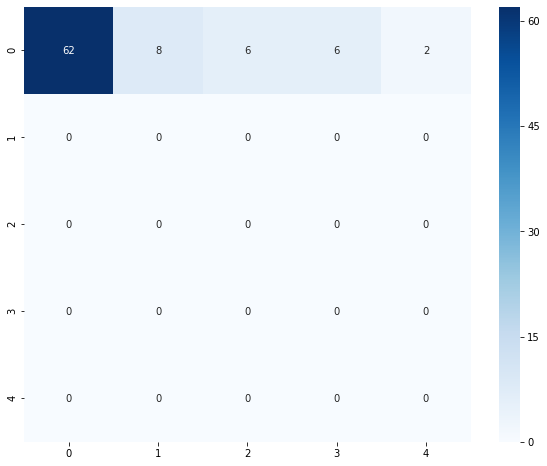

In [ ]:
# Displing Confusion matrix to show mis-classifications

conf_mat_lstm_text_input = confusion_matrix(x.argmax(axis=1), y_text_test.argmax(axis=1))
df_conf_mat4 = pd.DataFrame(conf_mat_lstm_text_input )
plt.figure(figsize = (10,8))
sns.heatmap(df_conf_mat4, annot=True,cmap='Blues', fmt='g')

Text(0.5, 1.0, 'Training and validation loss')

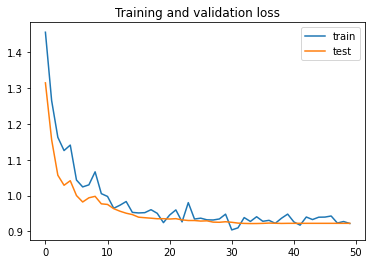

In [ ]:
epochs = range(len(training_history_lstm_text_input.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history_lstm_text_input.history['loss'], label = 'train')
plt.plot(epochs, training_history_lstm_text_input.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Above one is good fit, it is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values. The loss of the model will almost always be lower on the training dataset than the validation dataset.

Text(0.5, 1.0, 'Training and validation accuracy')

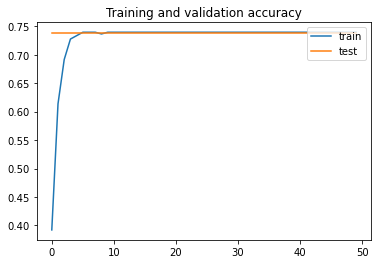

In [ ]:
# plot accuracy learning curves
plt.plot(epochs, training_history_lstm_text_input.history['acc'], label = 'train')
plt.plot(epochs, training_history_lstm_text_input.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

We could see it accuracy continually rise during training. As expected, we see the learning curves for accuracy on the test dataset plateau, indicating that the model has no longer overfit the training dataset and it is generalized model.

Note: Surprisingly we observe that same f1-score = 73.89 % with accident description alone.

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
model.save("finalized_keras_model.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


### 2. Creating a Model with Multiple Inputs

The first submodel will accept textual input in the form of accident description. This submodel will consist of an input shape layer, an embedding layer, and bidirectional LSTM layer of 128 neurons followed by max pool layer, drop out and dense layers. The second submodel will accept input in the form of meta information which consists of dense, batch norm and drop out layers.

The output from the dropout layer of the first submodel and the output from the batch norm layer of the second submodel will be concatenated together and will be used as concatenated input to another dense layer with 10 neurons. Finally, the output dense layer will have five neuorns corresponding to each accident level.

In [ ]:
# fix random seed for reproducibility
# reset_random_seeds()

input_1 = Input(shape=(maxlen,))
embedding_layer   = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer_1      = Bidirectional(LSTM(128, return_sequences = True))(embedding_layer)
max_pool_layer_1  = GlobalMaxPool1D()(LSTM_Layer_1)
drop_out_layer_1  = Dropout(0.5, input_shape = (256,))(max_pool_layer_1)
dense_layer_1     = Dense(128, activation = 'relu')(drop_out_layer_1)
drop_out_layer_2  = Dropout(0.5, input_shape = (128,))(dense_layer_1)
dense_layer_2     = Dense(64, activation = 'relu')(drop_out_layer_2)
drop_out_layer_3  = Dropout(0.5, input_shape = (64,))(dense_layer_2)

dense_layer_3     = Dense(32, activation = 'relu')(drop_out_layer_3)
drop_out_layer_4  = Dropout(0.5, input_shape = (32,))(dense_layer_3)

dense_layer_4     = Dense(10, activation = 'relu')(drop_out_layer_4)
drop_out_layer_5 = Dropout(0.5, input_shape = (10,))(dense_layer_4)

#-------------------------------------------------------------------------------
param = 1e-4

input_2 = Input(shape=(X_cat_train.shape[1],))
dense_layer_5       = Dense(10, input_dim=X_cat_train.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                      kernel_constraint=unit_norm())(input_2)
drop_out_layer_6    = Dropout(0.2)(dense_layer_5)
batch_norm_layer_1  = BatchNormalization()(drop_out_layer_6)
dense_layer_6       = Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                            kernel_constraint=unit_norm())(batch_norm_layer_1)
drop_out_layer_7   = Dropout(0.5)(dense_layer_6)
batch_norm_layer_2 = BatchNormalization()(drop_out_layer_7)

concat_layer        = Concatenate()([drop_out_layer_5, batch_norm_layer_2])
dense_layer_7       = Dense(10, activation='relu')(concat_layer)
output  = Dense(5, activation='softmax')(dense_layer_7)
model   = Model(inputs=[input_1, input_2], outputs=output)

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

In [ ]:
print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 100, 200)     503800      ['input_3[0][0]']                
                                                                                                  
 bidirectional_1 (Bidirectional  (None, 100, 256)    336896      ['embedding_1[0][0]']            
 )                                                                                                
                                                                                                  
 global_max_pooling1d_1 (Global  (None, 256)         0           ['bidirectional_1[0][0]']  

In [ ]:
# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=([X_text_train, X_cat_train], y_cat_train, target_type))

# fit the keras model on the dataset
# training_history = model.fit([X_text_train, X_cat_train], y_cat_train, epochs=100, batch_size=8, verbose=1, validation_data=([X_text_test, X_cat_test], y_cat_test), callbacks=[rlrp, metrics])

In [ ]:
model_lstm_mul_input=model

In [ ]:
# fit the keras model on the dataset
training_history_lstm_mul_input = model_lstm_mul_input.fit([X_text_train, X_cat_train], y_cat_train, epochs=50, batch_size=8, verbose=1, validation_data=([X_text_test, X_cat_test], y_cat_test), callbacks=[rlrp, metrics])

Epoch 1/50
42/42 [==============================] - 16s 149ms/step - loss: 1.2986 - acc: 0.5958 - val_loss: 1.3825 - val_acc: 0.7381 - lr: 0.0010
Epoch 2/50
42/42 [==============================] - 2s 55ms/step - loss: 1.1269 - acc: 0.7096 - val_loss: 1.2487 - val_acc: 0.7381 - lr: 0.0010
Epoch 3/50
42/42 [==============================] - 2s 55ms/step - loss: 1.0656 - acc: 0.7305 - val_loss: 1.1541 - val_acc: 0.7381 - lr: 0.0010
Epoch 4/50
42/42 [==============================] - 2s 54ms/step - loss: 1.0426 - acc: 0.7365 - val_loss: 1.1116 - val_acc: 0.7381 - lr: 0.0010
Epoch 5/50
42/42 [==============================] - 2s 54ms/step - loss: 1.0297 - acc: 0.7395 - val_loss: 1.0711 - val_acc: 0.7381 - lr: 0.0010
Epoch 6/50
42/42 [==============================] - 2s 54ms/step - loss: 1.0205 - acc: 0.7395 - val_loss: 1.0443 - val_acc: 0.7381 - lr: 0.0010
Epoch 7/50
42/42 [==============================] - 2s 54ms/step - loss: 1.0185 - acc: 0.7395 - val_loss: 1.0351 - val_acc: 0.7381 - l

In [ ]:
# evaluate the keras model
train_loss_lstm_mul_input,train_accuracy_lstm_mul_input = model_lstm_mul_input.evaluate([X_text_train, X_cat_train], y_cat_train, batch_size=8, verbose=1)
val_loss_lstm_mul_input,test_accuracy_lstm_mul_input = model_lstm_mul_input.evaluate([X_text_test, X_cat_test], y_cat_test, batch_size=8, verbose=1)


print('Train accuracy: %.2f' % (train_accuracy_lstm_mul_input*100))
print('Test accuracy: %.2f' % (test_accuracy_lstm_mul_input *100))

print('Train loss: %.2f' % (train_loss_lstm_mul_input*100))
print('Val loss: %.2f' % (val_loss_lstm_mul_input*100))

11/11 [==============================] - 0s 17ms/step - loss: 0.9125 - acc: 0.7381
Train accuracy: 73.95
Test accuracy: 73.81
Train loss: 90.30
Val loss: 91.25


In [ ]:
# accuracy, precision, recall, f1 = get_classification_metrics(model_lstm_mul_input, [X_text_test, X_cat_test], y_cat_test, target_type)
# print('Accuracy: %f' % accuracy)
# print('Precision: %f' % precision)
# print('Recall: %f' % recall)
# print('F1 score: %f' % f1)

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, classification_report, make_scorer,recall_score
#y_pred_s = (model.predict(X_text_test) > 0.5).astype('int32')
y_pred_LSTM_Cat_text = (model_lstm_mul_input.predict([X_text_test, X_cat_test]))
x=(y_pred_LSTM_Cat_text  >= 0.5).astype('int32')
#print(f'Classification Report:\n{classification_report(y_pred_s, y_text_test)}')

In [ ]:
f1_score_lstm_mul_input=f1_score(x, y_cat_test, average='micro')

print('f1_score: %.2f' % (f1_score_lstm_mul_input*100))

f1_score: 73.81


In [ ]:
print(f'Classification Report:\n{classification_report(x, y_cat_test)}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        84
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.74      0.74      0.74        84
   macro avg       0.20      0.15      0.17        84
weighted avg       1.00      0.74      0.85        84
 samples avg       0.74      0.74      0.74        84



<AxesSubplot:>

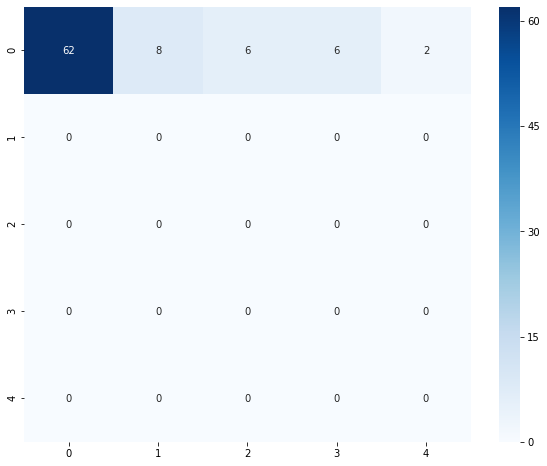

In [ ]:
# Displing Confusion matrix to show mis-classifications

conf_mat_lstm_mul_input = confusion_matrix(x.argmax(axis=1), y_cat_test.argmax(axis=1))
df_conf_mat5 = pd.DataFrame(conf_mat_lstm_mul_input)
plt.figure(figsize = (10,8))
sns.heatmap(df_conf_mat5, annot=True,cmap='Blues', fmt='g')

Text(0.5, 1.0, 'Training and validation loss')

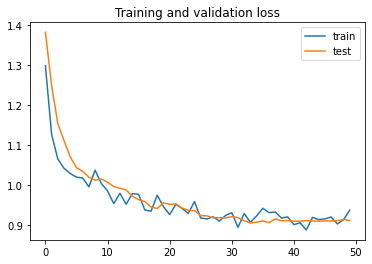

In [ ]:
epochs = range(len(training_history_lstm_mul_input.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history_lstm_mul_input.history['loss'], label = 'train')
plt.plot(epochs, training_history_lstm_mul_input.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Above one is good fit, it is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values. 

The loss of the model will almost always be lower on the training dataset than the validation dataset.

Text(0.5, 1.0, 'Training and validation accuracy')

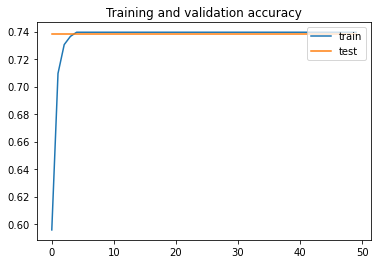

In [ ]:
# plot accuracy learning curves
plt.plot(epochs, training_history_lstm_mul_input.history['acc'], label = 'train')
plt.plot(epochs, training_history_lstm_mul_input.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

We could see it accuracy continually rise during training. As expected, we see the learning curves for accuracy on the test dataset plateau, indicating that the model has no longer overfit the training dataset and it is generalized model.

### Comparision of Accuracy and F1 score of applied models

In [ ]:
Result_comp={'Model':['model_ann_cat','model_ann_o_data','model_lstm_text_input','model_lstm_mul_input'],
            'Training Accuracy':[train_accuracy_ann_cat,train_accuracy_ann_o_data,train_accuracy_lstm_text_input,train_accuracy_lstm_mul_input],
            'Validation Accuracy':[test_accuracy_ann_cat,test_accuracy_ann_o_data,test_accuracy_lstm_text_input,test_accuracy_lstm_mul_input],
            # 'Training loss':[train_loss_ann_cat,train_loss_ann_o_data,train_loss_ann_smote,train_loss_lstm_text_input,train_loss_lstm_mul_input],
            # 'Validation loss':[val_loss_ann_cat,val_loss_ann_o_data,val_loss_ann_smote,val_loss_lstm_text_input,val_loss_lstm_mul_input],
            'F1_Score':[f1_score_ann_cat,f1_score_ann_o_data,f1_score_lstm_text_input,f1_score_lstm_mul_input]

            }
Comparision_graph=pd.DataFrame(Result_comp)
Comparision_graph

Model  Training Accuracy  Validation Accuracy  F1_Score
0          model_ann_cat          0.7395210            0.7380952 0.7425150
1       model_ann_o_data          0.7395210            0.7380952 0.7380952
2  model_lstm_text_input          0.7395210            0.7380952 0.7380952
3   model_lstm_mul_input          0.7395210            0.7380952 0.7380952

In [ ]:
df_Comparision_graph = Comparision_graph.set_index('Model')
df_Comparision_graph 

Training Accuracy  Validation Accuracy  F1_Score
Model                                                                  
model_ann_cat                  0.7395210            0.7380952 0.7425150
model_ann_o_data               0.7395210            0.7380952 0.7380952
model_lstm_text_input          0.7395210            0.7380952 0.7380952
model_lstm_mul_input           0.7395210            0.7380952 0.7380952

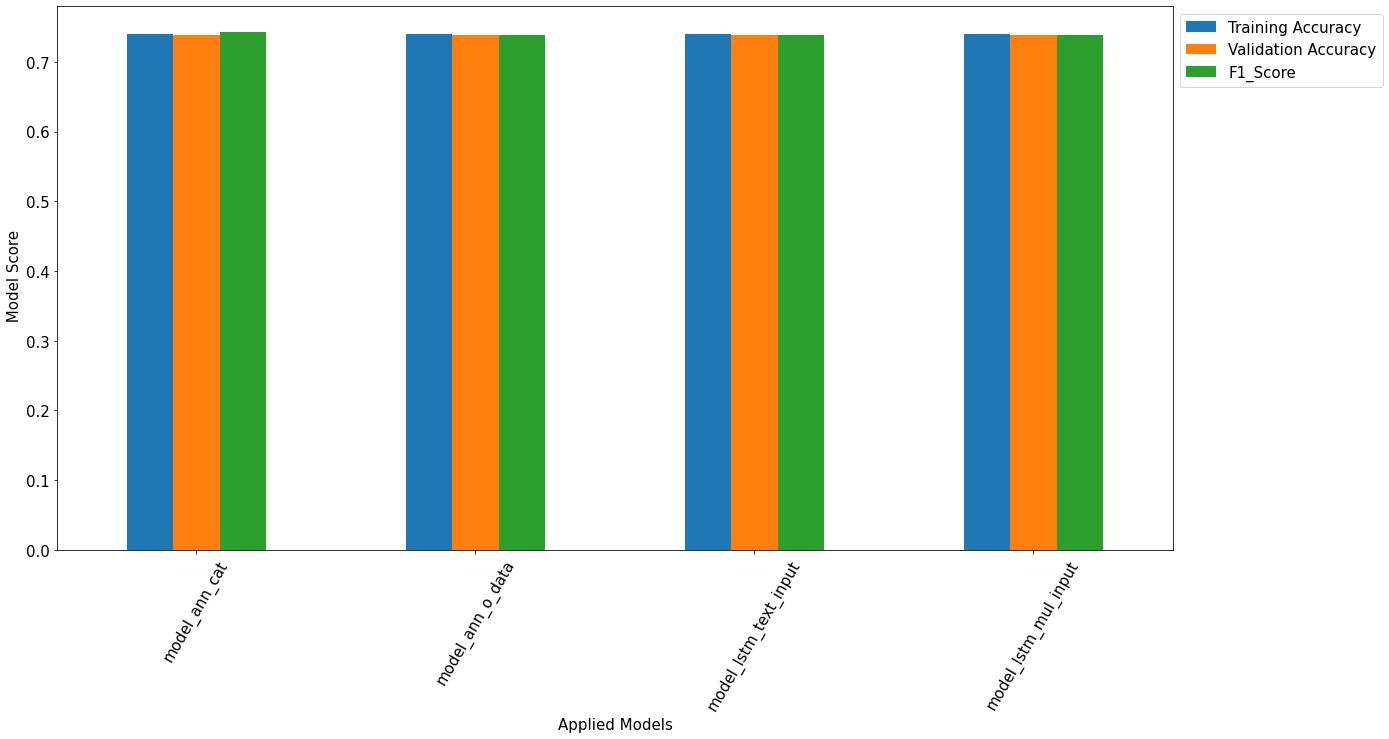

In [ ]:
ax = df_Comparision_graph.plot(kind='bar', rot=0, figsize = (20,10), fontsize = 15) #, colormap='Paired')
ax.legend(bbox_to_anchor=(1, 1), prop={'size': 15})
ax.set_ylabel(" Model Score", fontsize=15)
ax.set_xlabel("Applied Models", fontsize=15)
plt.xticks(rotation=60)
plt.show()

### Comparision of loss of applied models

In [ ]:
Result_comp={'Model':['model_ann_cat','model_ann_o_data','model_lstm_text_input','model_lstm_mul_input'],
            # 'Training Accuracy':[train_accuracy_ann_cat,train_accuracy_ann_o_data,train_accuracy_ann_smote,train_accuracy_lstm_text_input,train_accuracy_lstm_mul_input],
            # 'Validation Accuracy':[test_accuracy_ann_cat,test_accuracy_ann_o_data,test_accuracy_ann_smote,test_accuracy_lstm_text_input,test_accuracy_lstm_mul_input],
            'Training loss':[train_loss_ann_cat,train_loss_ann_o_data,train_loss_lstm_text_input,train_loss_lstm_mul_input],
            'Validation loss':[val_loss_ann_cat,val_loss_ann_o_data,val_loss_lstm_text_input,val_loss_lstm_mul_input],
            # 'F1_Score':[f1_score_ann_cat,f1_score_ann_o_data,f1_score_ann_smote,f1_score_lstm_text_input,f1_score_lstm_mul_input]

            }
Comparision_graph=pd.DataFrame(Result_comp)
Comparision_graph

Model  Training loss  Validation loss
0          model_ann_cat      0.9163429        0.8737436
1       model_ann_o_data      0.8948015        0.9157979
2  model_lstm_text_input      0.9135629        0.9225672
3   model_lstm_mul_input      0.9030482        0.9124548

In [ ]:
df_Comparision_graph = Comparision_graph.set_index('Model')
df_Comparision_graph 

Training loss  Validation loss
Model                                                
model_ann_cat              0.9163429        0.8737436
model_ann_o_data           0.8948015        0.9157979
model_lstm_text_input      0.9135629        0.9225672
model_lstm_mul_input       0.9030482        0.9124548

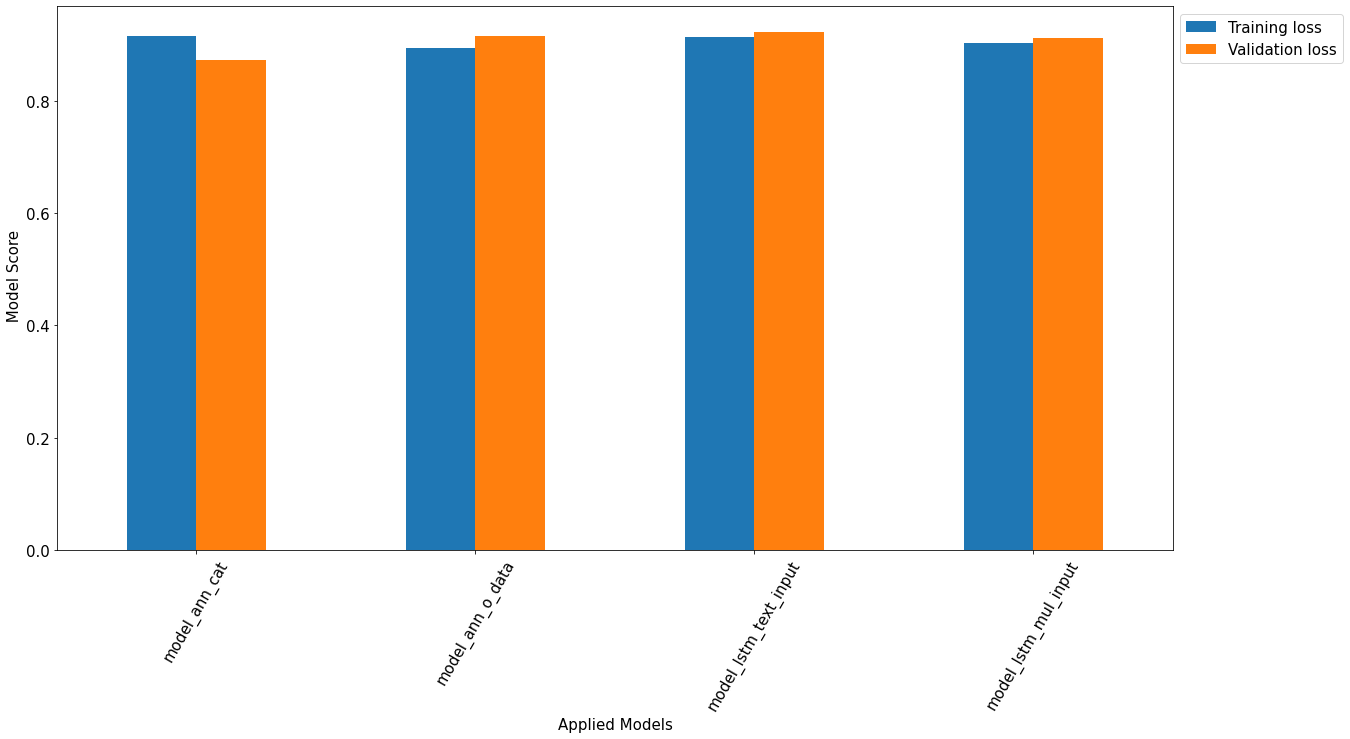

In [ ]:
ax = df_Comparision_graph.plot(kind='bar', rot=0, figsize = (20,10), fontsize = 15) #, colormap='Paired')
ax.legend(bbox_to_anchor=(1, 1), prop={'size': 15})
ax.set_ylabel(" Model Score", fontsize=15)
ax.set_xlabel("Applied Models", fontsize=15)
plt.xticks(rotation=60)
plt.show()

### Comments:

From the above comparision graph it is found that model_lstm_mul_input is best fit for the given dataset and able to predict the accident level with a test accuracy of 73.81% and f1-score of 73.81%, hence we select model_lstm_mul_input for deployment.

### Step 5: Choose the best performing model classifier and pickle it

#### Conclusion

1. Able to predict the accident level with a test accuracy of 73.81% and f1-score of 73.81%

2. We have seven duplicate values in this dataset and dropped those duplicate values.

3. We have no outliers in this dataset.

4. We have no missing values in this dataset.

5. Extracted the day, month and year from Date column and created new features such as weekday, weekofyear and seasons.

6. Target variable – ‘Accident Level’ distribution is not equal (I: 309, II: 40, III: 31, IV: 30, V: 8).

7. Class imbalance issue is handled using below methods and found out that, for this particular dataset, with original data we have achieved the better results.

   a. Resampling techniques: Oversampling minority class

   b. SMOTE: Generate synthetic samples

8. By comparing the results from all ML methods with original data, we can select the best method as AdaBoost classifier with f1-score 65.38% with original data.

9. Explored below options in Neural Networks.

   a. Convert Classification to Numerical problem: achieved a test accuracy of 67% which is a bad result.

   b. Multiclass classification - Target variable - One hot encoded: achieved a test accuracy of 73.81% and f1-score of 73.81% with original data + TF-IDF features from accident description column.

   c. Create a model with Text inputs (accident description alone) only: surprisingly achieved a test accuracy of 73.81% and f1-score of 73.81% with original data.

   d. Create a model with Categorical features only: achieved a test accuracy of 73.81% and f1-score of 72.28% with original data.

   e. Create a model with Multiple Inputs (concatenated the layers from text input model and categorical features input model): surprisingly achieved a test accuracy of 73.81% and f1-score of 73.81% with original data.

10. Finally bidirectional LSTM model can be considered to productionalized the model and predict the accident level.**

### ‣ Output: Pickled model to be used for future prediction [ 2.5 points ]

In [ ]:
import pickle
 
# Save the trained model as a pickle string.
pickle.dump(model_lstm_mul_input, open('model_lstm_mul_input','wb'))
 


In [ ]:
# df=pd.read_csv(r"D:\AIML\16. Capstone Project\Week 1 Capstone project\Week 1\Project files\CleansedData.csv")

In [ ]:
# #target_column = 'Potential Accident Level'
# target_column = 'Accident Level'
# target={'I':0, 'II':1, 'III':2, 'IV':3, 'V':4, 'VI':5}

# df['target']=df[target_column].map(target)

In [ ]:
# def find_max_list_idx(list):
#     list_len = [len(i) for i in list]
#     return np.argmax(np.array(list_len))

In [ ]:
# max_idx = find_max_list_idx(df['Description'])

In [ ]:
# MAX_SEQUENCE_LENGTH = len(df['Description'][max_idx])

In [ ]:
# max_features = 10000
# maxlen = MAX_SEQUENCE_LENGTH
# embedding_size = 200

In [ ]:
# tokenizer = Tokenizer(num_words = max_features)
# tokenizer.fit_on_texts(df['Description'])

In [ ]:
# X = tokenizer.texts_to_sequences(df['Description'])

# #step1: padding each sample with max length:
# X = pad_sequences(X, maxlen = maxlen)

# #step2: converting target column to numpy array:
# y = pd.get_dummies(df['target']).values
# y = np.asarray(y)

In [ ]:
# EMBEDDING_FILE = (r'D:\AIML\16. Capstone Project\Week 1 Capstone project\Week 1\glove.6B.200d.txt\glove.6B.200d.txt')

# embeddings = {}
# for o in open(EMBEDDING_FILE,encoding="utf8"):
#     word = o.split(" ")[0]
#     # print(word)
#     embd = o.split(" ")[1:]
#     embd = np.asarray(embd, dtype='float32')
#     # print(embd)
#     embeddings[word] = embd

# # create a weight matrix for words in training docs
# embedding_matrix = np.zeros((max_features, 200))

# for word, i in tokenizer.word_index.items():
# 	embedding_vector = embeddings.get(word)
# 	if embedding_vector is not None:
# 		embedding_matrix[i] = embedding_vector

In [ ]:
# x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 1122, shuffle = True)

In [ ]:
# import tensorboard
# from keras.models import Sequential
# from keras.layers import Dense, Embedding, Flatten,SpatialDropout1D
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D
# from keras.initializers import Constant

# model1 = Sequential()
# model1.add(Embedding(max_features, embedding_size, embeddings_initializer = Constant(embedding_matrix), input_length = maxlen, trainable = False))
# model1.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
# model1.add(SpatialDropout1D(0.2))
# model1.add(LSTM(128, dropout=0.4, recurrent_dropout=0.2))
# model1.add(Dense(5, activation='softmax'))
# model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# # Load the TensorBoard notebook extension
# %load_ext tensorboard

In [ ]:
# es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)  
# mc = ModelCheckpoint('risk_classifier.h5', monitor = 'val_loss', mode = 'min', save_best_only = True, verbose = 1)
# lr_r = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 5),
# #logdir = 'log'; tb = TensorBoard(logdir, histogram_freq = 1)
# callbacks = [es, mc, lr_r]

In [ ]:
# sm = SMOTE(random_state = 111, k_neighbors=4)
# X_res, y_res = sm.fit_resample(x_train, y_train)

In [ ]:
# print('Before Sampling: X_train: {}, y_train: {}'.format(x_train.shape, y_train.shape))

Before Sampling: X_train: (297, 1029), y_train: (297, 5)


In [ ]:
# print('After Sampling: X: {}, y: {}'.format(X_res.shape, y_res.shape))

After Sampling: X: (1055, 1029), y: (1055, 5)


In [ ]:
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X_res, y_res, test_size = 0.30, random_state = 1122)
# print(X_train2.shape,y_train2.shape)
# print(X_test2.shape,y_test2.shape)

(738, 1029) (738, 5)
(317, 1029) (317, 5)


In [ ]:
# batch_size = 64
# epochs = 2

# h = model1.fit(X_train2, y_train2, epochs = epochs, validation_data=(x_val, y_val), batch_size = batch_size, verbose = 2, callbacks = callbacks)

Epoch 1/2

Epoch 1: val_loss improved from inf to 1.25925, saving model to risk_classifier.h5
12/12 - 246s - loss: 1.6034 - accuracy: 0.2344 - val_loss: 1.2592 - val_accuracy: 0.7578 - lr: 0.0010 - 246s/epoch - 20s/step
Epoch 2/2

Epoch 2: val_loss improved from 1.25925 to 0.99641, saving model to risk_classifier.h5
12/12 - 234s - loss: 1.4512 - accuracy: 0.3875 - val_loss: 0.9964 - val_accuracy: 0.7656 - lr: 0.0010 - 234s/epoch - 20s/step


In [ ]:
# import pickle
 
# # Save the trained model as a pickle string.
# pickle.dump(model1, open('model1','wb'))

### Submission: Interim report 1 [ 2.5 points ]
